# Topic 28 - Microbes Classification - no duplicates

In this documentation we will firstly do a short data analysis, mainly to compare graphs for data with and without duplicates, and then do modelling process for data without duplicates. We will also use some previous results for data with duplicates, such as, deleting feature 'ConvexHull2' at the beginning.

For modelling we chose the following 6 models:
1. KNeighborsClassifier.
2. LogisticRegression.
3. RandomForest.
4. GradientBoostingClassifier.
5. MLPClassifier.
6. SVC (C-Support Vector Classification).

## EDA

##### Data preparation

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

plt.rcParams['figure.dpi'] =  100
df = pd.read_csv('microbes.csv')
df.drop(columns=['Unnamed: 0', 'ConvexHull2'], inplace=True)
df.drop_duplicates(inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4874 entries, 0 to 30326
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         4874 non-null   float64
 1   Eccentricity     4874 non-null   float64
 2   EquivDiameter    4874 non-null   float64
 3   Extrema          4874 non-null   float64
 4   FilledArea       4874 non-null   float64
 5   Extent           4874 non-null   float64
 6   Orientation      4874 non-null   float64
 7   EulerNumber      4874 non-null   float64
 8   BoundingBox1     4874 non-null   float64
 9   BoundingBox2     4874 non-null   float64
 10  BoundingBox3     4874 non-null   float64
 11  BoundingBox4     4874 non-null   float64
 12  ConvexHull1      4874 non-null   float64
 13  ConvexHull3      4874 non-null   float64
 14  ConvexHull4      4874 non-null   float64
 15  MajorAxisLength  4874 non-null   float64
 16  MinorAxisLength  4874 non-null   float64
 17  Perimeter        4

In [4]:
df.describe()

Solidity  Eccentricity  EquivDiameter      Extrema   FilledArea  \
count  4874.000000   4874.000000    4874.000000  4874.000000  4874.000000   
mean      9.279298     19.255931       3.816436    11.780271     0.483691   
std       3.917154      3.646316       2.244111     6.022849     1.105683   
min       0.000000      0.000000       0.000000     0.000000     0.000000   
25%       6.280000     17.200000       2.440000     6.722500     0.116000   
50%       8.930000     20.500000       3.480000    11.900000     0.242000   
75%      12.075000     22.100000       4.700000    16.900000     0.458000   
max      23.000000     23.000000      23.000000    23.000000    23.000000   

            Extent  Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  \
count  4874.000000  4874.000000  4874.000000   4874.000000   4874.000000  ...   
mean      5.666239    11.614569    22.340831     10.811742     10.259562  ...   
std       3.128757     6.599971     1.006230      6.113236      5.816926  ...   
min       0.000000     0.000000     0.000000      0.000000      0.000000  ...   
25%       3.250000     5.830000    22.200000      5.590000      5.510000  ...   
50%       5.140000    11.800000    22.600000     10.900000     10.000000  ...   
75%       7.617500    17.100000    22.800000     15.800000     15.000000  ...   
max      23.000000    23.000000    23.000000     23.000000     23.000000  ...   

       ConvexHull3  ConvexHull4  MajorAxisLength  MinorAxisLength  \
count  4874.000000  4874.000000      4874.000000      4874.000000   
mean     10.945626    10.916168         1.660109         1.106868   
std       6.106603     6.106891         1.620521         1.267032   
min       0.000000     0.000000         0.000000         0.000000   
25%       5.670000     5.652500         0.687000         0.504250   
50%      11.000000    10.900000         1.230000         0.805500   
75%      15.900000    15.800000         2.110000         1.280000   
max      23.000000    23.000000        23.000000        23.000000   

         Perimeter   ConvexArea    Centroid1    Centroid2         Area  \
count  4874.000000  4874.000000  4874.000000  4874.000000  4874.000000   
mean      0.868543     0.270153    11.676485    11.475984     0.869189   
std       1.156212     0.949289     6.038827     5.723773     1.286756   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.294000     0.043600     6.540000     6.940000     0.272000   
50%       0.559500     0.096300    11.900000    11.000000     0.542000   
75%       1.030000     0.214000    16.700000    16.200000     0.982750   
max      23.000000    23.000000    23.000000    23.000000    23.000000   

             raddi  
count  4874.000000  
mean      5.466424  
std       2.691856  
min       0.000000  
25%       3.500000  
50%       5.480000  
75%       7.290000  
max      23.000000  

[8 rows x 23 columns]

After deleting duplicates we have only **4874** samples.

As without duplicates we do not have so many samples, we won't use a validation set, but will use cross-validation instead.

In [5]:
from sklearn.model_selection import train_test_split
features = df.drop(columns=['microorganisms'])
target = df['microorganisms']

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.8, stratify=target, random_state=42)


##### Distribution of classes

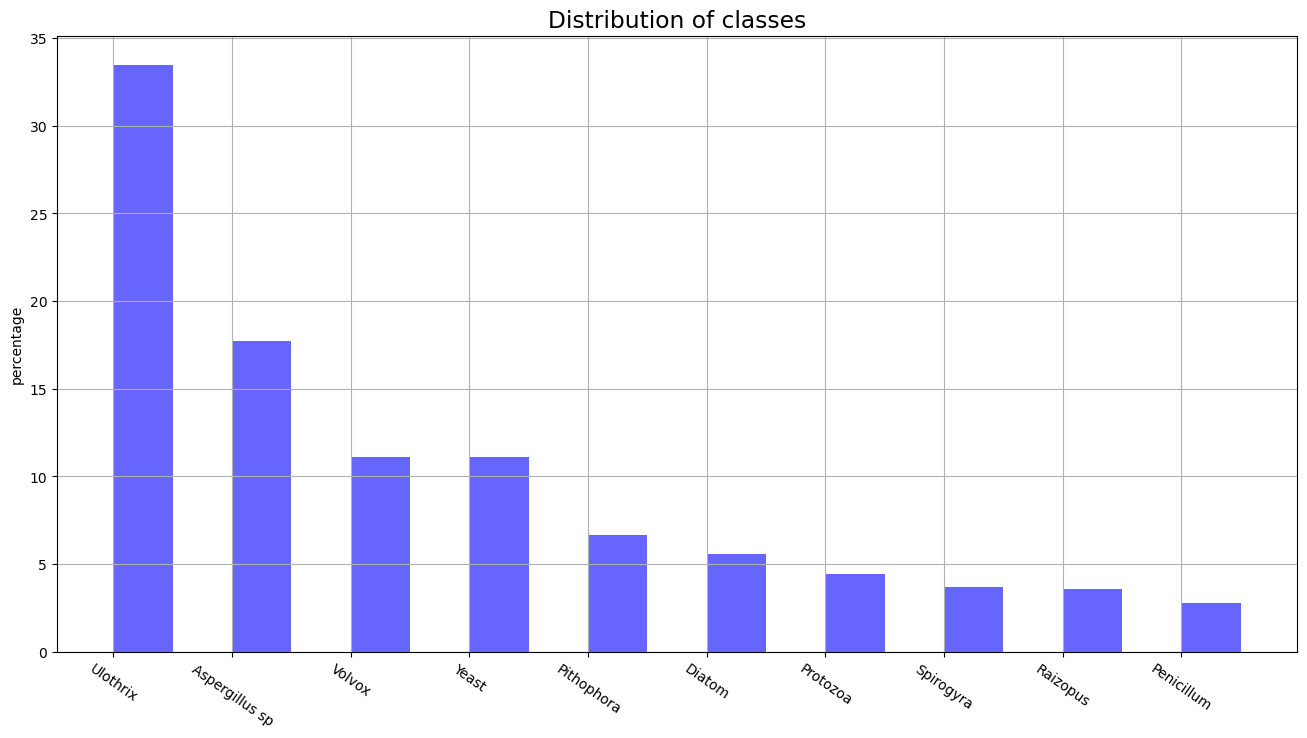

In [6]:
class_distribution = y_train.value_counts(normalize=True)*100

fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})
indices = np.arange(0,10,1)

bar_width = 0.5
bars = ax.bar(indices, class_distribution, bar_width, color='blue', alpha=0.6)

ax.set_ylabel('percentage')
ax.set_xticks(indices - bar_width / 2)
ax.set_xticklabels(class_distribution.index)

plt.title('Distribution of classes')
plt.xticks(rotation= -35)
plt.grid()

We observe that the distribution of classes slightly changed after deleting duplicates.

In [57]:
y_train.value_counts()

microorganisms
Ulothrix          1305
Aspergillus sp     691
Volvox             432
Yeast              432
Pithophora         259
Diatom             216
Protozoa           173
Spirogyra          143
Raizopus           140
Penicillum         108
Name: count, dtype: int64

### Boxplots and outliers

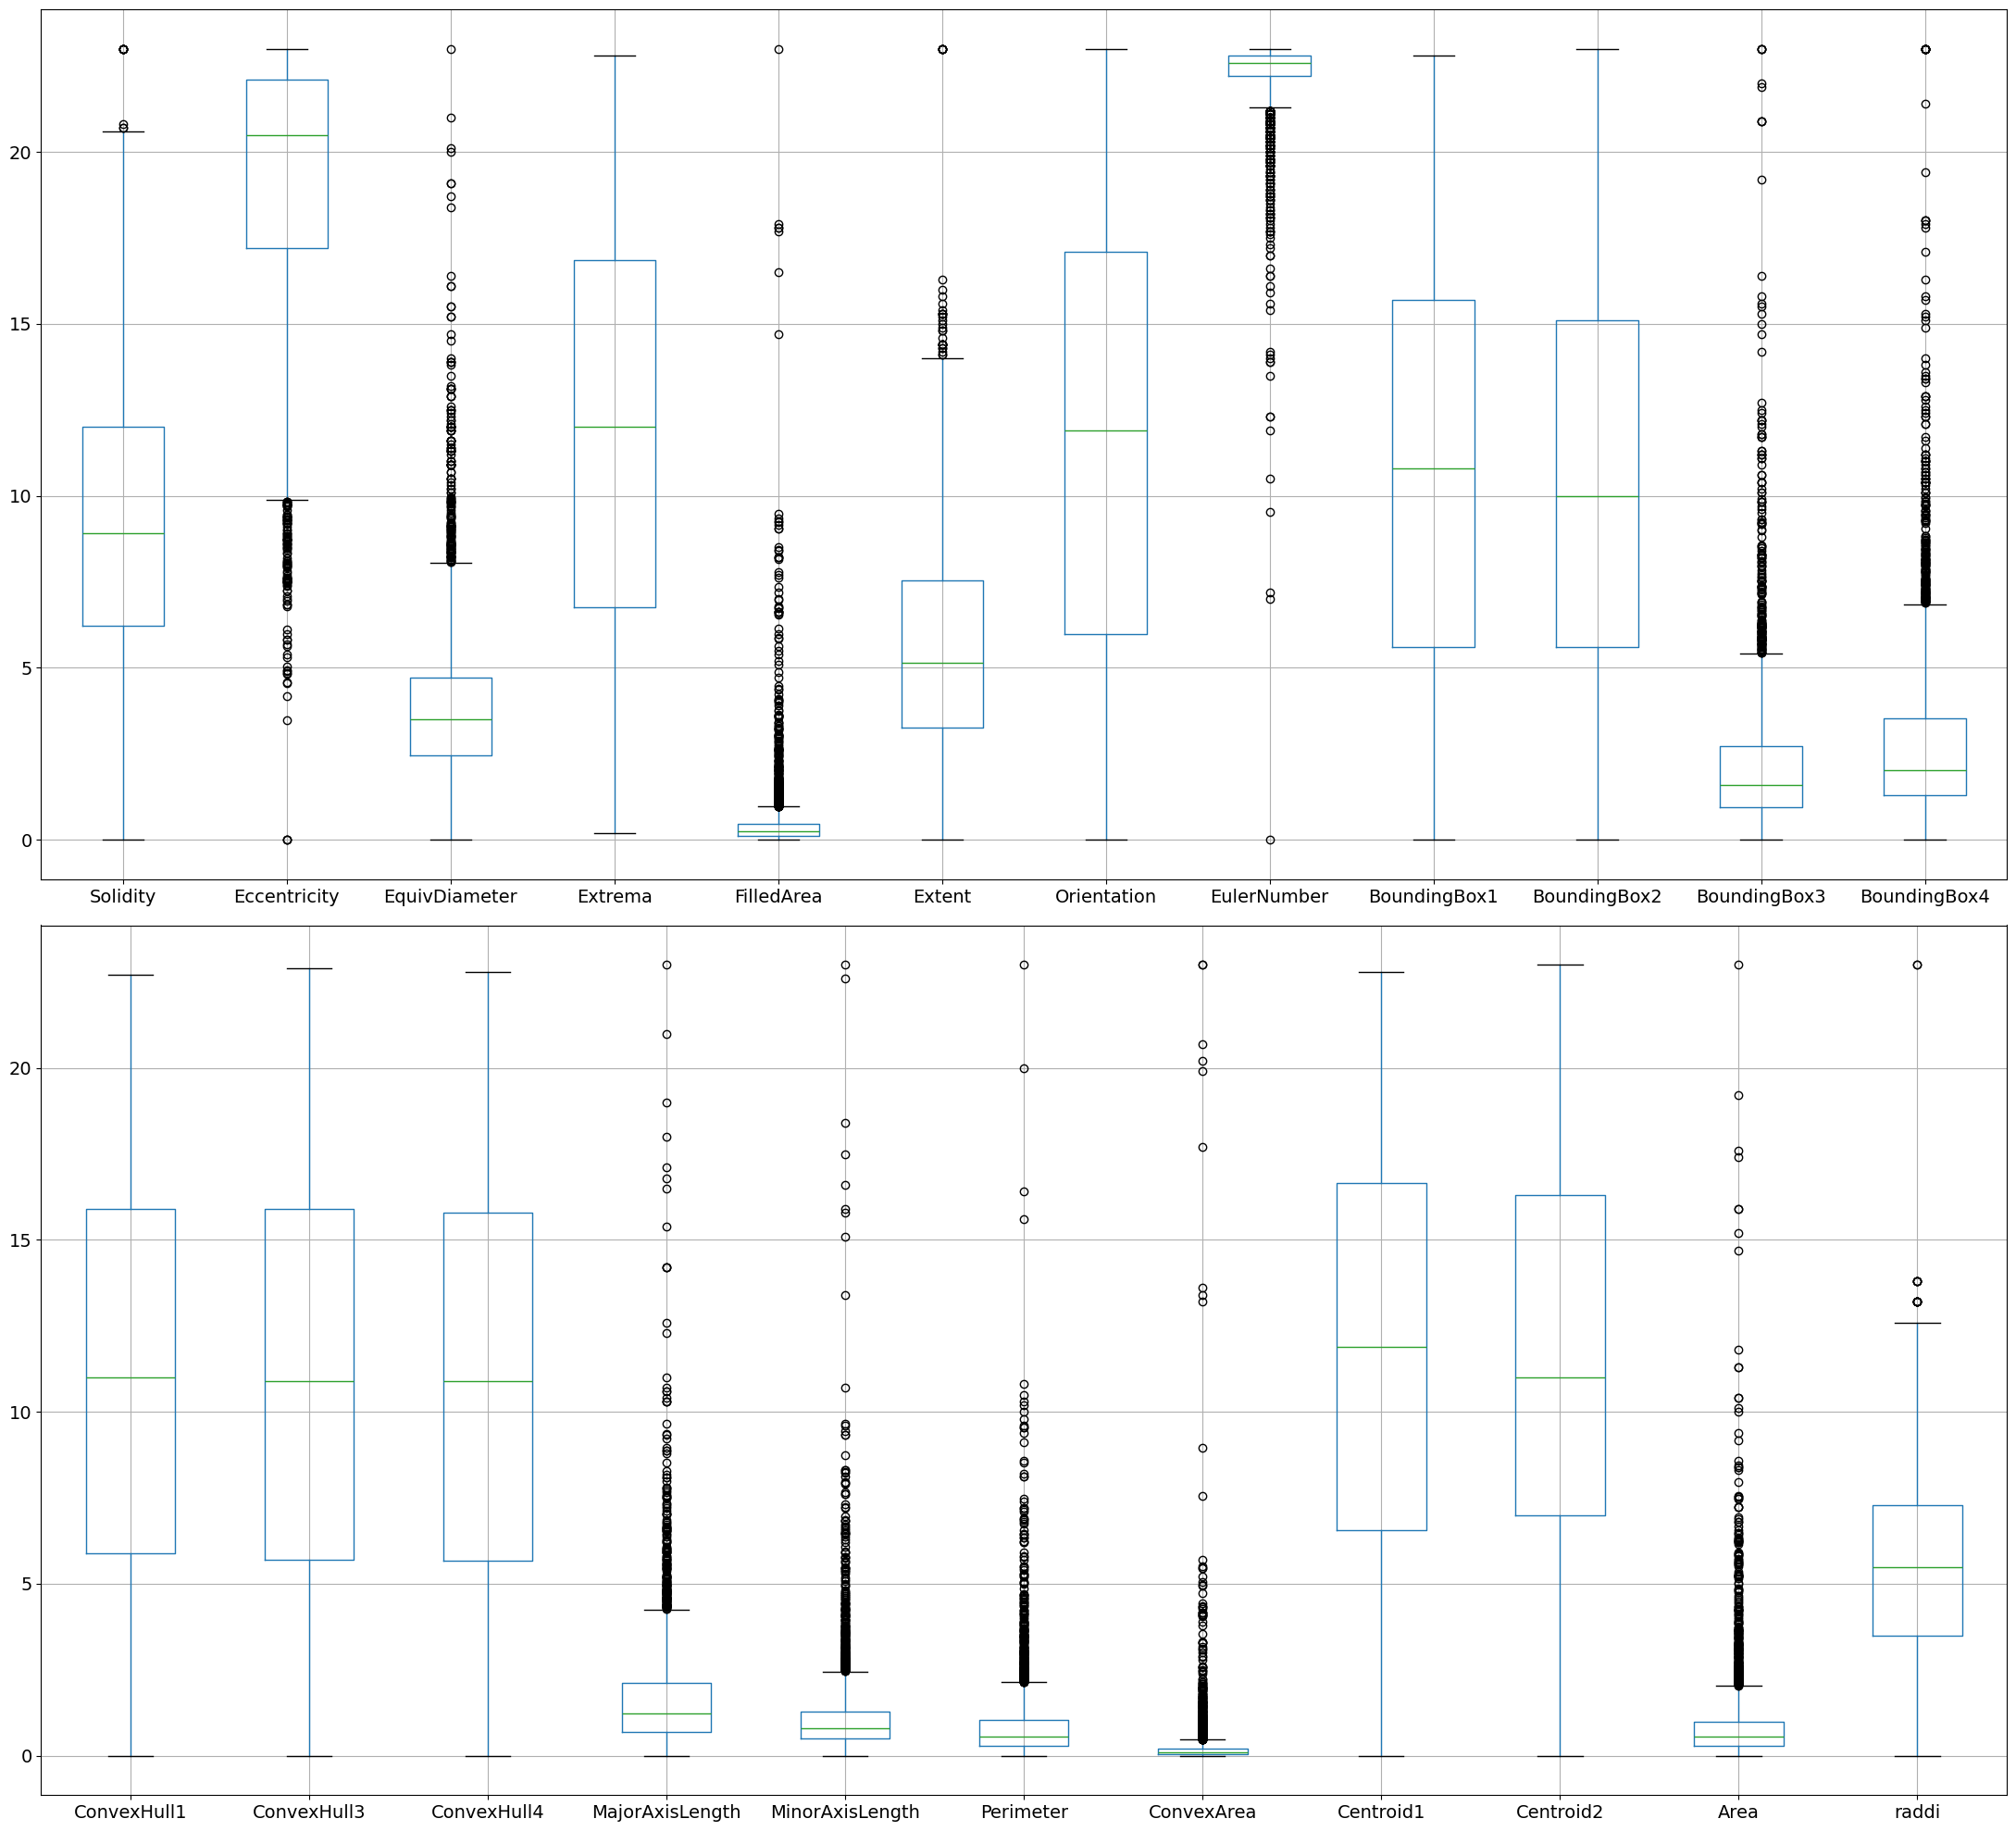

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))
x_train.boxplot(ax=ax1, column=list(x_train.columns)[:12], fontsize=14)
x_train.boxplot(ax=ax2, column=list(x_train.columns)[12:], fontsize=14)
plt.tight_layout()

Deleting duplicated didn't change boxplots.

### Distribution of features

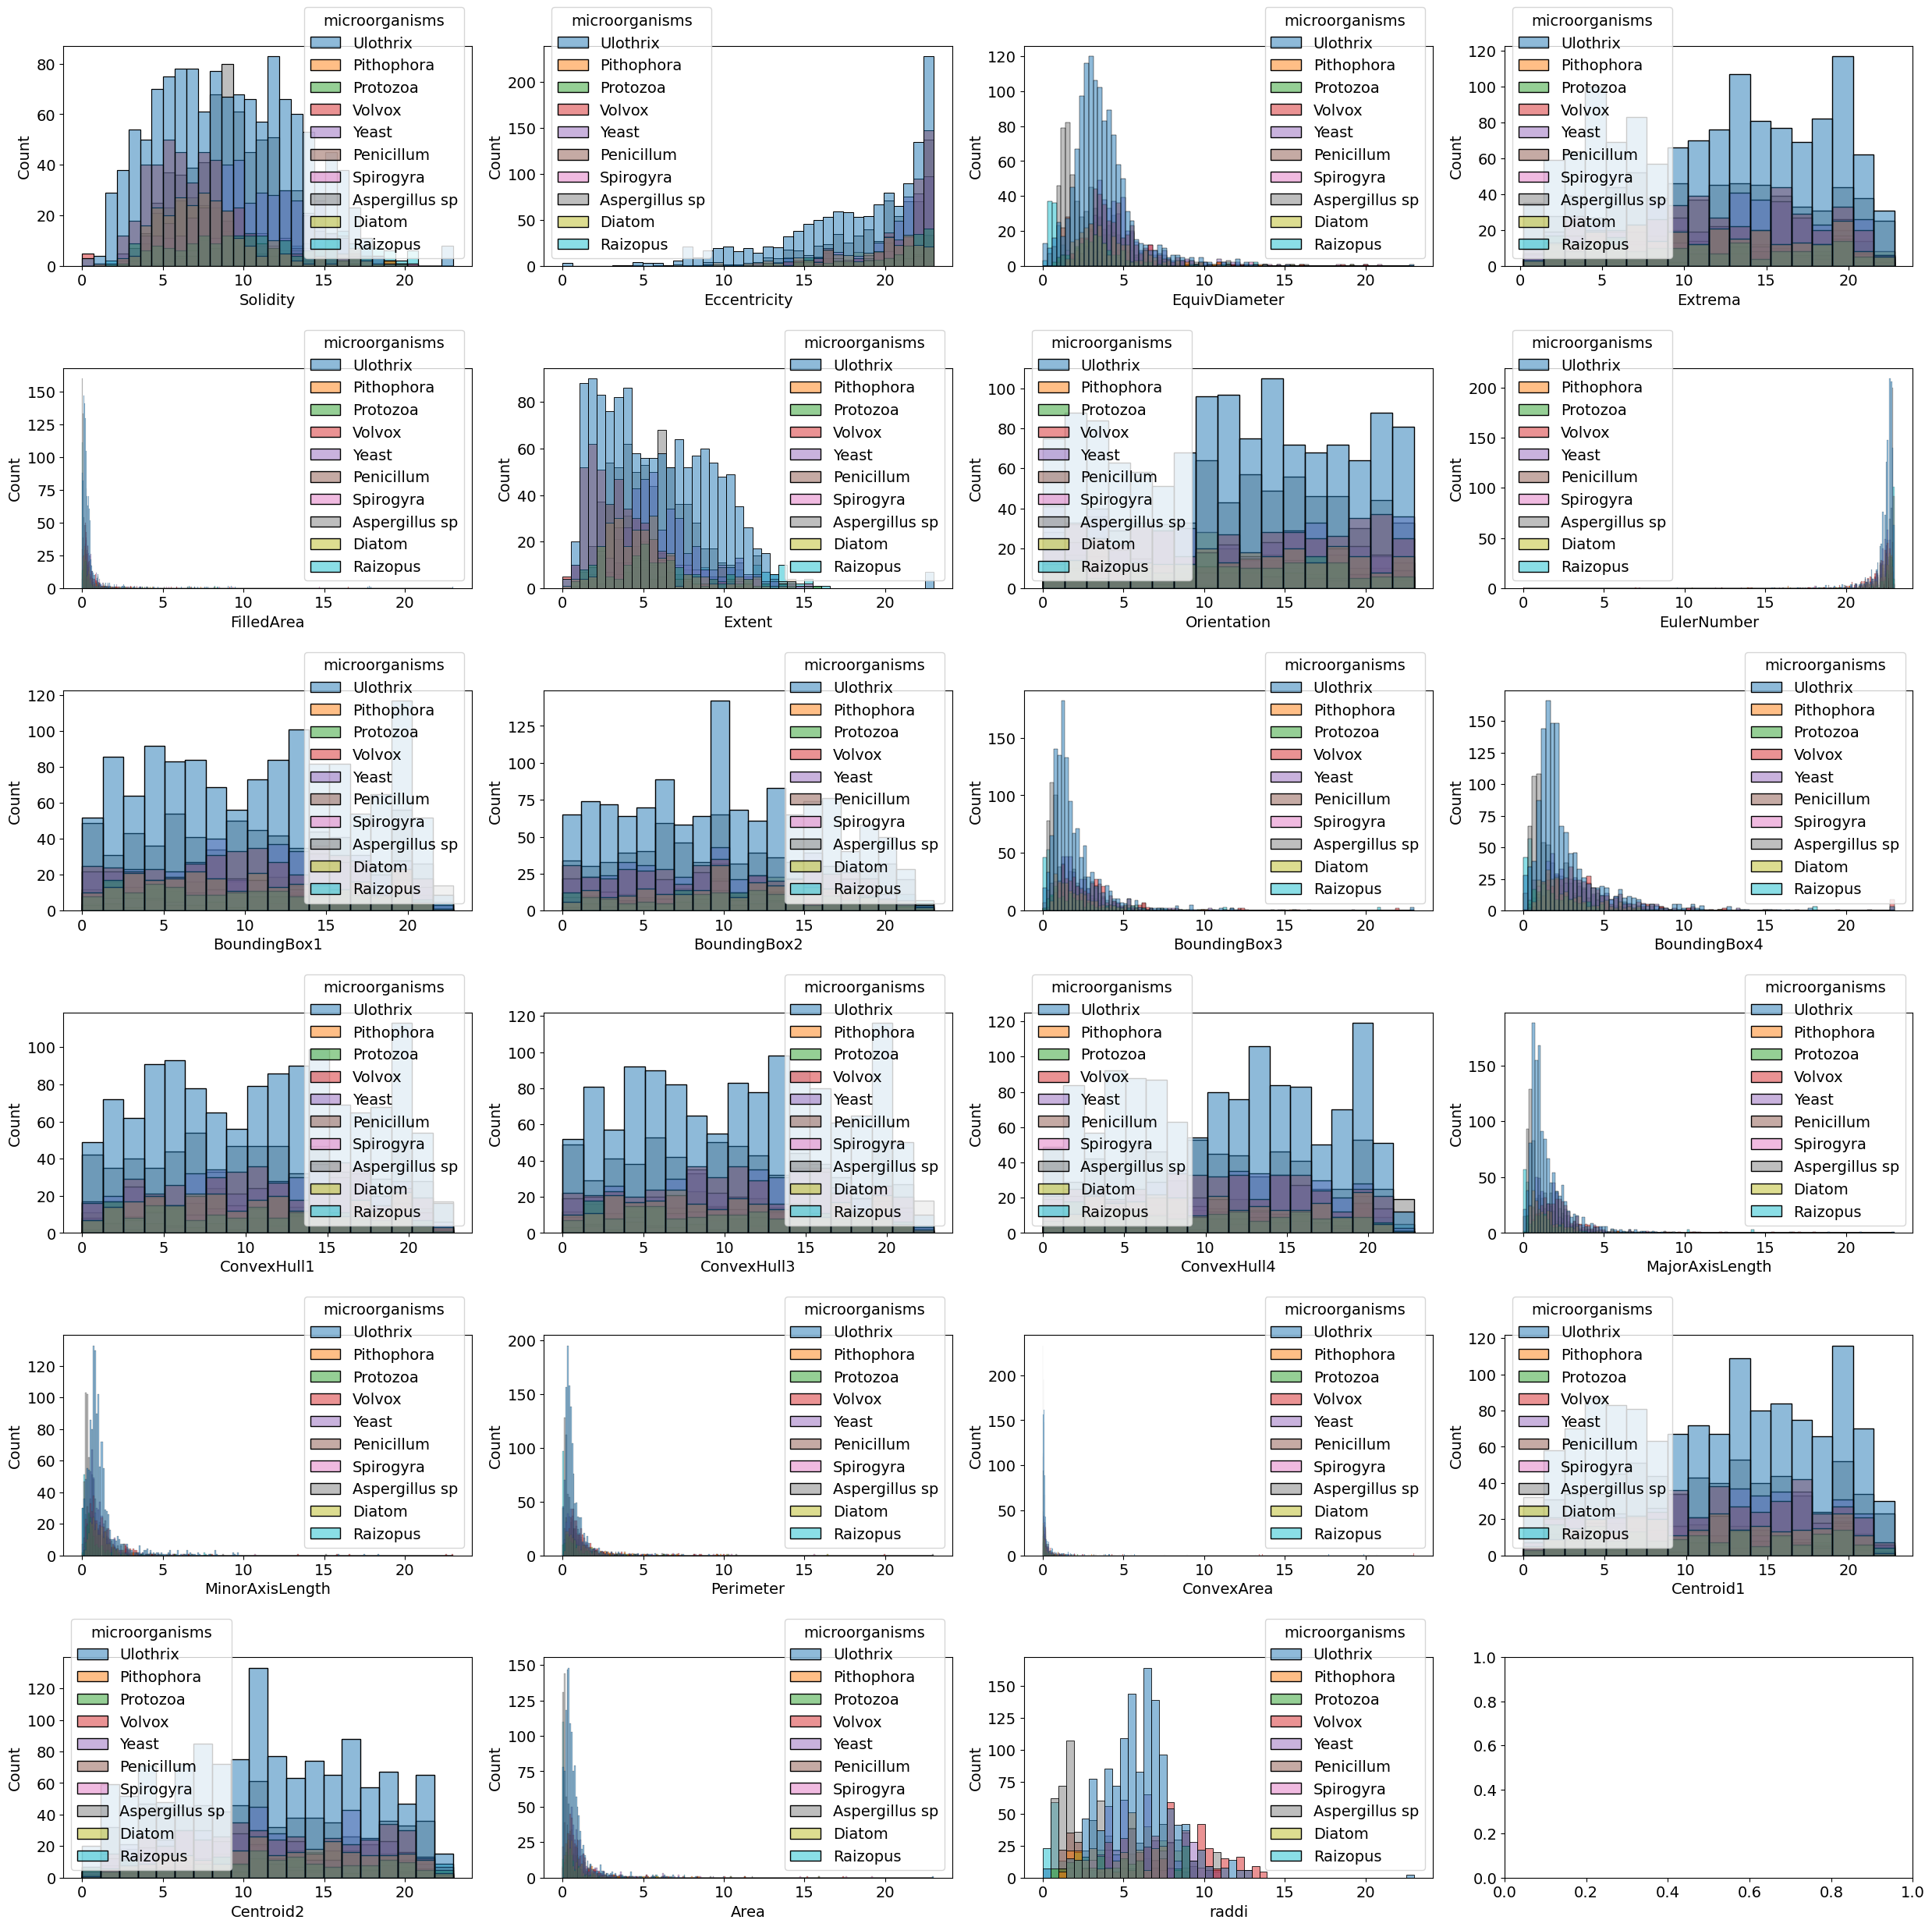

In [8]:
train_df = x_train.join(y_train)
fig, ax = plt.subplots(6, 4, figsize=(25, 25))

for name, a in zip(train_df.columns[:-1], ax.ravel()):
  sns.histplot(data=train_df, x=name, hue="microorganisms", ax=a)

plt.tight_layout()
plt.show()

Deleting duplicates didn't change distribution of features significantly.

### Corellation matrix

<Axes: >

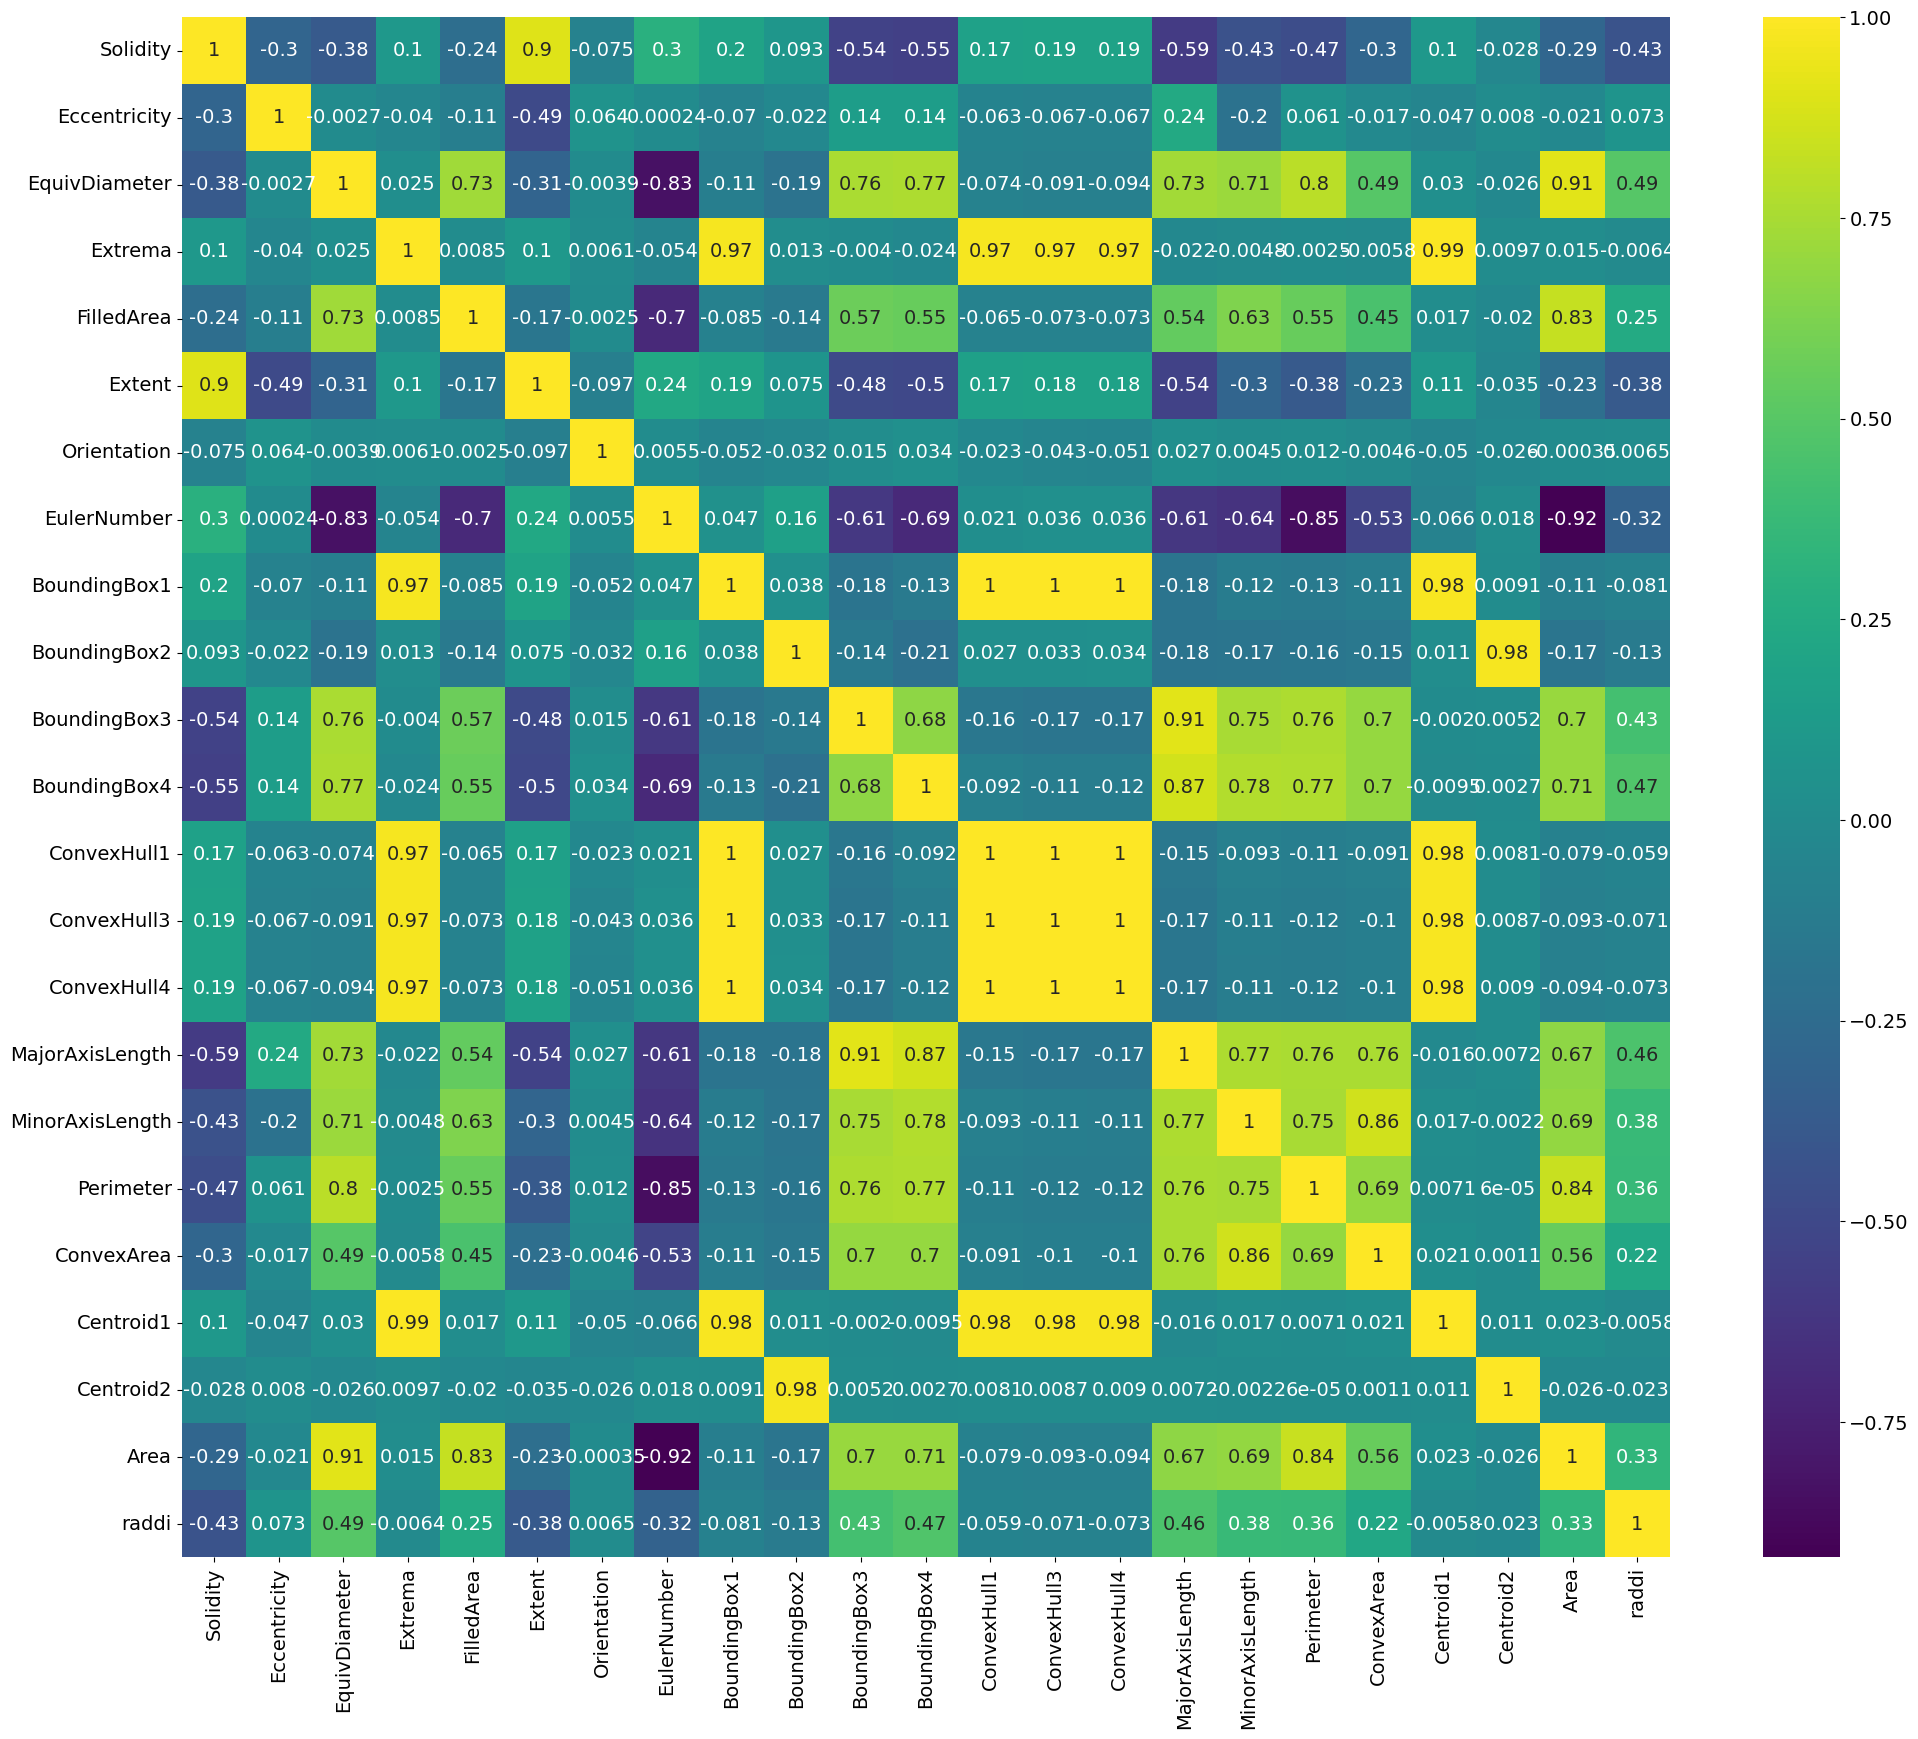

In [9]:
matrix = x_train.corr()
plt.figure(figsize=(24,20))
sns.heatmap(matrix, cmap="viridis", annot=True)

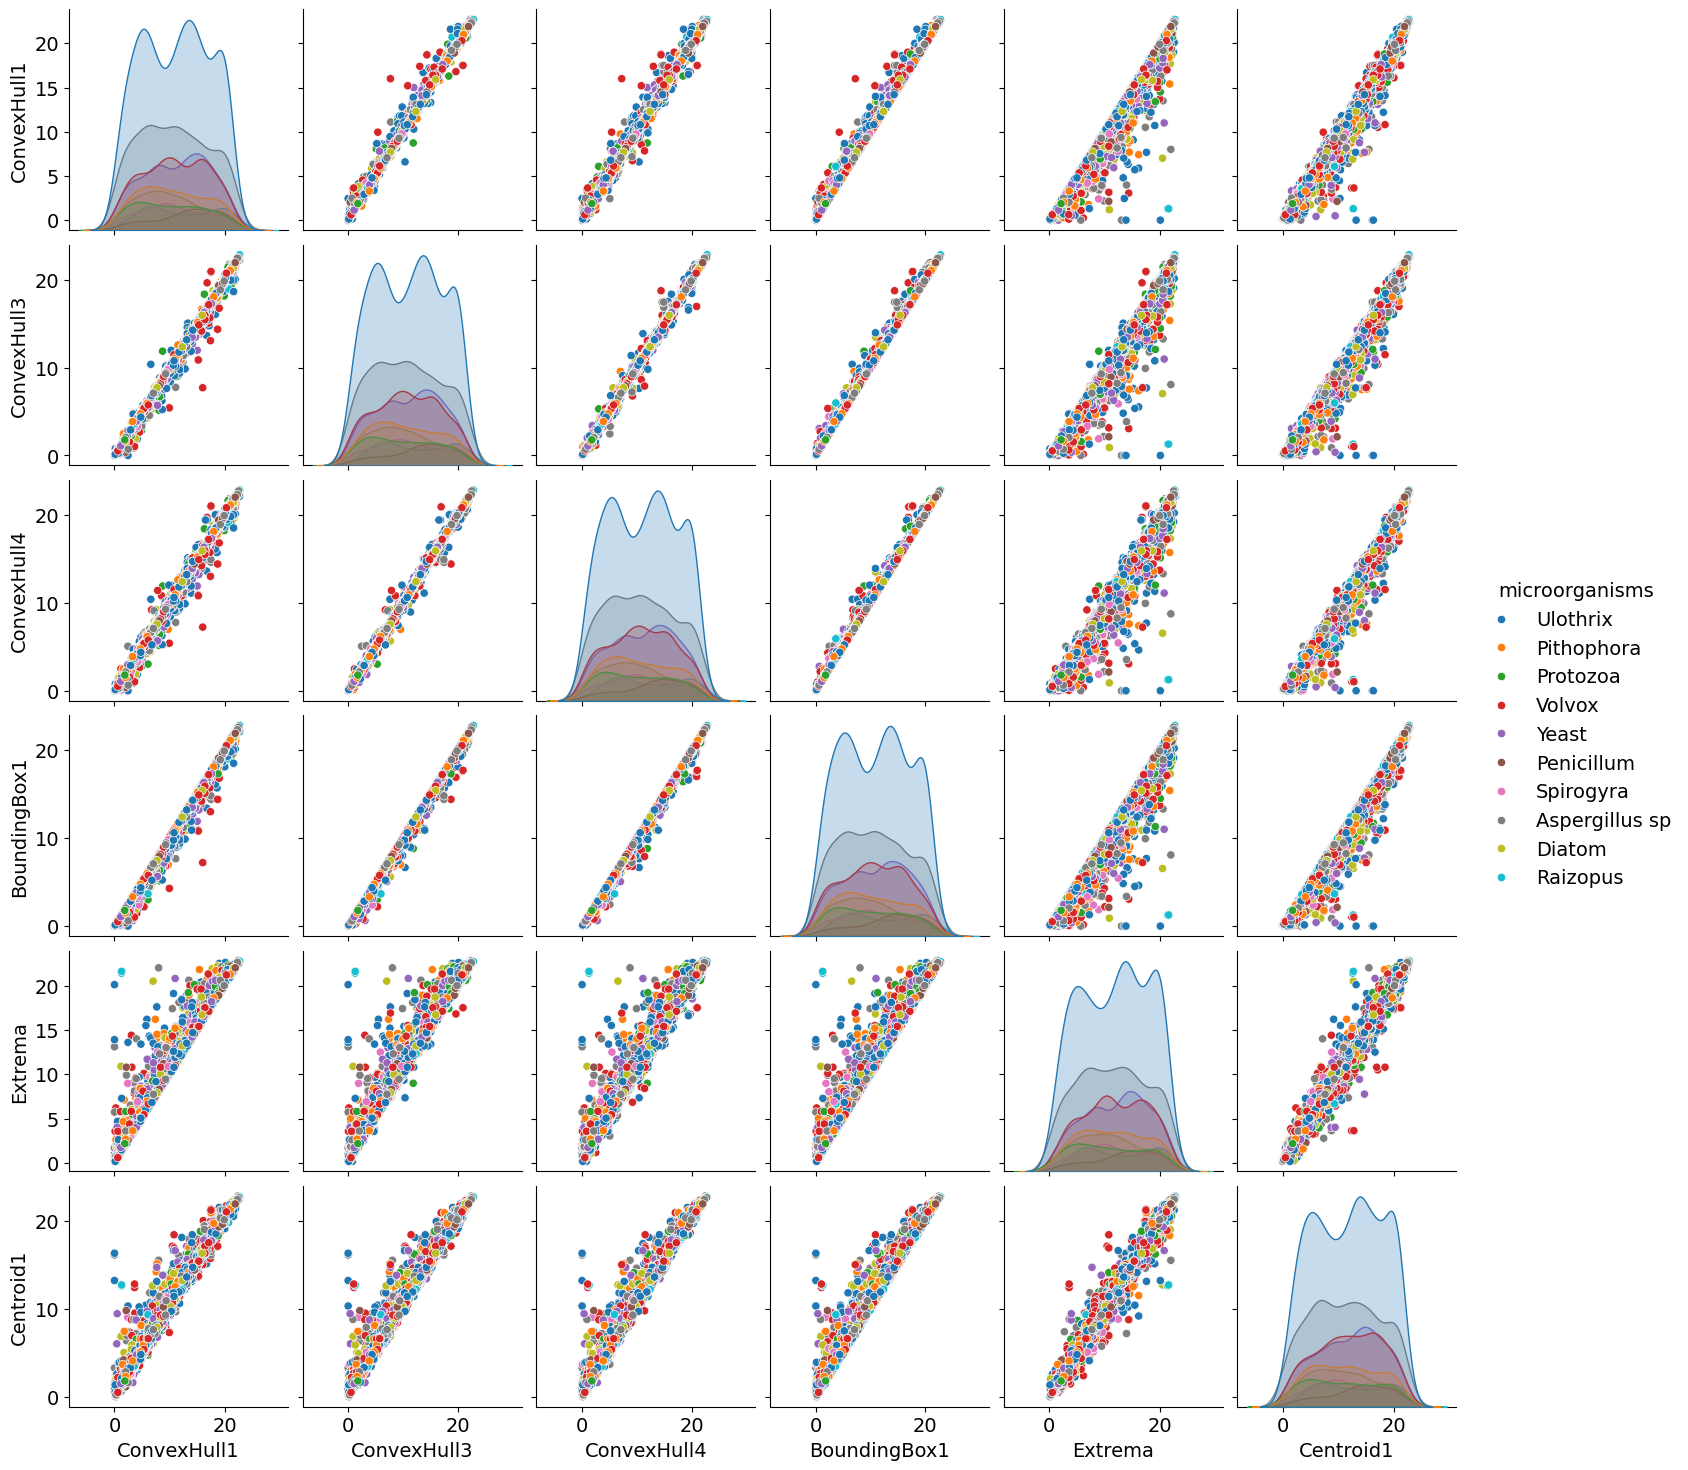

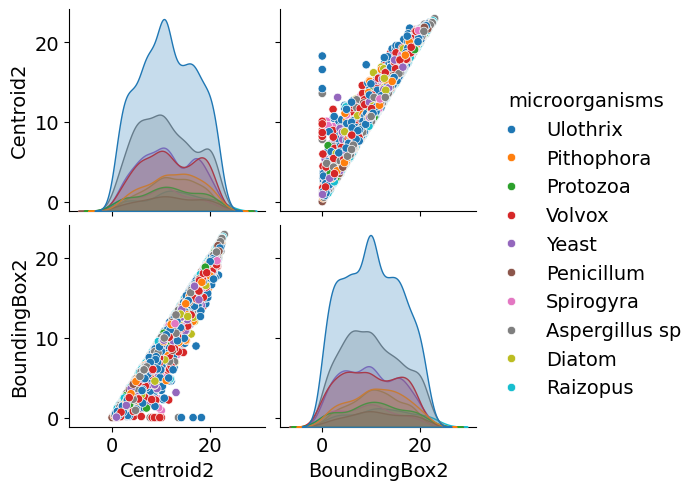

In [10]:
sns.pairplot(
        data=train_df, 
        vars=train_df[['ConvexHull1', 'ConvexHull3', 'ConvexHull4', 'BoundingBox1', 'Extrema', 'Centroid1']],
        hue='microorganisms',
        )
plt.show()
sns.pairplot(
        data=train_df, 
        vars=train_df[['Centroid2', 'BoundingBox2', ]],
        hue='microorganisms',
        )
plt.show()

Deleting duplicates also didn't change correlation betwenn features.

### Conclusion of EDA

We observe that deleting duplicates didn't remove other problems of data set. It is still highly imbalanced data set with outliers and highly correlated features. So the process of working with these problems will be the same as for data with duplicates.

## Modelling

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import LearningCurveDisplay, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import recall_score, f1_score, cohen_kappa_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer, PolynomialFeatures

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


Initialize scoring parameters for GridSearchCV and RandomizedSearchCV.

In [12]:
def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa),
    'accuracy': 'accuracy'
}

In this section we will try each models with default parameters and then will tune them.

### kNeighborsClassifier

For better comparison of results we will save them into a dataframe. 

In [33]:
columns = [
    'Scaler',
    'Sampler',
    'Weights',
    'Number of neighbors',
    'Macro recall train',
    'Macro recall cv',
    'Macro f1 cv',
    'Cohens Kappa cv',
    'Accuracy cv',
    ]
kNN_scores = pd.DataFrame(columns=columns)

Default model:

In [34]:
skf = StratifiedKFold(n_splits=5)

neigh = KNeighborsClassifier(
    n_neighbors=5, #default parameter
    n_jobs=-1
    )

predictions = cross_val_predict(neigh, x_train, y_train, cv=skf, method='predict')
neigh.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'Weights': 'uniform',
    'Number of neighbors': 5,
    'Macro recall train': recall_score(y_train, neigh.predict(x_train), average='macro'),
    'Macro recall cv': recall_score(y_train, predictions, average='macro'),
    'Macro f1 cv': f1_score(y_train, predictions, average='macro'),
    'Cohens Kappa cv': cohen_kappa_score(y_train, predictions),
    'Accuracy cv': accuracy_score(y_train, predictions),
}
kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)
display(kNN_scores)

C:\Users\user\AppData\Local\Temp\ipykernel_14984\1973244418.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)


Scaler Sampler  Weights Number of neighbors  Macro recall train  \
0   None    None  uniform                   5             0.49625   

   Macro recall cv  Macro f1 cv  Cohens Kappa cv  Accuracy cv  
0         0.270455     0.288246         0.266886     0.419595

We try a few data transformers to see if data transformation impacts on model performance.
For data transformers we chose:
1. StandardScaler.
2. RobustScaler.
3. QuantileTransformer.
4. PowerTransformer.


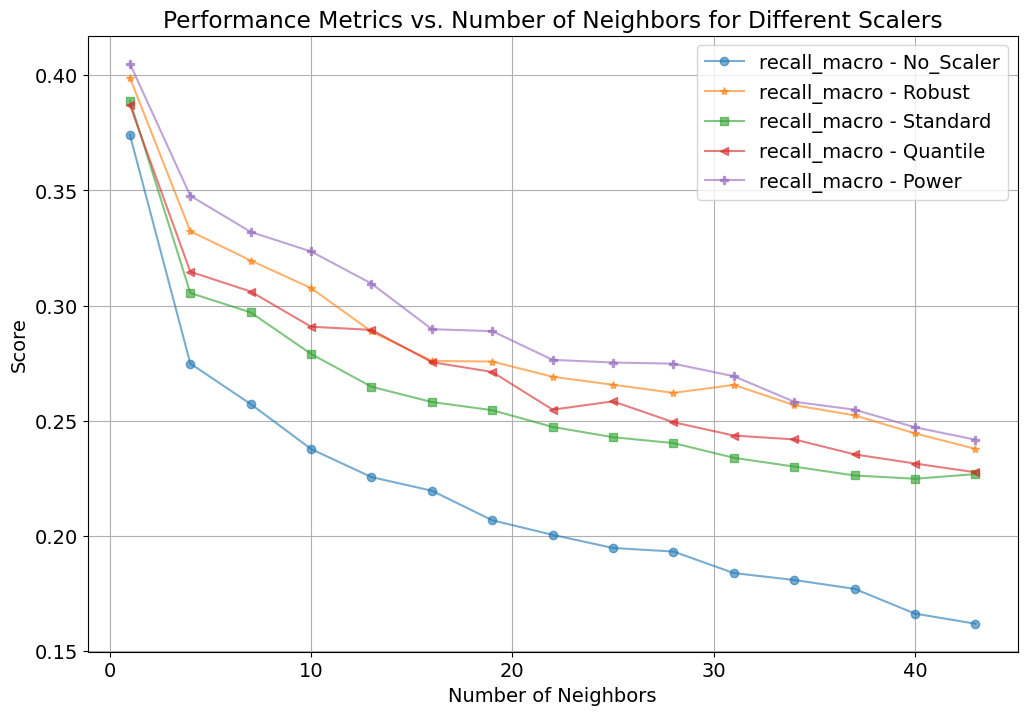

In [74]:
skf = StratifiedKFold(n_splits=5)

k_values = range(1, 45, 3)

metrics = {
    'No_Scaler': {'recall_macro': [], },
    'Robust': {'recall_macro': [], },
    'Standard': {'recall_macro': [], },
    'Quantile': {'recall_macro': [], },
    'Power': {'recall_macro': [], },
}

for k in k_values:
    kNN = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    predictions = cross_val_predict(kNN, x_train, y_train, cv=skf, method='predict')
    
    metrics['No_Scaler']['recall_macro'].append(recall_score(y_train, predictions, average='macro'))


transformers = [
    ('Robust', RobustScaler()),
    ('Standard', StandardScaler()),
    ('Quantile', QuantileTransformer()),
    ('Power', PowerTransformer()),
]

for transformer_name, transformer_obj in transformers:
    for k in k_values:
        pipe = Pipeline([
            ('scaler', transformer_obj),
            ('knn', KNeighborsClassifier(n_neighbors=k, n_jobs=-1))
        ])
        predictions = cross_val_predict(pipe, x_train, y_train, cv=skf, method='predict')

        metrics[transformer_name]['recall_macro'].append(recall_score(y_train, predictions, average='macro'))


plt.figure(figsize=(12, 8))
markers = {'No_Scaler': 'o', 'Robust': '*', 'Standard': 's', 'Quantile': '<', 'Power': 'P'}

for scaler_name in metrics:
    for metric_name in metrics[scaler_name]:
        plt.plot(
            k_values,
            metrics[scaler_name][metric_name],
            marker=markers[scaler_name],
            label=f'{metric_name} - {scaler_name}',
            alpha=0.6
            )

plt.title('Performance Metrics vs. Number of Neighbors for Different Scalers')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


We observe that scalers slightly improve model performance and PowerTransformer shows slightly better result then other transformers.

In [50]:
skf = StratifiedKFold(n_splits=5)

pipe = Pipeline([
    ('power', PowerTransformer()),
    ('knn', KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
])
predictions = cross_val_predict(pipe, x_train, y_train, cv=skf, method='predict')
pipe.fit(x_train, y_train)

new_row = {
    'Scaler': 'PowerTransformer',
    'Sampler': None,
    'Weights': 'uniform',
    'Number of neighbors': 5,
    'Macro recall train': recall_score(y_train, pipe.predict(x_train), average='macro'),
    'Macro recall cv': recall_score(y_train, predictions, average='macro'),
    'Macro f1 cv': f1_score(y_train, predictions, average='macro'),
    'Cohens Kappa cv': cohen_kappa_score(y_train, predictions),
    'Accuracy cv': accuracy_score(y_train, predictions),
}
kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)
display(kNN_scores)

Scaler Sampler  Weights Number of neighbors  Macro recall train  \
0              None    None  uniform                   5            0.496250   
1  PowerTransformer    None  uniform                   5            0.553992   

   Macro recall cv  Macro f1 cv  Cohens Kappa cv  Accuracy cv  
0         0.270455     0.288246         0.266886     0.419595  
1         0.339342     0.355766         0.331874     0.465760

Next we try different samplers to work with imbalance.

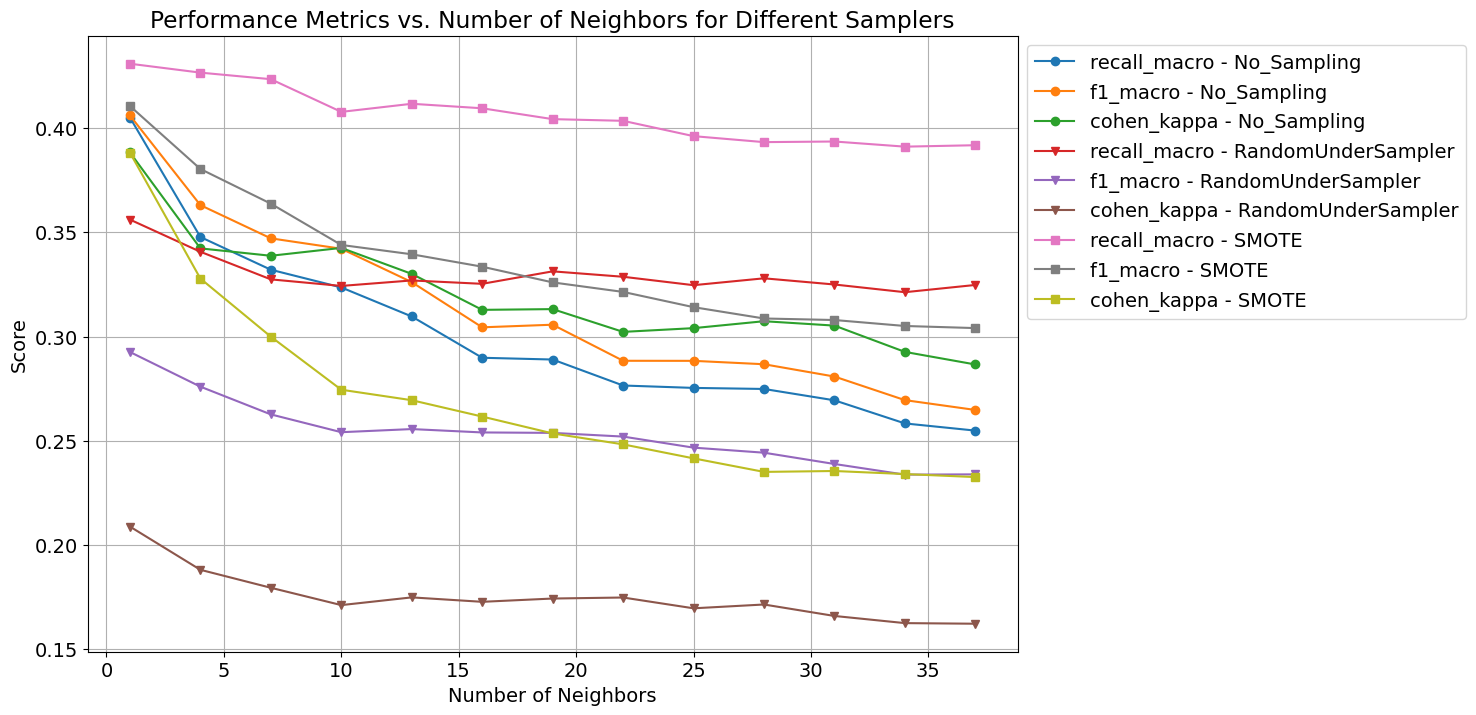

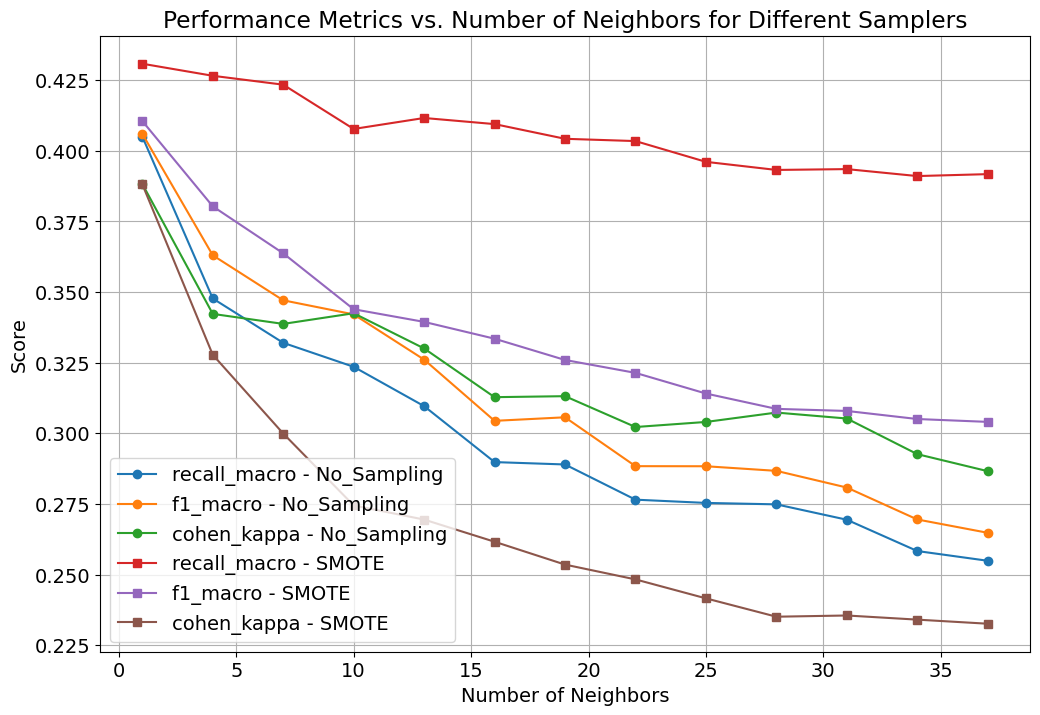

In [51]:
skf = StratifiedKFold(n_splits=5)

k_values = range(1, 40, 3)

metrics = {
    'No_Sampling': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RandomUnderSampler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'SMOTE': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for k in k_values:
    pipe = ImbPipeline([
        ('power', PowerTransformer()),
        ('knn', KNeighborsClassifier(n_neighbors=k, n_jobs=-1))
    ])
    predictions = cross_val_predict(pipe, x_train, y_train, cv=skf, method='predict')

    
    metrics['No_Sampling']['recall_macro'].append(recall_score(y_train, predictions, average='macro'))
    metrics['No_Sampling']['f1_macro'].append(f1_score(y_train, predictions, average='macro'))
    metrics['No_Sampling']['cohen_kappa'].append(cohen_kappa_score(y_train, predictions))

samplers = [
    ('RandomUnderSampler', RandomUnderSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
]

for sampler_name, sampler_obj in samplers:
    for k in k_values:
        pipe = ImbPipeline([
            ('power', PowerTransformer()),
            ('sampler', sampler_obj),
            ('knn', KNeighborsClassifier(n_neighbors=k, n_jobs=-1))
        ])
        predictions = cross_val_predict(pipe, x_train, y_train, cv=skf, method='predict')

        metrics[sampler_name]['recall_macro'].append(recall_score(y_train, predictions, average='macro'))
        metrics[sampler_name]['f1_macro'].append(f1_score(y_train, predictions, average='macro'))
        metrics[sampler_name]['cohen_kappa'].append(cohen_kappa_score(y_train, predictions))

plt.figure(figsize=(12, 8))
markers = {'No_Sampling': 'o', 'RandomUnderSampler': 'v', 'SMOTE':'s'}

for sampler_name in metrics:
    for metric_name in metrics[sampler_name]:
        plt.plot(k_values, metrics[sampler_name][metric_name], marker=markers[sampler_name], label=f'{metric_name} - {sampler_name}')

plt.title('Performance Metrics vs. Number of Neighbors for Different Samplers')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

for sampler_name in metrics:
    if sampler_name == 'RandomUnderSampler':
        continue
    for metric_name in metrics[sampler_name]:
        plt.plot(k_values, metrics[sampler_name][metric_name], marker=markers[sampler_name], label=f'{metric_name} - {sampler_name}')

plt.title('Performance Metrics vs. Number of Neighbors for Different Samplers')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


We observe that RandomUnderSampler gives the worse results and SMOTE the best one.

In [52]:
skf = StratifiedKFold(n_splits=5)

pipe = ImbPipeline([
    ('power', PowerTransformer()),
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
])
predictions = cross_val_predict(pipe, x_train, y_train, cv=skf, method='predict')
pipe.fit(x_train, y_train)

new_row = {
    'Scaler': 'PowerTransformer',
    'Sampler': 'SMOTE',
    'Weights': 'uniform',
    'Number of neighbors': 5,
    'Macro recall train': recall_score(y_train, pipe.predict(x_train), average='macro'),
    'Macro recall cv': recall_score(y_train, predictions, average='macro'),
    'Macro f1 cv': f1_score(y_train, predictions, average='macro'),
    'Cohens Kappa cv': cohen_kappa_score(y_train, predictions),
    'Accuracy cv': accuracy_score(y_train, predictions),
}
kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)
display(kNN_scores)

Scaler Sampler  Weights Number of neighbors  Macro recall train  \
0              None    None  uniform                   5            0.496250   
1  PowerTransformer    None  uniform                   5            0.553992   
2  PowerTransformer   SMOTE  uniform                   5            0.892403   

   Macro recall cv  Macro f1 cv  Cohens Kappa cv  Accuracy cv  
0         0.270455     0.288246         0.266886     0.419595  
1         0.339342     0.355766         0.331874     0.465760  
2         0.424284     0.371385         0.315336     0.399077

We also observe that usage of SMOTE highly increased overfitting.

Search for the best k_neighbors parameter for SMOTE:

Best Parameters: {'SMOTE__k_neighbors': 41}
Best macro Recall score: 0.4364287269362165

Mean Recall Macro for Best Estimator: 0.4364287269362165
Mean F1 Macro for Best Estimator: 0.372686687718751
Mean Cohen Kappa for Best Estimator: 0.31408000854130924


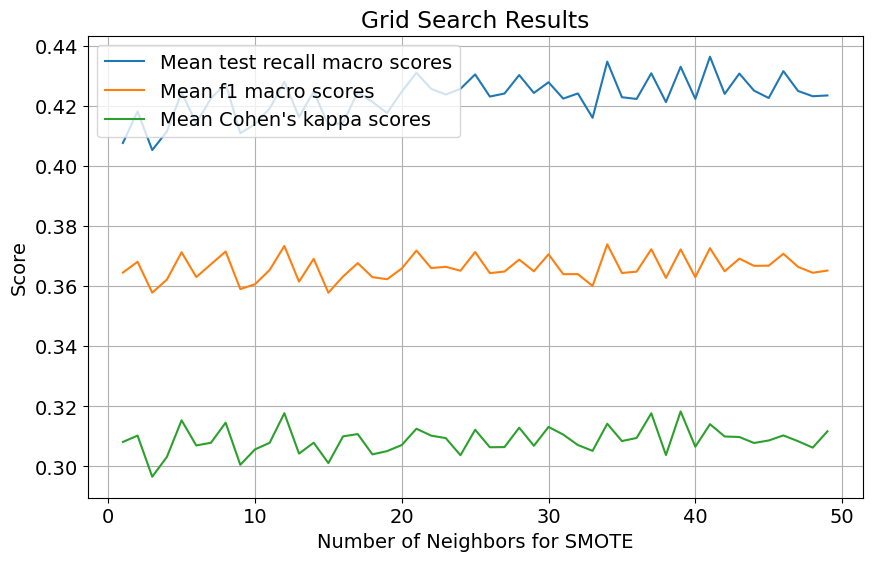

In [59]:
skf = StratifiedKFold(n_splits=5)

pipe = ImbPipeline([
    ('power', PowerTransformer()),
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

param_search = {
    'SMOTE__k_neighbors': np.arange(1, 50, 1),
    }
    
gridsearch = GridSearchCV(
    pipe,
    param_grid=param_search,
    scoring=scoring,
    n_jobs=-1,
    refit='recall_macro',
    cv=skf,
    )

gridsearch.fit(x_train, y_train)

print('Best Parameters:', gridsearch.best_params_)
print('Best macro Recall score:', gridsearch.best_score_)
print()
best_index = gridsearch.best_index_
mean_recall_macro = gridsearch.cv_results_['mean_test_recall_macro'][best_index]
mean_f1_macro = gridsearch.cv_results_['mean_test_f1_macro'][best_index]
mean_cohen_kappa = gridsearch.cv_results_['mean_test_cohen_kappa'][best_index]

print(f'Mean Recall Macro for Best Estimator: {mean_recall_macro}')
print(f'Mean F1 Macro for Best Estimator: {mean_f1_macro}')
print(f'Mean Cohen Kappa for Best Estimator: {mean_cohen_kappa}')


#plot results
results = gridsearch.cv_results_
mean_recall_scores = results['mean_test_recall_macro']
mean_f1_scores = results['mean_test_f1_macro']
mean_cohen_kappa = results['mean_test_cohen_kappa']
smote_values = results['param_SMOTE__k_neighbors']
plt.figure(figsize=(10, 6))
plt.plot(smote_values, mean_recall_scores, label='Mean test recall macro scores')
plt.plot(smote_values, mean_f1_scores, label='Mean f1 macro scores')
plt.plot(smote_values, mean_cohen_kappa, label="Mean Cohen's kappa scores")
plt.xlabel('Number of Neighbors for SMOTE')
plt.ylabel('Score')
plt.title('Grid Search Results')
plt.grid(True)
plt.legend()
plt.show()


Search for the best number of neighbors for kNN:

Best Parameters: {'knn__n_neighbors': 1}
Best macro Recall score: 0.44556930337726514

Mean Recall Macro for Best Estimator: 0.44556930337726514
Mean F1 Macro for Best Estimator: 0.40459021684022306
Mean Cohen Kappa for Best Estimator: 0.37939598108131906


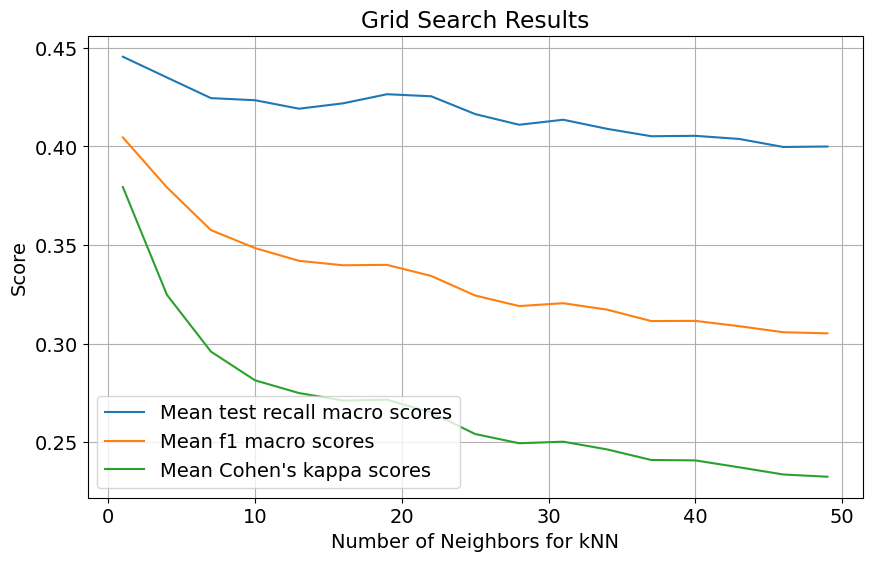

In [61]:
skf = StratifiedKFold(n_splits=5)

pipe = ImbPipeline([
    ('power', PowerTransformer()),
    ('SMOTE', SMOTE(k_neighbors=41, random_state=42)),
    ('knn', KNeighborsClassifier())
])

param_search = {
    'knn__n_neighbors': np.arange(1, 50, 3),
    }
    
gridsearch = GridSearchCV(
    pipe,
    param_grid=param_search,
    scoring=scoring,
    n_jobs=-1,
    refit='recall_macro',
    cv=skf,
    )

gridsearch.fit(x_train, y_train)

print('Best Parameters:', gridsearch.best_params_)
print('Best macro Recall score:', gridsearch.best_score_)
print()
best_index = gridsearch.best_index_
mean_recall_macro = gridsearch.cv_results_['mean_test_recall_macro'][best_index]
mean_f1_macro = gridsearch.cv_results_['mean_test_f1_macro'][best_index]
mean_cohen_kappa = gridsearch.cv_results_['mean_test_cohen_kappa'][best_index]

print(f'Mean Recall Macro for Best Estimator: {mean_recall_macro}')
print(f'Mean F1 Macro for Best Estimator: {mean_f1_macro}')
print(f'Mean Cohen Kappa for Best Estimator: {mean_cohen_kappa}')

#plot results
results = gridsearch.cv_results_
mean_recall_scores = results['mean_test_recall_macro']
mean_f1_scores = results['mean_test_f1_macro']
mean_cohen_kappa = results['mean_test_cohen_kappa']
smote_values = results['param_knn__n_neighbors']
plt.figure(figsize=(10, 6))
plt.plot(smote_values, mean_recall_scores, label='Mean test recall macro scores')
plt.plot(smote_values, mean_f1_scores, label='Mean f1 macro scores')
plt.plot(smote_values, mean_cohen_kappa, label="Mean Cohen's kappa scores")
plt.xlabel('Number of Neighbors for kNN')
plt.ylabel('Score')
plt.title('Grid Search Results')
plt.grid(True)
plt.legend()
plt.show()

We observe that despite the fact that knn__n_neighbors = 1 indicates overfitting, metrics are still very low.

We try to tune kNN changing the parameter weights to distance from default uniform.

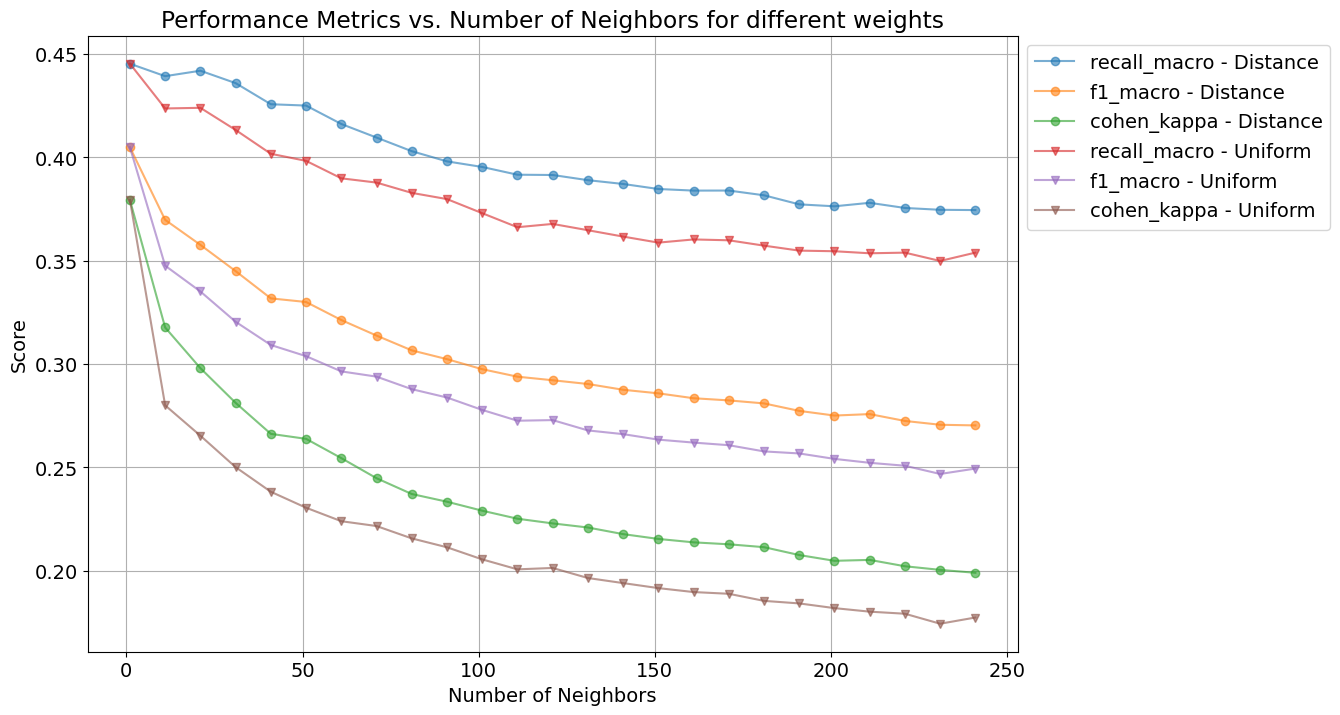

In [69]:
k_values = np.arange(1, 250, 10)

metrics = {
    'Distance': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Uniform': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for k in k_values:
    pipe = ImbPipeline([
        ('power', PowerTransformer()),
        ('SMOTE', SMOTE(random_state=42, k_neighbors=41)),
        ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1))
    ])
    pipe.fit(x_train, y_train)
    pred_val = cross_val_predict(pipe, x_train, y_train, cv=skf, n_jobs=-1)
    
    metrics['Distance']['recall_macro'].append(recall_score(y_train, pred_val, average='macro'))
    metrics['Distance']['f1_macro'].append(f1_score(y_train, pred_val, average='macro'))
    metrics['Distance']['cohen_kappa'].append(cohen_kappa_score(y_train, pred_val))

for k in k_values:
    pipe = ImbPipeline([
        ('power', PowerTransformer()),
        ('SMOTE', SMOTE(random_state=42, k_neighbors=41)),
        ('knn', KNeighborsClassifier(n_neighbors=k, weights='uniform', n_jobs=-1))
    ])
    pipe.fit(x_train, y_train)
    pred_val = cross_val_predict(pipe, x_train, y_train, cv=skf, n_jobs=-1)
    
    metrics['Uniform']['recall_macro'].append(recall_score(y_train, pred_val, average='macro'))
    metrics['Uniform']['f1_macro'].append(f1_score(y_train, pred_val, average='macro'))
    metrics['Uniform']['cohen_kappa'].append(cohen_kappa_score(y_train, pred_val))

plt.figure(figsize=(12, 8))
markers = {'Distance': 'o', 'Uniform': 'v', }


for set in metrics:
    for metric_name in metrics[set]:
        plt.plot(
            k_values,
            metrics[set][metric_name],
            marker=markers[set],
            label=f'{metric_name} - {set}',
            alpha=0.6
            )

plt.title('Performance Metrics vs. Number of Neighbors for different weights')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

In this case schanging weights to distance just slightly improves the model and from the graph we observe that still for n_neighbors=1 the metrics are the highest.

We will try to use polynomial features to see if it improves model performance:

Best Parameters: {'knn__n_neighbors': 7}
Best macro Recall score: 0.44141361183465005

Mean Recall Macro for Best Estimator: 0.44141361183465005
Mean F1 Macro for Best Estimator: 0.38256311768139784
Mean Cohen Kappa for Best Estimator: 0.33258675128843873


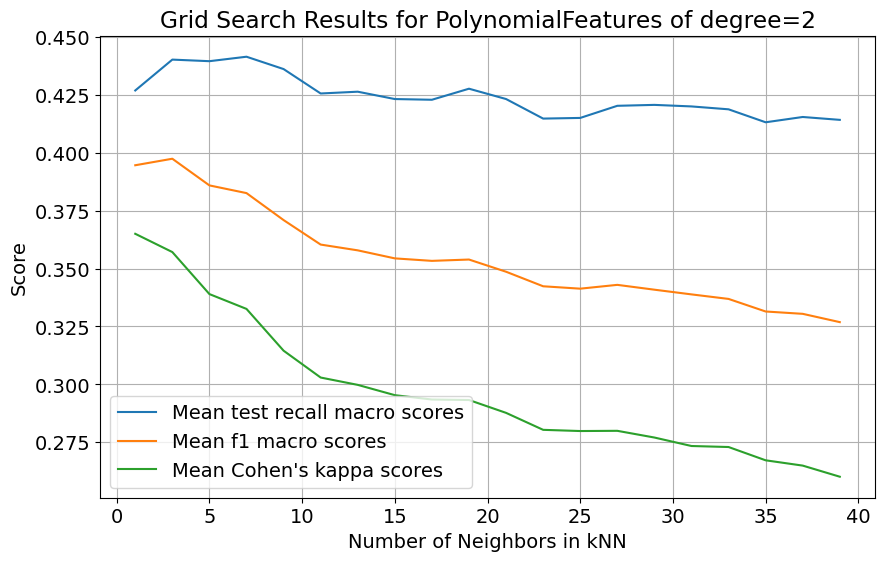

In [76]:
skf = StratifiedKFold(n_splits=5)

pipe = ImbPipeline([
    ('poly', PolynomialFeatures(degree=2, )),
    ('power', PowerTransformer()),
    ('SMOTE', SMOTE(random_state=42, k_neighbors=41)),
    ('knn', KNeighborsClassifier(weights='distance'))
])

param_search = {
    'knn__n_neighbors': np.arange(1, 40, 2),
    }
    
gridsearch = GridSearchCV(
    pipe,
    param_grid=param_search,
    scoring=scoring,
    refit='recall_macro',
    cv=skf,
    )

gridsearch.fit(x_train, y_train)

print('Best Parameters:', gridsearch.best_params_)
print('Best macro Recall score:', gridsearch.best_score_)
print()
best_index = gridsearch.best_index_
mean_recall_macro = gridsearch.cv_results_['mean_test_recall_macro'][best_index]
mean_f1_macro = gridsearch.cv_results_['mean_test_f1_macro'][best_index]
mean_cohen_kappa = gridsearch.cv_results_['mean_test_cohen_kappa'][best_index]

print(f'Mean Recall Macro for Best Estimator: {mean_recall_macro}')
print(f'Mean F1 Macro for Best Estimator: {mean_f1_macro}')
print(f'Mean Cohen Kappa for Best Estimator: {mean_cohen_kappa}')
best_knn = gridsearch.best_estimator_

results = gridsearch.cv_results_
mean_recall_scores = results['mean_test_recall_macro']
mean_f1_scores = results['mean_test_f1_macro']
mean_cohen_kappa = results['mean_test_cohen_kappa']
knn_values = results['param_knn__n_neighbors']
plt.figure(figsize=(10, 6))
plt.plot(knn_values, mean_recall_scores, label='Mean test recall macro scores')
plt.plot(knn_values, mean_f1_scores, label='Mean f1 macro scores')
plt.plot(knn_values, mean_cohen_kappa, label="Mean Cohen's kappa scores")
plt.xlabel('Number of Neighbors in kNN')
plt.ylabel('Score')
plt.title('Grid Search Results for PolynomialFeatures of degree=2')
plt.grid(True)
plt.legend()
plt.show()

We see that nothing helps to improve kNN in this case and conclude that previous results were determined by duplicates in data set and kNN actually did nothing but memorised all data points.

Next we will do a confusion matrix for train data:

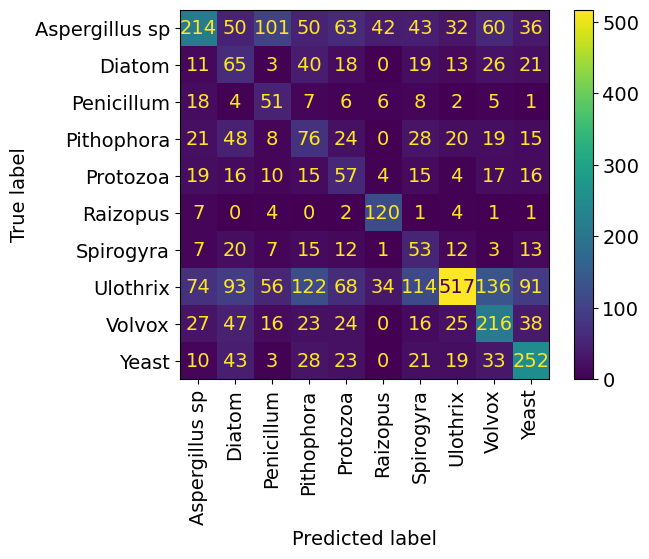

In [72]:
predictions = cross_val_predict(best_knn, x_train, y_train, cv=skf, method='predict')

cm = confusion_matrix(y_train, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

Evaluate model on test data:

Test metrics:
Macro recall: 0.46598631392326445
Macro f1: 0.4030309352789204
Cohens Kappa: 0.3489191667127892
Accuracy: 0.4307692307692308


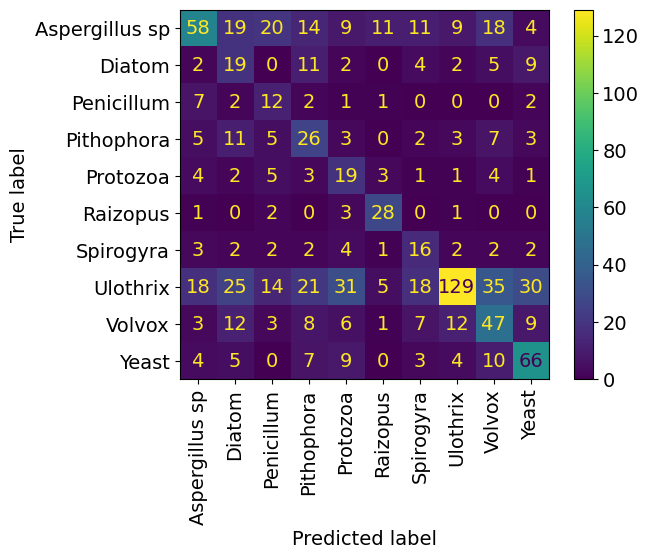

In [73]:
predict_test = best_knn.predict(x_test)
cm = confusion_matrix(y_test, predict_test)
print('Test metrics:')
print('Macro recall:', recall_score(y_test, predict_test, average='macro'))
print('Macro f1:', f1_score(y_test, predict_test, average='macro'))
print('Cohens Kappa:', cohen_kappa_score(y_test, predict_test))
print('Accuracy:', best_knn.score(x_test, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

We observe that results obtained on train set are confirmed also on test data.

### RandomForestClassifier

For better comparison of results we will save them into a dataframe. 

In [77]:
columns = [
    'Sampler',
    'n_estimators',
    'criterion',
    'max_features',
    'max_depth',
    'bootstrap',
    'Macro recall train',
    'Macro recall cv',
    'Macro f1 cv',
    'Cohens Kappa cv',
    'Accuracy cv',
    ]
randomforest_scores = pd.DataFrame(columns=columns)

Default model:

In [78]:
skf = StratifiedKFold(n_splits=5)

forest = RandomForestClassifier(
    n_jobs=-1,
    random_state=42
    )
predictions = cross_val_predict(forest, x_train, y_train, cv=skf, method='predict')
forest.fit(x_train, y_train)

new_row = {
    'Sampler': None,
    'n_estimators': 100,
    'criterion':'gini',
    'max_features': 'sqrt',
    'max_depth': None,
    'bootstrap': 'True',
    'Macro recall train': recall_score(y_train, forest.predict(x_train), average='macro'),
    'Macro recall cv': recall_score(y_train, predictions, average='macro'),
    'Macro f1 cv': f1_score(y_train, predictions, average='macro'),
    'Cohens Kappa cv': cohen_kappa_score(y_train, predictions),
    'Accuracy cv': accuracy_score(y_train, predictions),
    }
randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)
display(randomforest_scores)

C:\Users\user\AppData\Local\Temp\ipykernel_19580\1279572433.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)


Sampler n_estimators criterion max_features max_depth bootstrap  \
0    None          100      gini         sqrt      None      True   

   Macro recall train  Macro recall cv  Macro f1 cv  Cohens Kappa cv  \
0                 1.0         0.422661     0.450812         0.455106   

   Accuracy cv  
0     0.576815

We observe that metrics are very low and also the overfitting is huge.

Next we try different samplers to work with imbalance.

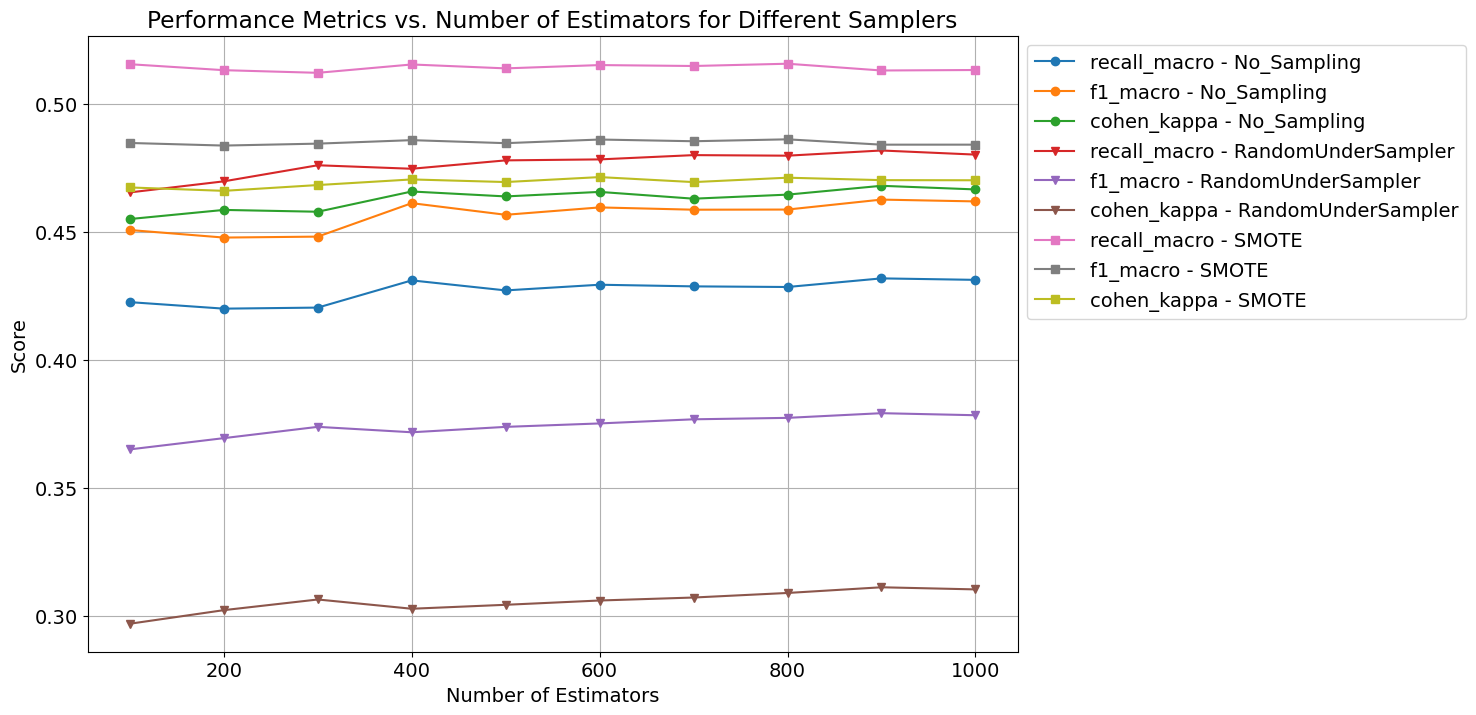

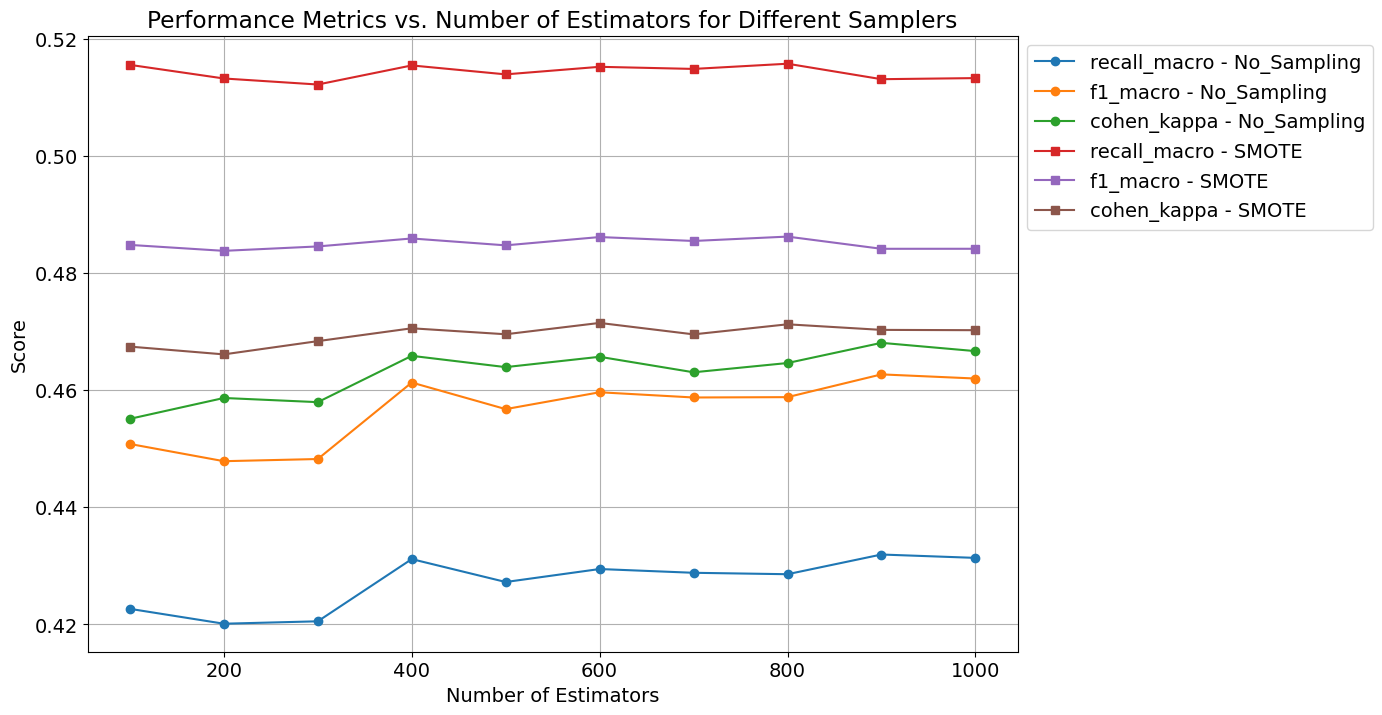

In [62]:
skf = StratifiedKFold(n_splits=5)

n_values = np.arange(100, 1001, 100)

metrics = {
    'No_Sampling': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RandomUnderSampler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'SMOTE': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for n in n_values:
    forest = RandomForestClassifier(n_estimators=n, n_jobs=-1, random_state=42)
    predictions = cross_val_predict(forest, x_train, y_train, cv=skf, method='predict')
    
    metrics['No_Sampling']['recall_macro'].append(recall_score(y_train, predictions, average='macro'))
    metrics['No_Sampling']['f1_macro'].append(f1_score(y_train, predictions, average='macro'))
    metrics['No_Sampling']['cohen_kappa'].append(cohen_kappa_score(y_train, predictions))

samplers = [
    ('RandomUnderSampler', RandomUnderSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
]

for sampler_name, sampler_obj in samplers:
    for n in n_values:
        pipe = ImbPipeline([
            ('sampler', sampler_obj),
            ('forest', RandomForestClassifier(n_estimators=n, n_jobs=-1, random_state=42))
        ])
        predictions = cross_val_predict(pipe, x_train, y_train, cv=skf, method='predict')

        metrics[sampler_name]['recall_macro'].append(recall_score(y_train, predictions, average='macro'))
        metrics[sampler_name]['f1_macro'].append(f1_score(y_train, predictions, average='macro'))
        metrics[sampler_name]['cohen_kappa'].append(cohen_kappa_score(y_train, predictions))

plt.figure(figsize=(12, 8))
markers = {'No_Sampling': 'o', 'RandomUnderSampler': 'v', 'SMOTE':'s'}

for sampler_name in metrics:
    for metric_name in metrics[sampler_name]:
        plt.plot(
            n_values,
            metrics[sampler_name][metric_name],
            marker=markers[sampler_name],
            label=f'{metric_name} - {sampler_name}'
            )

plt.title('Performance Metrics vs. Number of Estimators for Different Samplers')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

for sampler_name in metrics:
    if sampler_name == 'RandomUnderSampler':
        continue
    for metric_name in metrics[sampler_name]:
        plt.plot(n_values, metrics[sampler_name][metric_name], marker=markers[sampler_name], label=f'{metric_name} - {sampler_name}')

plt.title('Performance Metrics vs. Number of Estimators for Different Samplers')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


We see that SMOTE again shows better results then other samplers.

In [79]:
skf = StratifiedKFold(n_splits=5)

pipe = ImbPipeline([
            ('SMOTE', SMOTE(random_state=42)),
            ('forest', RandomForestClassifier(n_jobs=-1, random_state=42))
        ])
predictions = cross_val_predict(pipe, x_train, y_train, cv=skf, method='predict')
pipe.fit(x_train, y_train)

new_row = {
    'Sampler': 'SMOTE',
    'n_estimators': 100,
    'criterion': 'gini',
    'max_features': 'sqrt',
    'max_depth': None,
    'bootstrap': 'True',
    'Macro recall train': recall_score(y_train, pipe.predict(x_train), average='macro'),
    'Macro recall cv': recall_score(y_train, predictions, average='macro'),
    'Macro f1 cv': f1_score(y_train, predictions, average='macro'),
    'Cohens Kappa cv': cohen_kappa_score(y_train, predictions),
    'Accuracy cv': accuracy_score(y_train, predictions),
}
randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)
display(randomforest_scores)

Sampler n_estimators criterion max_features max_depth bootstrap  \
0    None          100      gini         sqrt      None      True   
1   SMOTE          100      gini         sqrt      None      True   

   Macro recall train  Macro recall cv  Macro f1 cv  Cohens Kappa cv  \
0                 1.0         0.422661     0.450812         0.455106   
1                 1.0         0.515545     0.484802         0.467437   

   Accuracy cv  
0     0.576815  
1     0.552706

Search for the best k_neighbors parameter for SMOTE:

Best Parameters: {'SMOTE__k_neighbors': 24}
Best macro Recall score: 0.524897601573868

Mean Recall Macro for Best Estimator: 0.524897601573868
Mean F1 Macro for Best Estimator: 0.4784569375006857
Mean Cohen Kappa for Best Estimator: 0.4591635222278231


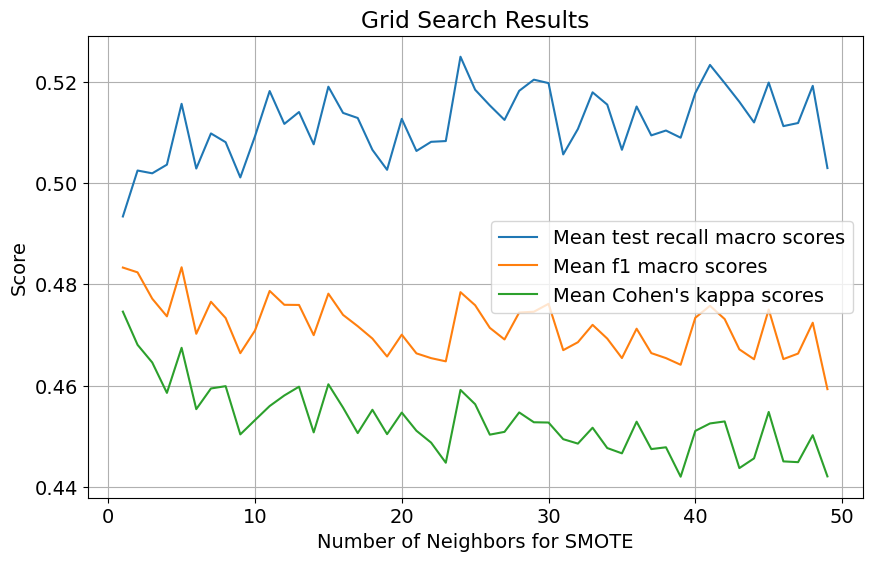

In [81]:
skf = StratifiedKFold(n_splits=5)

pipe = ImbPipeline([
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', RandomForestClassifier(n_jobs=-1, random_state=42))
])

param_search = {
    'SMOTE__k_neighbors': np.arange(1, 50, 1),
    }
    
gridsearch = GridSearchCV(
    pipe,
    param_grid=param_search,
    scoring=scoring,
    n_jobs=-1,
    refit='recall_macro',
    cv=skf,
    )

gridsearch.fit(x_train, y_train)

print('Best Parameters:', gridsearch.best_params_)
print('Best macro Recall score:', gridsearch.best_score_)
print()
best_index = gridsearch.best_index_
mean_recall_macro = gridsearch.cv_results_['mean_test_recall_macro'][best_index]
mean_f1_macro = gridsearch.cv_results_['mean_test_f1_macro'][best_index]
mean_cohen_kappa = gridsearch.cv_results_['mean_test_cohen_kappa'][best_index]

print(f'Mean Recall Macro for Best Estimator: {mean_recall_macro}')
print(f'Mean F1 Macro for Best Estimator: {mean_f1_macro}')
print(f'Mean Cohen Kappa for Best Estimator: {mean_cohen_kappa}')


#plot results
results = gridsearch.cv_results_
mean_recall_scores = results['mean_test_recall_macro']
mean_f1_scores = results['mean_test_f1_macro']
mean_cohen_kappa = results['mean_test_cohen_kappa']
smote_values = results['param_SMOTE__k_neighbors']
plt.figure(figsize=(10, 6))
plt.plot(smote_values, mean_recall_scores, label='Recall macro scores')
plt.plot(smote_values, mean_f1_scores, label='F1 macro scores')
plt.plot(smote_values, mean_cohen_kappa, label="Cohen's kappa scores")
plt.xlabel('Number of Neighbors for SMOTE')
plt.ylabel('Score')
plt.title('Grid Search Results')
plt.grid(True)
plt.legend()
plt.show()

Discover whether bootstrap param influences performance of a model:

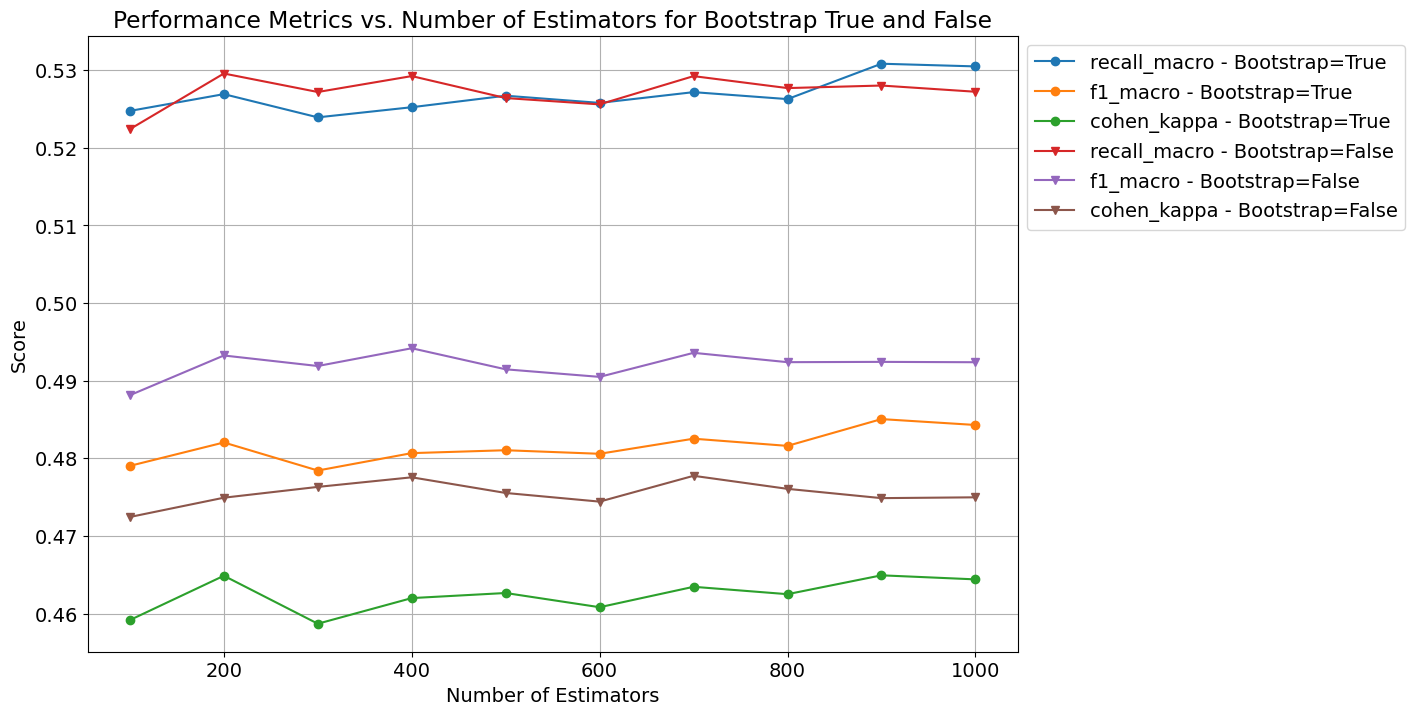

In [83]:
n_values = np.arange(100, 1001, 100)
skf = StratifiedKFold(n_splits=5)


metrics = {
    'Bootstrap=True': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Bootstrap=False': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for n in n_values:
    pipe_bootstrap_True = ImbPipeline([
        ('SMOTE', SMOTE(random_state=42, k_neighbors=24)),
        ('forest', RandomForestClassifier(n_estimators=n, n_jobs=-1, random_state=42))
    ])
    predictions = cross_val_predict(pipe_bootstrap_True, x_train, y_train, cv=skf, method='predict')
    
    metrics['Bootstrap=True']['recall_macro'].append(recall_score(y_train, predictions, average='macro'))
    metrics['Bootstrap=True']['f1_macro'].append(f1_score(y_train, predictions, average='macro'))
    metrics['Bootstrap=True']['cohen_kappa'].append(cohen_kappa_score(y_train, predictions))


    pipe_bootstrap_False = ImbPipeline([
        ('SMOTE', SMOTE(random_state=42, k_neighbors=24)),
        ('forest', RandomForestClassifier(n_estimators=n, bootstrap=False, n_jobs=-1, random_state=42))
    ])
    predictions = cross_val_predict(pipe_bootstrap_False, x_train, y_train, cv=skf, method='predict')

    
    metrics['Bootstrap=False']['recall_macro'].append(recall_score(y_train, predictions, average='macro'))
    metrics['Bootstrap=False']['f1_macro'].append(f1_score(y_train, predictions, average='macro'))
    metrics['Bootstrap=False']['cohen_kappa'].append(cohen_kappa_score(y_train, predictions))


plt.figure(figsize=(12, 8))
markers = {'Bootstrap=True': 'o', 'Bootstrap=False': 'v', }

for sampler_name in metrics:
    for metric_name in metrics[sampler_name]:
        plt.plot(
            n_values,
            metrics[sampler_name][metric_name],
            marker=markers[sampler_name],
            label=f'{metric_name} - {sampler_name}'
            )

plt.title('Performance Metrics vs. Number of Estimators for Bootstrap True and False')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

We observe that in this case bootstrap=False gives also better results then default parameter, but only for f1 and Cohen's Kappa. For recall metric results depends on number of estimators.

Next we do a search for hyperparameters. Again we predefine n_estimators=500 as it's number big enough to avoid overfitting and is small enough to get the results of modelling in reasonable time.

In [85]:
skf = StratifiedKFold(n_splits=5)

pipe = ImbPipeline([
    ('SMOTE', SMOTE(random_state=42, k_neighbors=24)),
    ('forest', RandomForestClassifier(
        n_estimators=500,
        bootstrap=False,
        random_state=42
        ))
    ])

param_grid = {
    'forest__max_features': np.arange(1, 10, 1),
    'forest__max_depth': np.arange(10, 51, 10),
    }

search = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit='recall_macro',
    cv=skf,
    verbose=3,
    )
search.fit(x_train, y_train)

print('Best Parameters:', search.best_params_)
print('Best macro Recall score:', search.best_score_)
print()
best_index = search.best_index_
mean_recall_macro = search.cv_results_['mean_test_recall_macro'][best_index]
mean_f1_macro = search.cv_results_['mean_test_f1_macro'][best_index]
mean_cohen_kappa = search.cv_results_['mean_test_cohen_kappa'][best_index]

print(f'Mean Recall Macro for Best Estimator: {mean_recall_macro}')
print(f'Mean F1 Macro for Best Estimator: {mean_f1_macro}')
print(f'Mean Cohen Kappa for Best Estimator: {mean_cohen_kappa}')
best_forest = search.best_estimator_

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END forest__max_depth=10, forest__max_features=1; cohen_kappa: (test=0.328) f1_macro: (test=0.384) recall_macro: (test=0.471) total time=   8.8s
[CV 2/5] END forest__max_depth=10, forest__max_features=1; cohen_kappa: (test=0.330) f1_macro: (test=0.375) recall_macro: (test=0.444) total time=   8.8s
[CV 3/5] END forest__max_depth=10, forest__max_features=1; cohen_kappa: (test=0.347) f1_macro: (test=0.397) recall_macro: (test=0.473) total time=   8.0s
[CV 4/5] END forest__max_depth=10, forest__max_features=1; cohen_kappa: (test=0.322) f1_macro: (test=0.355) recall_macro: (test=0.431) total time=   8.2s
[CV 5/5] END forest__max_depth=10, forest__max_features=1; cohen_kappa: (test=0.326) f1_macro: (test=0.365) recall_macro: (test=0.415) total time=   8.1s
[CV 1/5] END forest__max_depth=10, forest__max_features=2; cohen_kappa: (test=0.358) f1_macro: (test=0.406) recall_macro: (test=0.475) total time=  14.5s
[CV 2/5] END f

Look at the feature importance for the model with the best params.

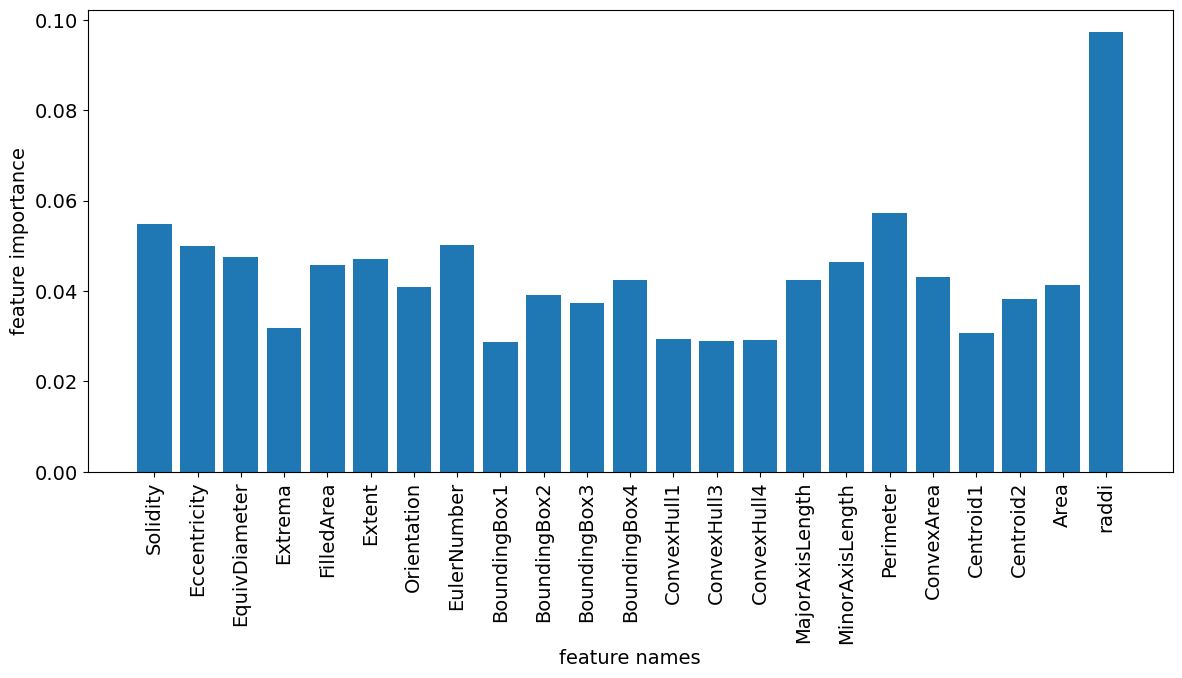

In [86]:
plt.figure(figsize=(14,6))
plt.bar(list(x_train.columns), best_forest.named_steps['forest'].feature_importances_)
plt.xlabel('feature names')
plt.ylabel('feature importance')
plt.xticks(rotation=90)
plt.show()

We see that we have one the most important feature - 'raddi', the dame as for model with duplicates.

Make confusion matrix.

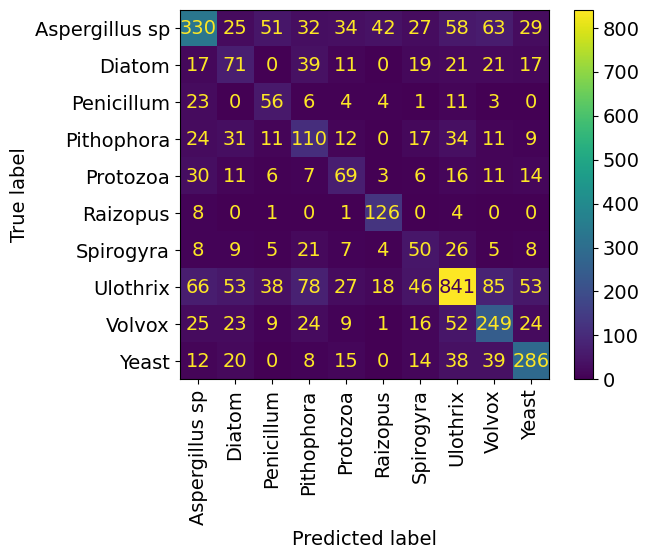

In [87]:
skf = StratifiedKFold(n_splits=5)

predictions = cross_val_predict(best_forest, x_train, y_train, cv=skf, method='predict')

cm = confusion_matrix(y_train, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_forest.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

Evaluate model on test data:

Test metrics:
Macro recall: 0.5672069566080281
Macro f1: 0.5278661557052859
Cohens Kappa: 0.5101343520517412
Accuracy: 0.5887179487179487


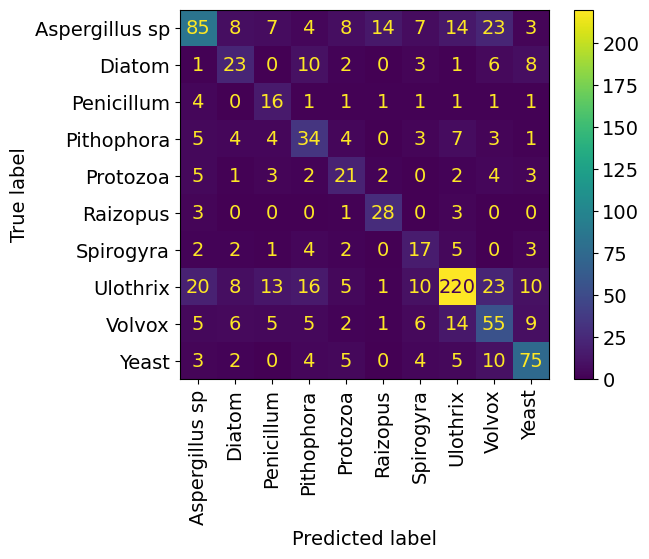

In [88]:
predict_test = best_forest.predict(x_test)
cm = confusion_matrix(y_test, predict_test)
print('Test metrics:')
print('Macro recall:', recall_score(y_test, predict_test, average='macro'))
print('Macro f1:', f1_score(y_test, predict_test, average='macro'))
print('Cohens Kappa:', cohen_kappa_score(y_test, predict_test))
print('Accuracy:', best_forest.score(x_test, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_forest.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

### GradientBoostingClassifier

For better comparison of results we will save them into a dataframe. 

In [33]:
columns = [
    'Sampler',
    'n_estimators',
    'learning_rate',
    'max_depth',
    'Macro recall train',
    'Macro recall cv',
    'Macro f1 cv',
    'Cohens Kappa cv',
    'Accuracy cv',
    ]
gradient_scores = pd.DataFrame(columns=columns)

Default model:

In [34]:
skf = StratifiedKFold(n_splits=5)

gradient = GradientBoostingClassifier(
    n_estimators=100, #default parameter
    learning_rate=0.1, #default parameter
    max_depth=3, #default parameter
    random_state=42
    )
predictions = cross_val_predict(gradient, x_train, y_train, cv=skf, method='predict')
gradient.fit(x_train, y_train)

new_row = {
    'Sampler': None,
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'Macro recall train': recall_score(y_train, gradient.predict(x_train), average='macro'),
    'Macro recall cv': recall_score(y_train, predictions, average='macro'),
    'Macro f1 cv': f1_score(y_train, predictions, average='macro'),
    'Cohens Kappa cv': cohen_kappa_score(y_train, predictions),
    'Accuracy cv': accuracy_score(y_train, predictions),
}
gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)
display(gradient_scores)

C:\Users\user\AppData\Local\Temp\ipykernel_19580\19887196.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)


Sampler n_estimators  learning_rate max_depth  Macro recall train  \
0    None          100            0.1         3            0.860615   

   Macro recall cv  Macro f1 cv  Cohens Kappa cv  Accuracy cv  
0          0.54506     0.592931         0.538849     0.638882

We observe a high level of overfitting.

Discover the best sampler:

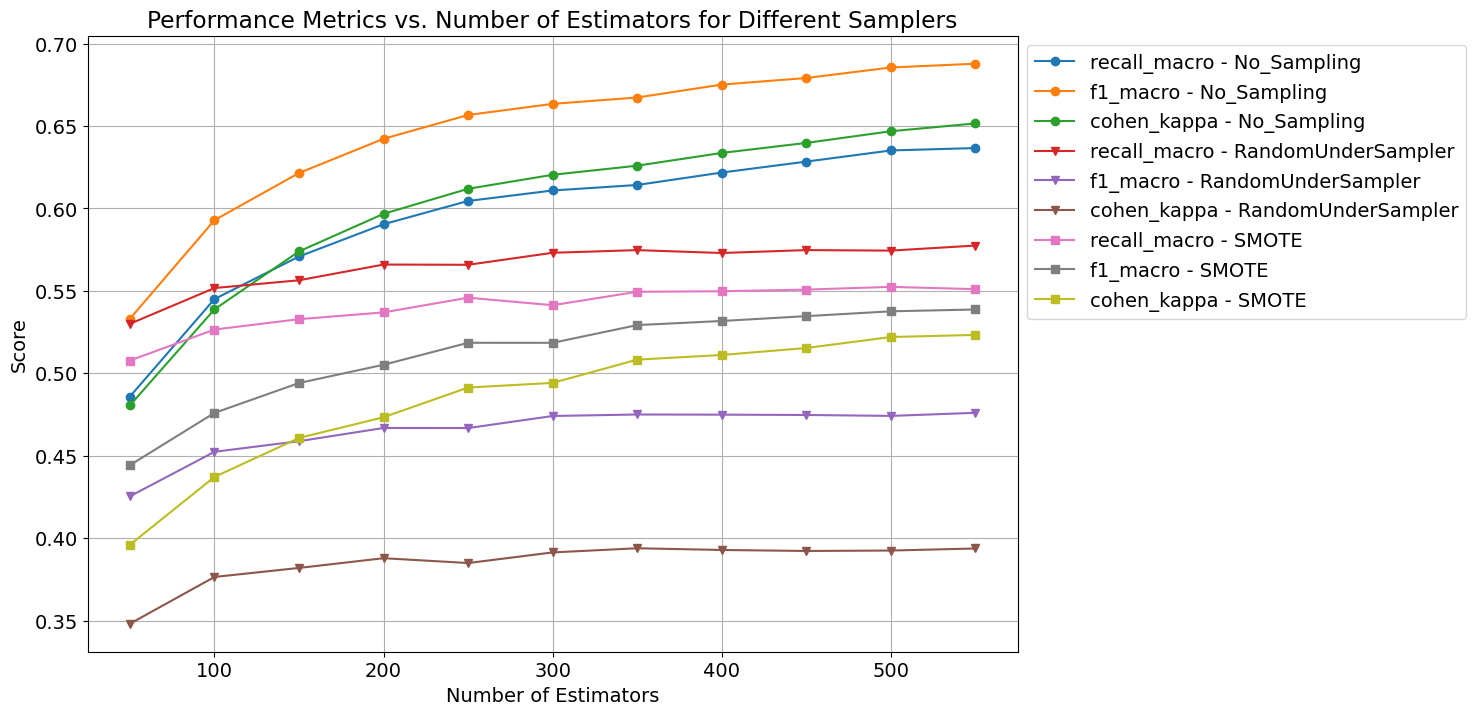

In [89]:
n_values = np.arange(50, 551, 50)
skf = StratifiedKFold(n_splits=5)

metrics = {
    'No_Sampling': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RandomUnderSampler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'SMOTE': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for n in n_values:
    gradient =  GradientBoostingClassifier(n_estimators=n, random_state=42)
    predictions = cross_val_predict(gradient, x_train, y_train, cv=skf, method='predict')
    
    metrics['No_Sampling']['recall_macro'].append(recall_score(y_train, predictions, average='macro'))
    metrics['No_Sampling']['f1_macro'].append(f1_score(y_train, predictions, average='macro'))
    metrics['No_Sampling']['cohen_kappa'].append(cohen_kappa_score(y_train, predictions))

samplers = [
    ('RandomUnderSampler', RandomUnderSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
]

for sampler_name, sampler_obj in samplers:
    for n in n_values:
        pipe = ImbPipeline([
            ('sampler', sampler_obj),
            ('gradient', GradientBoostingClassifier(n_estimators=n, random_state=42))
        ])
        predictions = cross_val_predict(pipe, x_train, y_train, cv=skf, method='predict')

        metrics[sampler_name]['recall_macro'].append(recall_score(y_train, predictions, average='macro'))
        metrics[sampler_name]['f1_macro'].append(f1_score(y_train, predictions, average='macro'))
        metrics[sampler_name]['cohen_kappa'].append(cohen_kappa_score(y_train, predictions))

plt.figure(figsize=(12, 8))
markers = {'No_Sampling': 'o', 'RandomUnderSampler': 'v', 'SMOTE':'s'}

for sampler_name in metrics:
    for metric_name in metrics[sampler_name]:
        plt.plot(
            n_values,
            metrics[sampler_name][metric_name],
            marker=markers[sampler_name],
            label=f'{metric_name} - {sampler_name}'
            )

plt.title('Performance Metrics vs. Number of Estimators for Different Samplers')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


We observe that again without sampling model performs slightly better. Also we need more estimators to improve model.

Make graphs to approximate needed number of estimators:

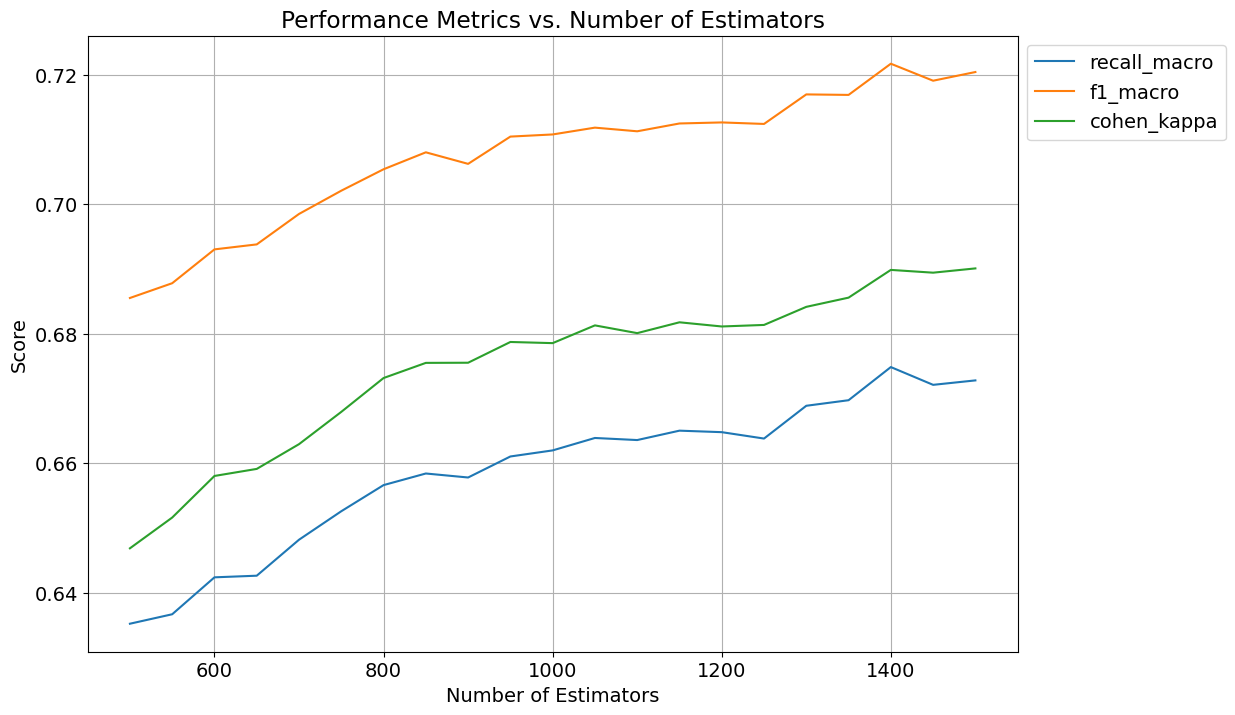

In [52]:
n_values = np.arange(500, 1501, 50)
skf = StratifiedKFold(n_splits=5)

metrics = {
    'recall_macro': [],
    'f1_macro': [],
    'cohen_kappa': [],
}

for n in n_values:
    gradient =  GradientBoostingClassifier(n_estimators=n, random_state=42)
    predictions = cross_val_predict(gradient, x_train, y_train, cv=skf, method='predict')
    
    metrics['recall_macro'].append(recall_score(y_train, predictions, average='macro'))
    metrics['f1_macro'].append(f1_score(y_train, predictions, average='macro'))
    metrics['cohen_kappa'].append(cohen_kappa_score(y_train, predictions))


plt.figure(figsize=(12, 8))


for metric_name in metrics:
    plt.plot(
        n_values,
        metrics[metric_name],
        label=f'{metric_name}'
        )

plt.title('Performance Metrics vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


We see that with increasing number of estimators all metrics increase, but also increase time, needed to fit model. So we choose n_estimators = 850 and will search for other hyperparameters:

In [50]:
skf = StratifiedKFold(n_splits=5)

gradient = GradientBoostingClassifier(
    n_estimators=850,
    random_state=42
    )

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 1],
    'max_depth': np.arange(1, 6, 1),
    }

search = GridSearchCV(
    gradient,
    param_grid=param_grid,
    scoring=scoring,
    refit='recall_macro',
    cv=skf,
    verbose=3,
    )

search.fit(x_train, y_train)

print('Best Parameters:', search.best_params_)
print('Best macro Recall score:', search.best_score_)
print()
best_index = search.best_index_
mean_recall_macro = search.cv_results_['mean_test_recall_macro'][best_index]
mean_f1_macro = search.cv_results_['mean_test_f1_macro'][best_index]
mean_cohen_kappa = search.cv_results_['mean_test_cohen_kappa'][best_index]

print(f'Mean Recall Macro for Best Estimator: {mean_recall_macro}')
print(f'Mean F1 Macro for Best Estimator: {mean_f1_macro}')
print(f'Mean Cohen Kappa for Best Estimator: {mean_cohen_kappa}')
best_gradient = search.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END learning_rate=0.001, max_depth=1; cohen_kappa: (test=0.165) f1_macro: (test=0.180) recall_macro: (test=0.193) total time=  40.7s
[CV 2/5] END learning_rate=0.001, max_depth=1; cohen_kappa: (test=0.154) f1_macro: (test=0.167) recall_macro: (test=0.184) total time=  40.3s
[CV 3/5] END learning_rate=0.001, max_depth=1; cohen_kappa: (test=0.164) f1_macro: (test=0.175) recall_macro: (test=0.183) total time=  40.4s
[CV 4/5] END learning_rate=0.001, max_depth=1; cohen_kappa: (test=0.129) f1_macro: (test=0.147) recall_macro: (test=0.168) total time=  40.5s
[CV 5/5] END learning_rate=0.001, max_depth=1; cohen_kappa: (test=0.163) f1_macro: (test=0.180) recall_macro: (test=0.189) total time=  40.4s
[CV 1/5] END learning_rate=0.001, max_depth=2; cohen_kappa: (test=0.191) f1_macro: (test=0.210) recall_macro: (test=0.211) total time= 1.3min
[CV 2/5] END learning_rate=0.001, max_depth=2; cohen_kappa: (test=0.202) f1_macro: (te

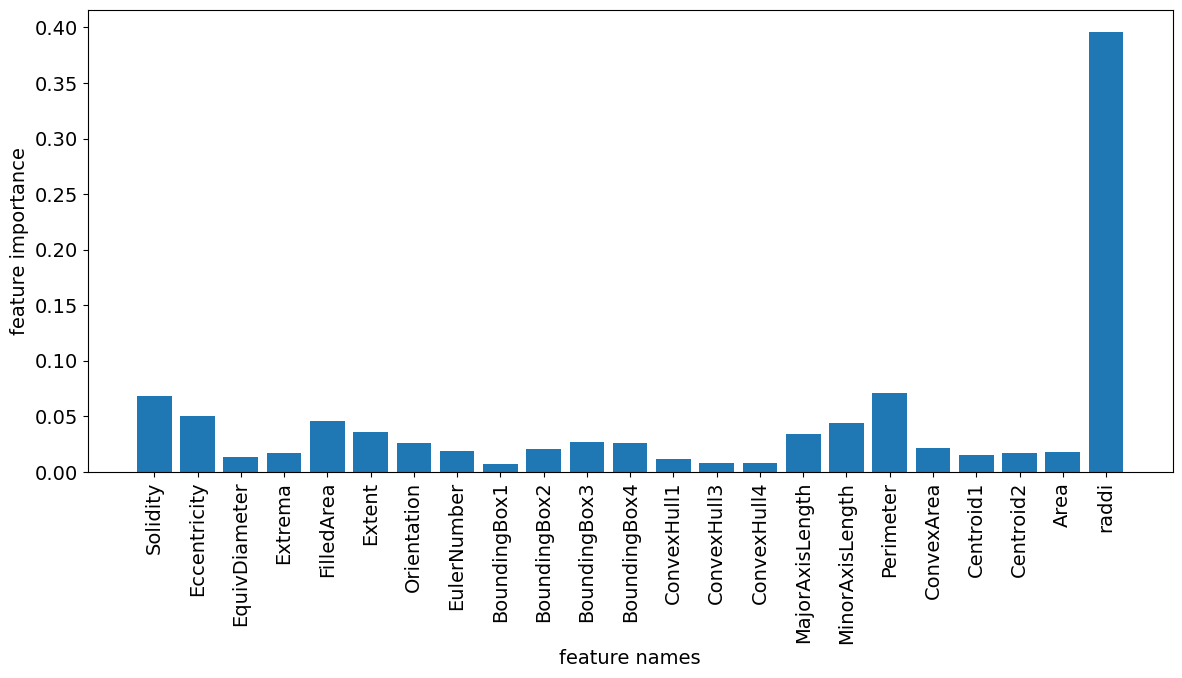

In [54]:
plt.figure(figsize=(14,6))
plt.bar(list(x_train.columns), best_gradient.feature_importances_)
plt.xlabel('feature names')
plt.ylabel('feature importance')
plt.xticks(rotation=90)
plt.show()

Search for hyperparameters:

Make confusion matrix.

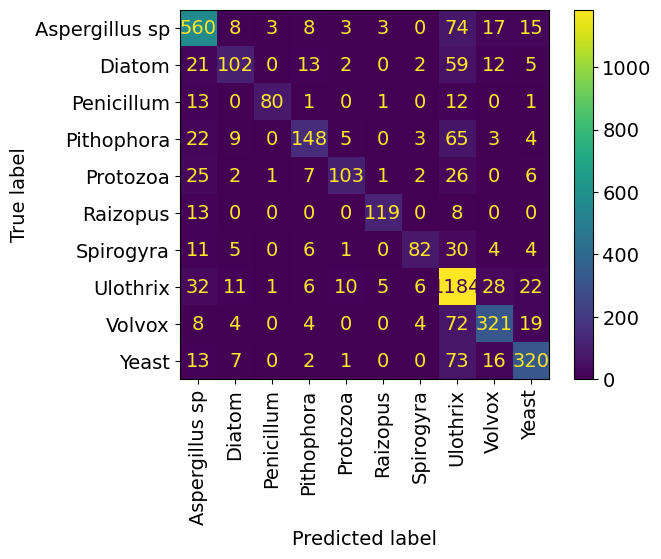

In [55]:
skf = StratifiedKFold(n_splits=5)

predictions = cross_val_predict(best_gradient, x_train, y_train, cv=skf, method='predict')

cm = confusion_matrix(y_train, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gradient.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

Evaluate model on test data:

Test metrics:
Macro recall: 0.7289998350455384
Macro f1: 0.765631728369938
Cohens Kappa: 0.7407710137373594
Accuracy: 0.7928205128205128


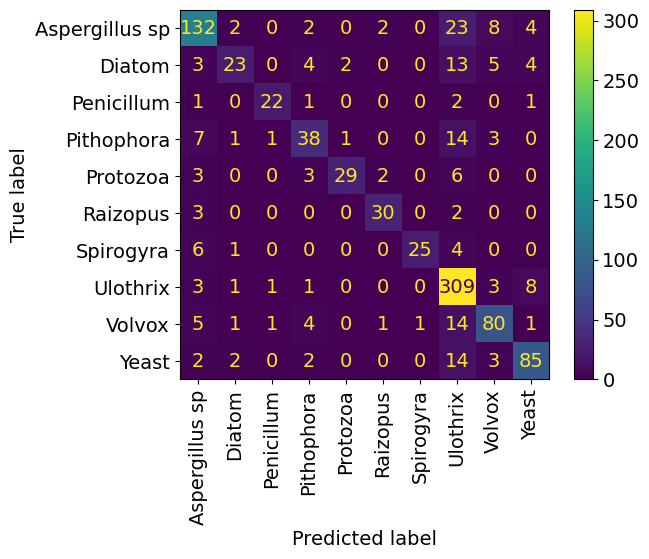

In [56]:
predict_test = best_gradient.predict(x_test)
cm = confusion_matrix(y_test, predict_test)
print('Test metrics:')
print('Macro recall:', recall_score(y_test, predict_test, average='macro'))
print('Macro f1:', f1_score(y_test, predict_test, average='macro'))
print('Cohens Kappa:', cohen_kappa_score(y_test, predict_test))
print('Accuracy:', best_gradient.score(x_test, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gradient.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

We observe that results obtained on validation set are confirmed also on test data.

### Logistic regression

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer

REMARK:

StandardScaler() doesn't work good when the data doesn't follow Gaussian distribution.  
QuantileTransformer(output_distribution='uniform') is also not a good choice for Logistic Regression.  
Normalizer() is not suitable for Logistic Regression.

In [ ]:
scalers = [RobustScaler(),
           PowerTransformer(method='yeo-johnson'),
           QuantileTransformer(output_distribution='normal')
           ]

x_train_scaled = [x_train, ]
x_test_scaled = [x_test, ]

for scaler in scalers:
    x_train_scaled.append(pd.DataFrame(scaler.fit_transform(x_train)))
    x_test_scaled.append(pd.DataFrame(scaler.transform(x_test)))

In [ ]:
list_of_scalers = [
    'No scaling',
    'RobustScaler',
    'PowerTransformer',
    'QuantileTransformer (Gaussian)'
    ]

data_scalers = {
    'Scaler': None,
    'macro recall train': None,
    'macro recall validation' : None,
    'macro f1 train': None,
    'macro f1 validation': None,
    'Cohens Kappa train': None,
    'Cohens Kappa validation': None
}

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
logreg_quick_scores_no_dupl = pd.DataFrame(data=data_scalers, index=np.arange(len(list_of_scalers)))

for count, x_train_scale in enumerate(x_train_scaled):

    logreg_baseline = LogisticRegression(solver='saga', max_iter=100_000, n_jobs=-1)
    logreg_baseline.fit(x_train, y_train)

    scores = cross_validate(logreg_baseline, x_train_scale, y_train, cv=skf, scoring=scoring, return_train_score=True, n_jobs=-1)

    logreg_quick_scores_no_dupl.loc[count] = [
    list_of_scalers[count],
    scores['train_recall_macro'].mean(),
    scores['test_recall_macro'].mean(),
    scores['train_f1_macro'].mean(),
    scores['test_f1_macro'].mean(),
    scores['train_cohen_kappa'].mean(),
    scores['test_cohen_kappa'].mean()
    ]

In [ ]:
display(logreg_quick_scores_no_dupl)

Scaler macro recall train macro recall validation  \
0                      No scaling           0.304399                 0.29004   
1                    RobustScaler           0.308556                0.295853   
2                PowerTransformer           0.321441                0.301575   
3  QuantileTransformer (Gaussian)           0.306921                0.290761   

  macro f1 train macro f1 validation Cohens Kappa train  \
0       0.314324            0.294896           0.310295   
1       0.318872            0.302074           0.324488   
2       0.329563            0.305519           0.337707   
3       0.314522            0.294262           0.311064   

  Cohens Kappa validation  
0                0.295573  
1                0.307618  
2                0.317605  
3                0.289686

It seems that PowerTransformer is the best option.

Lets now see if resampling will influence model's performance.  

First we need to find the best hyperparameter k_neighbors for SMOTE.

In [ ]:
smote_pipe_logreg_no_dupl = ImbPipeline([
    ('smote', SMOTE(random_state=73)),
    ('scaler', PowerTransformer()),
    ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000))
])

param_grid_logreg_no_dupl = {'smote__k_neighbors': np.arange(1, 21, 1)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=73)
smote_grid_logreg_no_dupl = GridSearchCV(smote_pipe_logreg_no_dupl, param_grid=param_grid_logreg_no_dupl, scoring=scoring, refit='recall_macro', cv=skf, verbose=3)

smote_grid_logreg_no_dupl.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=1; cohen_kappa: (test=0.267) f1_macro: (test=0.330) recall_macro: (test=0.408) total time=   2.3s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=1; cohen_kappa: (test=0.325) f1_macro: (test=0.393) recall_macro: (test=0.492) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=1; cohen_kappa: (test=0.266) f1_macro: (test=0.327) recall_macro: (test=0.403) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=1; cohen_kappa: (test=0.302) f1_macro: (test=0.358) recall_macro: (test=0.445) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=1; cohen_kappa: (test=0.264) f1_macro: (test=0.327) recall_macro: (test=0.417) total time=   2.6s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=2; cohen_kappa: (test=0.264) f1_macro: (test=0.330) recall_macro: (test=0.410) total time=   2.4s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=2; cohen_kappa: (test=0.306) f1_macro: (test=0.371) recall_macro: (test=0.473) total time=   2.7s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=2; cohen_kappa: (test=0.270) f1_macro: (test=0.332) recall_macro: (test=0.407) total time=   2.7s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=2; cohen_kappa: (test=0.298) f1_macro: (test=0.359) recall_macro: (test=0.450) total time=   2.6s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=2; cohen_kappa: (test=0.259) f1_macro: (test=0.323) recall_macro: (test=0.411) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=3; cohen_kappa: (test=0.264) f1_macro: (test=0.328) recall_macro: (test=0.401) total time=   2.3s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=3; cohen_kappa: (test=0.326) f1_macro: (test=0.390) recall_macro: (test=0.485) total time=   2.7s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=3; cohen_kappa: (test=0.267) f1_macro: (test=0.329) recall_macro: (test=0.401) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=3; cohen_kappa: (test=0.305) f1_macro: (test=0.365) recall_macro: (test=0.449) total time=   2.6s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=3; cohen_kappa: (test=0.264) f1_macro: (test=0.327) recall_macro: (test=0.419) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=4; cohen_kappa: (test=0.270) f1_macro: (test=0.333) recall_macro: (test=0.403) total time=   2.3s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=4; cohen_kappa: (test=0.300) f1_macro: (test=0.368) recall_macro: (test=0.468) total time=   2.8s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=4; cohen_kappa: (test=0.258) f1_macro: (test=0.322) recall_macro: (test=0.394) total time=   2.8s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=4; cohen_kappa: (test=0.294) f1_macro: (test=0.357) recall_macro: (test=0.450) total time=   2.6s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=4; cohen_kappa: (test=0.273) f1_macro: (test=0.335) recall_macro: (test=0.422) total time=   2.6s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=5; cohen_kappa: (test=0.259) f1_macro: (test=0.323) recall_macro: (test=0.393) total time=   2.7s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=5; cohen_kappa: (test=0.309) f1_macro: (test=0.374) recall_macro: (test=0.470) total time=   2.7s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=5; cohen_kappa: (test=0.254) f1_macro: (test=0.317) recall_macro: (test=0.387) total time=   2.8s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=5; cohen_kappa: (test=0.303) f1_macro: (test=0.366) recall_macro: (test=0.458) total time=   2.6s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=5; cohen_kappa: (test=0.282) f1_macro: (test=0.343) recall_macro: (test=0.437) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=6; cohen_kappa: (test=0.267) f1_macro: (test=0.331) recall_macro: (test=0.405) total time=   2.6s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=6; cohen_kappa: (test=0.299) f1_macro: (test=0.365) recall_macro: (test=0.460) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=6; cohen_kappa: (test=0.253) f1_macro: (test=0.316) recall_macro: (test=0.388) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=6; cohen_kappa: (test=0.294) f1_macro: (test=0.357) recall_macro: (test=0.441) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=6; cohen_kappa: (test=0.275) f1_macro: (test=0.334) recall_macro: (test=0.421) total time=   2.8s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=7; cohen_kappa: (test=0.265) f1_macro: (test=0.329) recall_macro: (test=0.398) total time=   2.4s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=7; cohen_kappa: (test=0.310) f1_macro: (test=0.376) recall_macro: (test=0.469) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=7; cohen_kappa: (test=0.265) f1_macro: (test=0.326) recall_macro: (test=0.400) total time=   2.7s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=7; cohen_kappa: (test=0.299) f1_macro: (test=0.361) recall_macro: (test=0.445) total time=   2.7s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=7; cohen_kappa: (test=0.270) f1_macro: (test=0.328) recall_macro: (test=0.415) total time=   2.6s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=8; cohen_kappa: (test=0.268) f1_macro: (test=0.328) recall_macro: (test=0.399) total time=   2.4s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=8; cohen_kappa: (test=0.310) f1_macro: (test=0.372) recall_macro: (test=0.470) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=8; cohen_kappa: (test=0.258) f1_macro: (test=0.323) recall_macro: (test=0.397) total time=   2.8s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=8; cohen_kappa: (test=0.305) f1_macro: (test=0.360) recall_macro: (test=0.449) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=8; cohen_kappa: (test=0.274) f1_macro: (test=0.330) recall_macro: (test=0.413) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=9; cohen_kappa: (test=0.266) f1_macro: (test=0.329) recall_macro: (test=0.399) total time=   2.4s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=9; cohen_kappa: (test=0.318) f1_macro: (test=0.382) recall_macro: (test=0.477) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=9; cohen_kappa: (test=0.253) f1_macro: (test=0.316) recall_macro: (test=0.387) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=9; cohen_kappa: (test=0.303) f1_macro: (test=0.363) recall_macro: (test=0.452) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=9; cohen_kappa: (test=0.286) f1_macro: (test=0.345) recall_macro: (test=0.433) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=10; cohen_kappa: (test=0.264) f1_macro: (test=0.324) recall_macro: (test=0.395) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=10; cohen_kappa: (test=0.321) f1_macro: (test=0.386) recall_macro: (test=0.481) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=10; cohen_kappa: (test=0.250) f1_macro: (test=0.314) recall_macro: (test=0.382) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=10; cohen_kappa: (test=0.314) f1_macro: (test=0.371) recall_macro: (test=0.457) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=10; cohen_kappa: (test=0.275) f1_macro: (test=0.336) recall_macro: (test=0.422) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=11; cohen_kappa: (test=0.264) f1_macro: (test=0.326) recall_macro: (test=0.395) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=11; cohen_kappa: (test=0.316) f1_macro: (test=0.385) recall_macro: (test=0.477) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=11; cohen_kappa: (test=0.252) f1_macro: (test=0.320) recall_macro: (test=0.391) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=11; cohen_kappa: (test=0.302) f1_macro: (test=0.361) recall_macro: (test=0.448) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=11; cohen_kappa: (test=0.282) f1_macro: (test=0.341) recall_macro: (test=0.428) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=12; cohen_kappa: (test=0.269) f1_macro: (test=0.331) recall_macro: (test=0.399) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=12; cohen_kappa: (test=0.316) f1_macro: (test=0.380) recall_macro: (test=0.479) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=12; cohen_kappa: (test=0.252) f1_macro: (test=0.318) recall_macro: (test=0.387) total time=   2.8s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=12; cohen_kappa: (test=0.315) f1_macro: (test=0.371) recall_macro: (test=0.461) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=12; cohen_kappa: (test=0.274) f1_macro: (test=0.331) recall_macro: (test=0.415) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=13; cohen_kappa: (test=0.272) f1_macro: (test=0.332) recall_macro: (test=0.403) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=13; cohen_kappa: (test=0.315) f1_macro: (test=0.379) recall_macro: (test=0.472) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=13; cohen_kappa: (test=0.263) f1_macro: (test=0.325) recall_macro: (test=0.392) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=13; cohen_kappa: (test=0.301) f1_macro: (test=0.359) recall_macro: (test=0.439) total time=   3.3s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=13; cohen_kappa: (test=0.275) f1_macro: (test=0.333) recall_macro: (test=0.414) total time=   3.3s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=14; cohen_kappa: (test=0.268) f1_macro: (test=0.331) recall_macro: (test=0.398) total time=   2.6s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=14; cohen_kappa: (test=0.320) f1_macro: (test=0.386) recall_macro: (test=0.479) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=14; cohen_kappa: (test=0.270) f1_macro: (test=0.335) recall_macro: (test=0.407) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=14; cohen_kappa: (test=0.311) f1_macro: (test=0.372) recall_macro: (test=0.458) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=14; cohen_kappa: (test=0.282) f1_macro: (test=0.336) recall_macro: (test=0.421) total time=   3.2s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=15; cohen_kappa: (test=0.260) f1_macro: (test=0.322) recall_macro: (test=0.393) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=15; cohen_kappa: (test=0.317) f1_macro: (test=0.383) recall_macro: (test=0.476) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=15; cohen_kappa: (test=0.275) f1_macro: (test=0.340) recall_macro: (test=0.412) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=15; cohen_kappa: (test=0.316) f1_macro: (test=0.376) recall_macro: (test=0.463) total time=   3.2s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=15; cohen_kappa: (test=0.279) f1_macro: (test=0.336) recall_macro: (test=0.422) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=16; cohen_kappa: (test=0.267) f1_macro: (test=0.333) recall_macro: (test=0.403) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=16; cohen_kappa: (test=0.318) f1_macro: (test=0.382) recall_macro: (test=0.476) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=16; cohen_kappa: (test=0.245) f1_macro: (test=0.310) recall_macro: (test=0.381) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=16; cohen_kappa: (test=0.316) f1_macro: (test=0.373) recall_macro: (test=0.454) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=16; cohen_kappa: (test=0.274) f1_macro: (test=0.335) recall_macro: (test=0.420) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=17; cohen_kappa: (test=0.267) f1_macro: (test=0.328) recall_macro: (test=0.398) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=17; cohen_kappa: (test=0.310) f1_macro: (test=0.377) recall_macro: (test=0.470) total time=   3.2s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=17; cohen_kappa: (test=0.256) f1_macro: (test=0.322) recall_macro: (test=0.387) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=17; cohen_kappa: (test=0.312) f1_macro: (test=0.374) recall_macro: (test=0.458) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=17; cohen_kappa: (test=0.279) f1_macro: (test=0.337) recall_macro: (test=0.418) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=18; cohen_kappa: (test=0.263) f1_macro: (test=0.327) recall_macro: (test=0.393) total time=   2.4s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=18; cohen_kappa: (test=0.313) f1_macro: (test=0.378) recall_macro: (test=0.474) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=18; cohen_kappa: (test=0.265) f1_macro: (test=0.329) recall_macro: (test=0.393) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=18; cohen_kappa: (test=0.313) f1_macro: (test=0.373) recall_macro: (test=0.454) total time=   2.9s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=18; cohen_kappa: (test=0.280) f1_macro: (test=0.337) recall_macro: (test=0.421) total time=   3.2s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=19; cohen_kappa: (test=0.266) f1_macro: (test=0.330) recall_macro: (test=0.401) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=19; cohen_kappa: (test=0.314) f1_macro: (test=0.382) recall_macro: (test=0.477) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=19; cohen_kappa: (test=0.255) f1_macro: (test=0.322) recall_macro: (test=0.388) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=19; cohen_kappa: (test=0.306) f1_macro: (test=0.367) recall_macro: (test=0.454) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=19; cohen_kappa: (test=0.278) f1_macro: (test=0.335) recall_macro: (test=0.420) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 1/5] END smote__k_neighbors=20; cohen_kappa: (test=0.263) f1_macro: (test=0.325) recall_macro: (test=0.393) total time=   2.5s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 2/5] END smote__k_neighbors=20; cohen_kappa: (test=0.323) f1_macro: (test=0.386) recall_macro: (test=0.477) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 3/5] END smote__k_neighbors=20; cohen_kappa: (test=0.256) f1_macro: (test=0.319) recall_macro: (test=0.383) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 4/5] END smote__k_neighbors=20; cohen_kappa: (test=0.300) f1_macro: (test=0.363) recall_macro: (test=0.451) total time=   3.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV 5/5] END smote__k_neighbors=20; cohen_kappa: (test=0.275) f1_macro: (test=0.332) recall_macro: (test=0.414) total time=   3.1s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=73)),
                                       ('scaler', PowerTransformer()),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           multi_class='multinomial',
                                                           solver='saga'))]),
             param_grid={'smote__k_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             refit='recall_macro',
             scoring={'cohen_kappa': make_scorer(cohen_kappa, response_method='predict'),
                      'f1_macro': 'f1_macro', 'recall_macro': 'recall_macro'},
             verbose=3)

In [ ]:
print('best parameters: ', smote_grid_logreg_no_dupl.best_params_)
print('best recall_macro: ', smote_grid_logreg_no_dupl.best_score_)

display(smote_grid_logreg_no_dupl.cv_results_)

best parameters:  {'smote__k_neighbors': np.int64(1)}
best recall_macro:  0.43303758861624064


{'mean_fit_time': array([2.55075836, 2.65845971, 2.62340078, 2.71227036, 2.81523676,
        2.91176605, 2.76950631, 2.90953174, 2.90841789, 2.98456774,
        2.95416441, 2.94620247, 3.12620902, 3.08174381, 3.06564007,
        3.02756271, 3.08589025, 3.0007638 , 3.0327105 , 3.04192886]),
 'std_fit_time': array([0.08064379, 0.09994376, 0.11182828, 0.16026846, 0.1096634 ,
        0.13427925, 0.13818501, 0.21573032, 0.22446408, 0.19550553,
        0.21094793, 0.2136992 , 0.30351933, 0.22093304, 0.24172007,
        0.20156062, 0.26032108, 0.26566212, 0.23192305, 0.21762888]),
 'mean_score_time': array([0.01140323, 0.01180248, 0.0115057 , 0.01160283, 0.01220369,
        0.01170387, 0.01140275, 0.01160192, 0.01160374, 0.01200466,
        0.01170397, 0.01180511, 0.01190391, 0.01250405, 0.01241708,
        0.01170468, 0.01160283, 0.01160269, 0.01150341, 0.01180272]),
 'std_score_time': array([0.00080018, 0.00040057, 0.00031659, 0.00049062, 0.00074922,
        0.00039964, 0.00049045, 0.000491

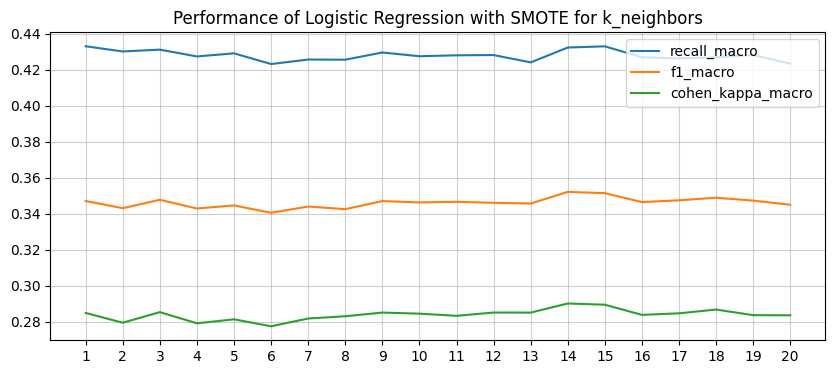

In [ ]:
logreg_smote_results = pd.DataFrame(smote_grid_logreg_no_dupl.cv_results_)

logreg_smote_plot_recall = logreg_smote_results['mean_test_recall_macro']
logreg_smote_plot_f1 = logreg_smote_results['mean_test_f1_macro']
logreg_smote_plot_kappa = logreg_smote_results['mean_test_cohen_kappa']
logreg_smote_plot_neighbors = logreg_smote_results['param_smote__k_neighbors']

plt.figure(figsize=(10,4))
plt.style.use('default')
plt.title('Performance of Logistic Regression with SMOTE for k_neighbors', fontsize=12)
plt.plot(logreg_smote_plot_neighbors, logreg_smote_plot_recall, label='recall_macro')
plt.plot(logreg_smote_plot_neighbors, logreg_smote_plot_f1, label='f1_macro')
plt.plot(logreg_smote_plot_neighbors, logreg_smote_plot_kappa, label='cohen_kappa_macro')
plt.xticks(ticks=np.arange(1, 21, 1))
plt.grid(True, alpha=0.6)
plt.legend(loc='best')
plt.show()

In [ ]:
best_smote_logreg = SMOTE(k_neighbors=smote_grid_logreg_no_dupl.best_params_['smote__k_neighbors'], random_state=73)

In [ ]:
initial_logreg = ImbPipeline([('scaler', PowerTransformer()),
                              ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000, n_jobs=-1))])

undersampled_logreg = ImbPipeline([('scaler', PowerTransformer()),
                                   ('sampler', RandomUnderSampler(random_state=42)),
                                   ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000, n_jobs=-1))])

smoted_logreg = ImbPipeline([('scaler', PowerTransformer()),
                             ('sampler', best_smote_logreg),
                             ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000, n_jobs=-1))])

logreg_pipes = [initial_logreg, undersampled_logreg, smoted_logreg]
logreg_data = {
    'resampler': None,
    'macro recall train' : None,
    'macro recall validation': None,
    'macro f1 train' : None,
    'macro f1 validation': None,
    'Cohens Kappa train' : None,
    'Cohens Kappa validation': None
}

logreg_resample_scores_no_dupl = pd.DataFrame(data=logreg_data, index=np.arange(len(logreg_pipes)))
resamplers = ['No resampling', 'RandomUnderSampler', 'SMOTE']

for index, pipe in enumerate(logreg_pipes):

    pipe.fit(x_train, y_train)
    scores = cross_validate(pipe, x_train, y_train, cv=skf, scoring=scoring, return_train_score=True, n_jobs=-1)

    logreg_resample_scores_no_dupl.loc[index] = [
        list_of_scalers[index],
        scores['train_recall_macro'].mean(),
        scores['test_recall_macro'].mean(),
        scores['train_f1_macro'].mean(),
        scores['test_f1_macro'].mean(),
        scores['train_cohen_kappa'].mean(),
        scores['test_cohen_kappa'].mean()
    ]

c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
display(logreg_resample_scores_no_dupl)

resampler macro recall train macro recall validation macro f1 train  \
0        No scaling           0.319742                0.303586       0.327606   
1      RobustScaler           0.427311                0.415225       0.323745   
2  PowerTransformer           0.465843                0.434674       0.368266   

  macro f1 validation Cohens Kappa train Cohens Kappa validation  
0            0.306038           0.336584                0.320562  
1            0.315243           0.265584                0.258125  
2            0.345238           0.303932                0.281305

Thus, SMOTE turned out to be the best strategy for Logistic Regression.  
But the results are still very disappointing, so, as a last resort, we will use Polynomial features to see if it can significantly improve performance of the model.

Before applying Polynomialfeatures we should first resample the data as it works better on the original feature space where the relationships between features are more straightforward.

First, we try degree=2

In [ ]:
poly2_logreg = ImbPipeline([('scaler', PowerTransformer()),
                           ('sampler', best_smote_logreg),
                           ('poly', PolynomialFeatures(degree=2)),
                           ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=200_000, n_jobs=-1))], 
                           verbose=True)

poly2_logreg.fit(x_train, y_train)

poly_logreg_data = {
    'macro recall train' : None,
    'macro recall validation': None,
    'macro f1 train' : None,
    'macro f1 validation': None,
    'Cohens Kappa train' : None,
    'Cohens Kappa validation': None
}
poly2_logreg_scores_no_dupl = pd.DataFrame(data=poly_logreg_data, index=[0])

poly2_scores = cross_validate(poly2_logreg, x_train, y_train, cv=skf, scoring=scoring, return_train_score=True, n_jobs=-1)

poly2_logreg_scores_no_dupl.loc[0] = [
    poly2_scores['train_recall_macro'].mean(),
    poly2_scores['test_recall_macro'].mean(),
    poly2_scores['train_f1_macro'].mean(),
    poly2_scores['test_f1_macro'].mean(),
    poly2_scores['train_cohen_kappa'].mean(),
    poly2_scores['test_cohen_kappa'].mean()
    ]


[Pipeline] ............ (step 1 of 4) Processing scaler, total=   0.1s
[Pipeline] ........... (step 2 of 4) Processing sampler, total=   0.1s
[Pipeline] .............. (step 3 of 4) Processing poly, total=   0.0s


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[Pipeline] ............ (step 4 of 4) Processing logreg, total= 5.7min


In [ ]:
display(poly2_logreg_scores_no_dupl)

macro recall train macro recall validation macro f1 train  \
0           0.682141                0.484144       0.594635   

  macro f1 validation Cohens Kappa train Cohens Kappa validation  
0            0.433845           0.539948                0.391076

We can alredy observe very strong overfitting, so there is no point to try PolynomialFeatures(degree=3).

We see that recall has improved significantly.  
Thus, we will try to fine-tune it with the best transformer, resampler (which we found earlier) and polynomial transformation over several hyperparameters of Logistic regression to see if we can get even better macro recall.

Here we evaluate Logistic Regression with defferent values of basic hyperparameters to see which ones will do the job better. (Since it takes a lot of time to evaluate GridSearchCV on the data with PolynomialFeatures applied, we will exclude it from the pipeline for now)

In [ ]:
logreg_pipe = ImbPipeline([('scaler', PowerTransformer()),
                           ('sampler', best_smote_logreg),
                           ('logreg', LogisticRegression(max_iter=100_000, n_jobs=-1))])


param_grid_logreg_hyperparams = {'logreg__fit_intercept' : [True, False],
                                 'logreg__multi_class' : ['multinomial', 'ovr'],
                                 'logreg__solver' : ['lbfgs', 'newton-cg', 'sag', 'saga'],
                                 'logreg__penalty' : ['l2', 'l1', 'elasticnet', None]}

logreg_hyperparams_search = GridSearchCV(logreg_pipe, param_grid=param_grid_logreg_hyperparams, cv=skf, scoring=scoring, refit='recall_macro',
                                   return_train_score=True, n_jobs=-1, verbose=3)

logreg_hyperparams_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\natur\AppD

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('scaler', PowerTransformer()),
                                       ('sampler',
                                        SMOTE(k_neighbors=np.int64(1),
                                              random_state=73)),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'logreg__fit_intercept': [True, False],
                         'logreg__multi_class': ['multinomial', 'ovr'],
                         'logreg__penalty': ['l2', 'l1', 'elasticnet', None],
                         'logreg__solver': ['lbfgs', 'newton-cg', 'sag',
                                            'saga']},
             refit='recall_macro', return_train_score=True,
             scoring={'cohen_kappa': make_scorer(cohen_kappa, response_method='predict'),
                      'f1_macro': 'f1_macro', 'recall_macro': 'recall_macro'},
             verbose=3)

In [ ]:
print(logreg_hyperparams_search.best_params_)
print(logreg_hyperparams_search.best_score_)

solver_results_logreg = pd.DataFrame(logreg_hyperparams_search.cv_results_)
display(solver_results_logreg)

{'logreg__fit_intercept': True, 'logreg__multi_class': 'ovr', 'logreg__penalty': 'l2', 'logreg__solver': 'sag'}
0.43509723070839856


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.263523      0.037587         0.022420        0.003268   
1        1.391652      0.163176         0.018539        0.000602   
2        2.045432      0.189532         0.018400        0.002394   
3        3.955931      0.125728         0.017969        0.000381   
4        0.139285      0.008019         0.000000        0.000000   
..            ...           ...              ...             ...   
59       0.335444      0.068560         0.000000        0.000000   
60       1.072608      0.092358         0.018282        0.000769   
61       0.661001      0.025660         0.027071        0.010035   
62       3.289688      0.268334         0.023293        0.013959   
63       5.023951      1.170477         0.015838        0.000760   

    param_logreg__fit_intercept param_logreg__multi_class  \
0                          True               multinomial   
1                          True               multinomial   
2                          True               multinomial   
3                          True               multinomial   
4                          True               multinomial   
..                          ...                       ...   
59                        False                       ovr   
60                        False                       ovr   
61                        False                       ovr   
62                        False                       ovr   
63                        False                       ovr   

   param_logreg__penalty param_logreg__solver  \
0                     l2                lbfgs   
1                     l2            newton-cg   
2                     l2                  sag   
3                     l2                 saga   
4                     l1                lbfgs   
..                   ...                  ...   
59            elasticnet                 saga   
60                  None                lbfgs   
61                  None            newton-cg   
62                  None                  sag   
63                  None                 saga   

                                               params  \
0   {'logreg__fit_intercept': True, 'logreg__multi...   
1   {'logreg__fit_intercept': True, 'logreg__multi...   
2   {'logreg__fit_intercept': True, 'logreg__multi...   
3   {'logreg__fit_intercept': True, 'logreg__multi...   
4   {'logreg__fit_intercept': True, 'logreg__multi...   
..                                                ...   
59  {'logreg__fit_intercept': False, 'logreg__mult...   
60  {'logreg__fit_intercept': False, 'logreg__mult...   
61  {'logreg__fit_intercept': False, 'logreg__mult...   
62  {'logreg__fit_intercept': False, 'logreg__mult...   
63  {'logreg__fit_intercept': False, 'logreg__mult...   

    split0_test_recall_macro  ...  mean_test_cohen_kappa  \
0                   0.410006  ...               0.281141   
1                   0.411552  ...               0.281373   
2                   0.410389  ...               0.281309   
3                   0.410389  ...               0.281305   
4                        NaN  ...                    NaN   
..                       ...  ...                    ...   
59                       NaN  ...                    NaN   
60                  0.412795  ...               0.247507   
61                  0.417185  ...               0.248885   
62                  0.414711  ...               0.248734   
63                  0.414711  ...               0.248734   

    std_test_cohen_kappa  rank_test_cohen_kappa  split0_train_cohen_kappa  \
0               0.021129                      4                  0.311790   
1               0.019977                      1                  0.312975   
2               0.019877                      2                  0.312996   
3               0.019881                      3                  0.313029   
4                    NaN                     37                       NaN 

Now we will try to find the optimal value for C, but we will use initial data (i.e. without polynomialfeatures applied) to save a bit of computational time.

In [ ]:
param_grid_logreg_C = {'logreg__C' : [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]}

logreg_search_C = GridSearchCV(logreg_hyperparams_search.best_estimator_, param_grid=param_grid_logreg_C, cv=skf, scoring=scoring, refit='recall_macro',
                                   return_train_score=True, n_jobs=-1)

logreg_search_C.fit(x_train, y_train)

c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('scaler', PowerTransformer()),
                                       ('sampler',
                                        SMOTE(k_neighbors=np.int64(1),
                                              random_state=73)),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           multi_class='ovr',
                                                           n_jobs=-1,
                                                           solver='sag'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                       0.7, 0.8, 0.9, 1, 5, 8, 9, 10, 15, 20,
                                       25, 30, 35, 40, 45, 50]},
             refit='recall_macro', return_train_score=True,
             scoring={'cohen_kappa': make_scorer(cohen_kappa, response_method='predict'),
                      'f1_macro': 'f1_macro', 'recall_macro': 'recall_macro'})

In [ ]:
print(logreg_search_C.best_params_)
print(logreg_search_C.best_score_)

results_logreg_C = pd.DataFrame(logreg_search_C.cv_results_)
display(results_logreg_C)

{'logreg__C': 0.3}
0.4355863671240188


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.766078      0.170452         0.020061        0.000909   
1        0.865340      0.197732         0.051701        0.063563   
2        0.882444      0.136391         0.016639        0.001086   
3        1.233313      0.294992         0.016556        0.000855   
4        1.833256      0.337550         0.017650        0.000504   
5        2.137776      0.095129         0.018772        0.001613   
6        2.377866      0.423933         0.016623        0.000970   
7        2.916286      0.400399         0.032895        0.020474   
8        3.614046      0.121263         0.016740        0.000393   
9        3.464184      0.537442         0.017341        0.001031   
10       3.895114      0.480489         0.016847        0.001134   
11       4.320755      0.529911         0.017040        0.000569   
12      10.723836      0.642371         0.073132        0.071080   
13      12.940014      0.705646         0.142807        0.069055   
14      13.305969      1.541016         0.098328        0.056262   
15      14.312278      0.735129         0.084041        0.044708   
16      14.886303      3.141670         0.069735        0.030197   
17      14.509321      1.894058         0.114056        0.061501   
18      15.269151      2.277721         0.093424        0.063263   
19      17.980360      3.129319         0.016543        0.001002   
20      18.078545      3.274376         0.017848        0.000822   
21      20.966293      4.022203         0.046996        0.056807   
22      18.647999      1.896462         0.016537        0.000901   
23      10.693917      3.281021         0.020675        0.010379   

    param_logreg__C               params  split0_test_recall_macro  \
0              0.01  {'logreg__C': 0.01}                  0.366520   
1              0.05  {'logreg__C': 0.05}                  0.375653   
2              0.10   {'logreg__C': 0.1}                  0.386074   
3              0.20   {'logreg__C': 0.2}                  0.402157   
4              0.30   {'logreg__C': 0.3}                  0.410946   
5              0.40   {'logreg__C': 0.4}                  0.406745   
6              0.50   {'logreg__C': 0.5}                  0.410327   
7              0.60   {'logreg__C': 0.6}                  0.406252   
8              0.70   {'logreg__C': 0.7}                  0.406655   
9              0.80   {'logreg__C': 0.8}                  0.410103   
10             0.90   {'logreg__C': 0.9}                  0.407777   
11             1.00     {'logreg__C': 1}                  0.409317   
12             5.00     {'logreg__C': 5}                  0.405856   
13             8.00     {'logreg__C': 8}                  0.404699   
14             9.00     {'logreg__C': 9}                  0.404699   
15            10.00    {'logreg__C': 10}                  0.404699   
16            15.00    {'logreg__C': 15}                  0.405424   
17            20.00    {'logreg__C': 20}                  0.405424   
18            25.00    {'logreg__C': 25}                  0.405424   
19            30.00    {'logreg__C': 30}                  0.404261   
20            35.00    {'logreg__C': 35}                  0.404261   
21            40.00    {'logreg__C': 40}                  0.404261   
22            45.00    {'logreg__C': 45}                  0.403098   
23            50.00    {'logreg__C': 50}                  0.403823   

    split1_test_recall_macro  split2_test_recall_macro  \
0                   0.412983                  0.382138   
1                   0.437880                  0.390127   
2                   0.459347                  0.405560   
3                   0.459959                  0.420362   
4                   0.464878                  0.422710   
5                   0.461624                  0.423087   
6                   0.465589                  0.424146   
7                   0.468237                  0.414068   
8                   0.469399  

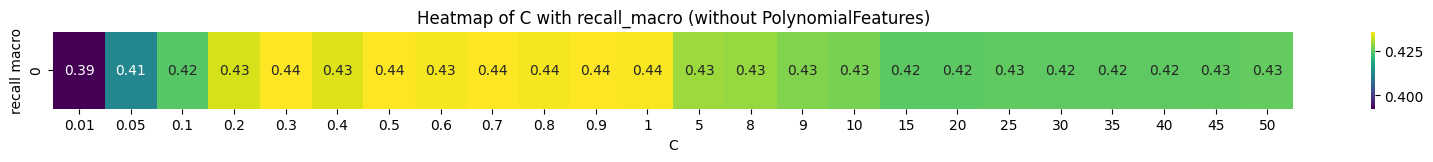

In [ ]:
scores_logreg_c = logreg_search_C.cv_results_['mean_test_recall_macro']
scores_logreg_c = scores_logreg_c.reshape(1, len(param_grid_logreg_C['logreg__C']))

plt.figure(figsize=(20, 1))
sns.heatmap(scores_logreg_c, annot=True, xticklabels=param_grid_logreg_C['logreg__C'], cmap='viridis')
plt.title('Heatmap of C with recall_macro (without PolynomialFeatures)')
plt.xlabel('C')
plt.ylabel('recall macro')
plt.show()

Now we plot the validation curve to see the tendency.

In [ ]:
'''param_range_vc_logreg = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
train_vc_logreg_c, val_vc_logreg_c = validation_curve(logreg_hyperparams_search.best_estimator_, x_train, y_train, param_name="logreg__C",
                                                      param_range=param_range_vc_logreg, cv=skf, scoring="recall_macro", n_jobs=-1)'''

In [ ]:
'''plt.figure(figsize=(10, 5))
plt.title('Validation Curve for Logistic Regression (no PolynomialFeatures)', fontsize=12)
plt.xlabel('gamma')
plt.ylabel('recall Macro')

plt.plot(param_range_vc_logreg, train_vc_logreg_c, label='Training score', color='blue')
plt.plot(param_range_vc_logreg, val_vc_logreg_c, label='Cross-validation score', color='red')
plt.legend(loc='best')
plt.xscale('log')
plt.xticks(ticks=param_range_vc_logreg, labels=param_range_vc_logreg, rotation=60)
plt.ylim(0.495, 0.55)
plt.grid(True, alpha=0.6)
plt.show()'''

Now we will use the data with applied polynomialfeatures to confirm this value.

In [ ]:
'''logreg_pipe = ImbPipeline([('logreg', logreg_hyperparams_search.best_estimator_['logreg'])])

validation_fold = [-1 for _ in range(x_train_pwr_smote_poly.shape[0])] + [0 for _ in range(x_val_pwr_poly.shape[0])]
ps = PredefinedSplit(test_fold=validation_fold)

param_grid_logreg_smote = {'logreg__C' : [0.1, 1, 10, 20]}

logreg_final_search = GridSearchCV(logreg_pipe, param_grid=param_grid_logreg_smote, cv=ps, scoring=scoring, refit='recall_macro',
                                   return_train_score=True, n_jobs=-1)

logreg_final_search.fit(x_combined_processed, y_combined_processed)'''

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           multi_class='multinomial',
                                                           n_jobs=-1,
                                                           penalty='l1',
                                                           solver='saga'))]),
             n_jobs=-1, param_grid={'logreg__C': [0.1, 1, 10, 20]},
             return_train_score=True, scoring='recall_macro')

In [ ]:
'''print('best C:           ', logreg_final_search.best_params_)
print('best recall_macro:', logreg_final_search.best_score_)

results_logreg = pd.DataFrame(logreg_final_search.cv_results_)
display(results_logreg)'''

"print('best C:           ', logreg_final_search.best_params_)\nprint('best recall_macro:', logreg_final_search.best_score_)\n\nresults_logreg = pd.DataFrame(logreg_final_search.cv_results_)\ndisplay(results_logreg)"

Thus, we got the best possible hyperparameters of Logistic regression for our problem.  
Let's now evaluate it on the actual test data. (using PolynomialFeatures with degree=3)

In [ ]:
logreg_hyperparams_search.best_estimator_['logreg'].set_params(C = logreg_search_C.best_params_['logreg__C'])
logreg_best = logreg_hyperparams_search.best_estimator_['logreg']
print(logreg_best)

LogisticRegression(C=0.3, max_iter=100000, multi_class='ovr', n_jobs=-1,
                   solver='sag')


In [ ]:
logreg_pipe_best = ImbPipeline([('scaler', PowerTransformer()),
                                ('sampler', best_smote_logreg),
                                ('poly', PolynomialFeatures(degree=2)),
                                ('logreg', logreg_best)])

logreg_pipe_best.fit(x_train, y_train)

c:\Users\natur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', PowerTransformer()),
                ('sampler', SMOTE(k_neighbors=np.int64(1), random_state=73)),
                ('poly', PolynomialFeatures()),
                ('logreg',
                 LogisticRegression(C=0.3, max_iter=100000, multi_class='ovr',
                                    n_jobs=-1, solver='sag'))])

In [ ]:
y_pred_logreg_train = logreg_pipe_best.predict(x_train)
y_pred_logreg_test = logreg_pipe_best.predict(x_test)

print('Logistic Regression evaluation results on TEST data')
print('recall_macro: ', recall_score(y_test, y_pred_logreg_test, average='macro'))
print('f1_macro: ', f1_score(y_test, y_pred_logreg_test, average='macro'))
print('Cohens Kappa: ', cohen_kappa_score(y_test, y_pred_logreg_test))
print()
print('Logistic Regression evaluation results on TRAIN data')
print('recall_macro: ', recall_score(y_train, y_pred_logreg_train, average='macro'))
print('f1_macro: ', f1_score(y_train, y_pred_logreg_train, average='macro'))
print('Cohens Kappa: ', cohen_kappa_score(y_train, y_pred_logreg_train))

Logistic Regression evaluation results on TEST data
recall_macro:  0.49841768036026945
f1_macro:  0.43118532020952216
Cohens Kappa:  0.3772307521407975

Logistic Regression evaluation results on TRAIN data
recall_macro:  0.6342592995902331
f1_macro:  0.5352992024605631
Cohens Kappa:  0.4804179449095419


Confusion matrix

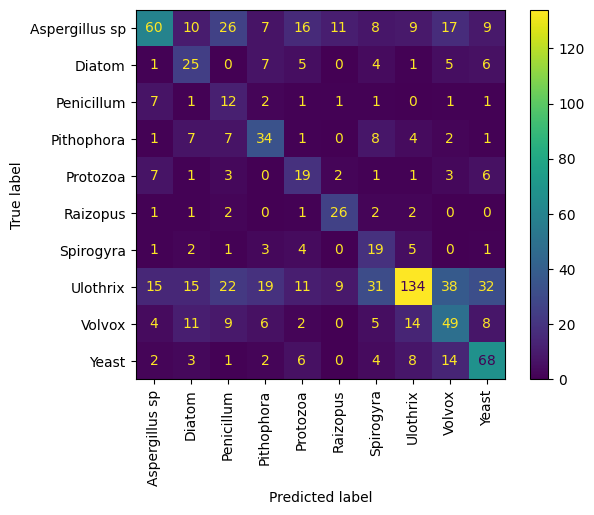

In [ ]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg_pipe_best.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

Lets now determine the most missclassified class.

In [ ]:
misclassifications = np.sum(cm_logreg, axis=1) - np.diag(cm_logreg)
mc_index = np.argmax(misclassifications)
print(logreg_pipe_best.classes_[mc_index])

Ulothrix


Learning curve for Logistic Regression. (We didn't include PolynomialFeatures to save a lot of time. Results for data with it applied will look approximately the same)

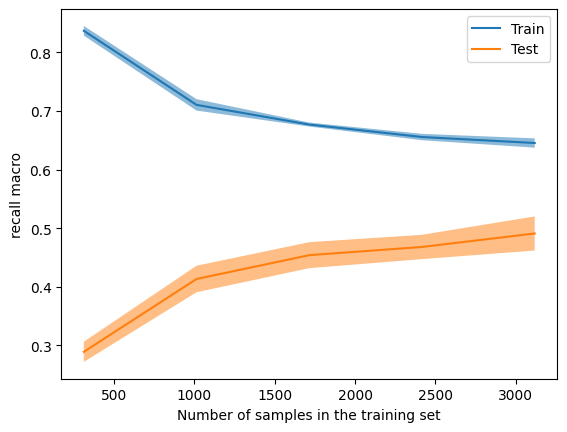

In [ ]:
learning_curve_logreg = LearningCurveDisplay.from_estimator(logreg_pipe_best, x_train, y_train, cv=skf, scoring='recall_macro', n_jobs=-1,
                                              random_state=73, score_name='recall macro', score_type='both', std_display_style='fill_between')

### SVC

In [ ]:
from sklearn.svm import SVC

We start with baseline model.

In [ ]:
scalers_svc = [StandardScaler(),
               RobustScaler(),
               PowerTransformer(method='yeo-johnson'),
               QuantileTransformer(output_distribution='uniform'),
               QuantileTransformer(output_distribution='normal')
               ]

x_train_scaled_svc = [x_train, ]
x_test_scaled_svc = [x_test, ]

for scaler in scalers_svc:
    x_train_scaled_svc.append(pd.DataFrame(scaler.fit_transform(x_train)))
    x_test_scaled_svc.append(pd.DataFrame(scaler.transform(x_test)))

list_of_scalers_svc = [
    'No scaling',
    'StandardScaler',
    'RobustScaler',
    'PowerTransformer',
    'QuantileTransformer (uniform)',
    'QuantileTransformer (normal)'
    ]

data_scalers = {
    'Scaler': None,
    'macro recall train': None,
    'macro recall validation': None,
    'macro f1 train': None,
    'macro f1 validation': None,
    'Cohens Kappa train': None,
    'Cohens Kappa validation': None,
}

In [ ]:
svc_quick_scores = pd.DataFrame(data=data_scalers, index=np.arange(len(list_of_scalers_svc)))

for count, x_train_scale in enumerate(x_train_scaled_svc):

    svc_base = SVC()
    svc_base.fit(x_train_scale, y_train)

    scores = cross_validate(svc_base, x_train_scale, y_train, cv=skf, scoring=scoring, return_train_score=True, n_jobs=-1)

    svc_quick_scores.loc[count] = [
        list_of_scalers_svc[count],
        scores['train_recall_macro'].mean(),
        scores['test_recall_macro'].mean(),
        scores['train_f1_macro'].mean(),
        scores['test_f1_macro'].mean(),
        scores['train_cohen_kappa'].mean(),
        scores['test_cohen_kappa'].mean()
        ]

In [ ]:
display(svc_quick_scores)

Scaler macro recall train macro recall validation  \
0                     No scaling           0.170249                0.160509   
1                 StandardScaler           0.295862                0.247129   
2                   RobustScaler            0.22916                0.205139   
3               PowerTransformer           0.340045                0.297844   
4  QuantileTransformer (uniform)           0.307998                0.271407   
5   QuantileTransformer (normal)           0.333137                0.291174   

  macro f1 train macro f1 validation Cohens Kappa train  \
0       0.153138            0.140178           0.185591   
1       0.316543            0.253552           0.362599   
2       0.233199            0.197163            0.27899   
3       0.353878            0.304481           0.395149   
4       0.315622            0.275097           0.371659   
5       0.345097            0.294411           0.382234   

  Cohens Kappa validation  
0                0.162514  
1                 0.29142  
2                 0.24664  
3                0.331849  
4                0.315024  
5                0.318996

QuantileTransformer (uniform) has proven to be the best option for SVC.

Now we will see if resampling affects the performance of the baseline model.  
Again, we first evaluate the optimal number of k_neighbors for SMOTE.

In [ ]:
smote_pipe_svc = ImbPipeline([
    ('smote', SMOTE(random_state=73)),
    ('scaler', QuantileTransformer(output_distribution='uniform')),
    ('svc', SVC())
])

param_grid_svc = {'smote__k_neighbors': np.arange(1, 21, 1)} # from 1 to 20 (incl.)
smote_grid_svc = GridSearchCV(smote_pipe_svc, param_grid=param_grid_svc, scoring=scoring, refit='recall_macro', cv=skf, n_jobs=-1, verbose=1)

smote_grid_svc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=73)),
                                       ('scaler', QuantileTransformer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'smote__k_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             refit='recall_macro',
             scoring={'cohen_kappa': make_scorer(cohen_kappa, response_method='predict'),
                      'f1_macro': 'f1_macro', 'recall_macro': 'recall_macro'},
             verbose=1)

In [ ]:
print('best parameters: ', smote_grid_svc.best_params_)
print('best recall_macro: ', smote_grid_svc.best_score_)

best parameters:  {'smote__k_neighbors': np.int64(1)}
best recall_macro:  0.47382261540583287


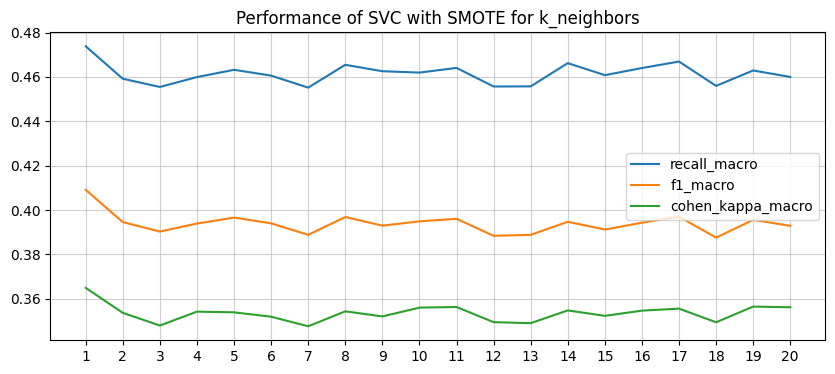

In [ ]:
svc_smote_results = pd.DataFrame(smote_grid_svc.cv_results_)

svc_smote_plot_recall = svc_smote_results['mean_test_recall_macro']
svc_smote_plot_f1 = svc_smote_results['mean_test_f1_macro']
svc_smote_plot_kappa = svc_smote_results['mean_test_cohen_kappa']
svc_smote_plot_neighbors = svc_smote_results['param_smote__k_neighbors']

plt.figure(figsize=(10,4))
plt.style.use('default')
plt.title('Performance of SVC with SMOTE for k_neighbors', fontsize=12)
plt.plot(svc_smote_plot_neighbors, svc_smote_plot_recall, label='recall_macro')
plt.plot(svc_smote_plot_neighbors, svc_smote_plot_f1, label='f1_macro')
plt.plot(svc_smote_plot_neighbors, svc_smote_plot_kappa, label='cohen_kappa_macro')
plt.xticks(ticks=np.arange(1, 21, 1))
plt.grid(True, alpha=0.6)
plt.legend(loc='best')
plt.show()

In [ ]:
best_smote_svc = SMOTE(k_neighbors=smote_grid_svc.best_params_['smote__k_neighbors'], random_state=73)

Now we iteratively evaluate the model on resampled data.

In [ ]:
initial_svc = ImbPipeline([('scaler', PowerTransformer()),
                           ('svc', SVC())])

undersampled_svc = ImbPipeline([('scaler', PowerTransformer()),
                                ('sampler', RandomUnderSampler(random_state=73)),
                                ('svc', SVC())])

smoted_svc = ImbPipeline([('scaler', PowerTransformer()),
                          ('sampler', best_smote_svc),
                          ('svc', SVC())])

balanced_svc = ImbPipeline([('scaler', PowerTransformer()),
                           ('svc', SVC(class_weight='balanced'))])

svc_pipes = [initial_svc, undersampled_svc, smoted_svc, balanced_svc]

svc_data = {
    'resampler': None,
    'macro recall train': None,
    'macro recall validation': None,
    'macro f1 train': None,
    'macro f1 validation': None,
    'Cohens Kappa train': None,
    'Cohens Kappa validation': None,
}

svc_resample_scores_no_dupl = pd.DataFrame(data=logreg_data, index=np.arange(len(svc_pipes)))
resamplers = ['No resampling', 'RandomUnderSampler', 'SMOTE', 'balanced']

for index, pipe in enumerate(svc_pipes):

    pipe.fit(x_train, y_train)
    scores = cross_validate(pipe, x_train, y_train, cv=skf, scoring=scoring, return_train_score=True, n_jobs=-1)

    svc_resample_scores_no_dupl.loc[index] = [
        list_of_scalers[index],
        scores['train_recall_macro'].mean(),
        scores['test_recall_macro'].mean(),
        scores['train_f1_macro'].mean(),
        scores['test_f1_macro'].mean(),
        scores['train_cohen_kappa'].mean(),
        scores['test_cohen_kappa'].mean()
    ]

In [ ]:
display(svc_resample_scores_no_dupl)

resampler macro recall train macro recall validation  \
0                      No scaling           0.340009                0.297293   
1                    RobustScaler           0.453391                 0.39825   
2                PowerTransformer            0.67319                0.479628   
3  QuantileTransformer (Gaussian)           0.577483                0.452279   

  macro f1 train macro f1 validation Cohens Kappa train  \
0       0.353586            0.303668           0.395351   
1       0.349382            0.309844           0.280869   
2        0.56372            0.413655           0.506301   
3       0.453835            0.365993           0.392378   

  Cohens Kappa validation  
0                0.332161  
1                0.240564  
2                0.361149  
3                0.307117

Finally, we fine-tune the svc.  
One of the most important hyperparameters is kernel.

In [ ]:
svc_pipe_kernel = ImbPipeline([('scaler', PowerTransformer()),
                              ('sampler', best_smote_svc),
                              ('svc', SVC(degree=2))])

param_grid_svc_kernel = {'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                         'svc__decision_function_shape' : ['ovo', 'ovr']}

svc_grid_kernel = GridSearchCV(svc_pipe_kernel, param_grid=param_grid_svc_kernel, cv=skf, scoring=scoring, refit='recall_macro', return_train_score=True, n_jobs=-1, verbose=1)

svc_grid_kernel.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('scaler', PowerTransformer()),
                                       ('sampler',
                                        SMOTE(k_neighbors=np.int64(1),
                                              random_state=73)),
                                       ('svc', SVC(degree=2))]),
             n_jobs=-1,
             param_grid={'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='recall_macro', return_train_score=True,
             scoring={'cohen_kappa': make_scorer(cohen_kappa, response_method='predict'),
                      'f1_macro': 'f1_macro', 'recall_macro': 'recall_macro'},
             verbose=1)

In [ ]:
print('best parameters: ', svc_grid_kernel.best_params_)
print('best recall macro: ', svc_grid_kernel.best_score_)

results_svc = pd.DataFrame(svc_grid_kernel.cv_results_)
display(results_svc)

best parameters:  {'svc__decision_function_shape': 'ovo', 'svc__kernel': 'rbf'}
best recall macro:  0.47962772187886565


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.940390      0.409474         0.261109        0.013120   
1       5.488237      0.289014         0.300476        0.010046   
2       4.624545      0.243432         0.955535        0.029328   
3       5.294886      0.328595         0.440758        0.026355   
4       6.983364      0.336618         0.267235        0.005392   
5       4.977229      0.076054         0.288938        0.007929   
6       4.454859      0.070172         0.947697        0.037226   
7       4.793966      0.207585         0.337650        0.035375   

  param_svc__decision_function_shape param_svc__kernel  \
0                                ovo            linear   
1                                ovo              poly   
2                                ovo               rbf   
3                                ovo           sigmoid   
4                                ovr            linear   
5                                ovr              poly   
6                                ovr               rbf   
7                                ovr           sigmoid   

                                              params  \
0  {'svc__decision_function_shape': 'ovo', 'svc__...   
1  {'svc__decision_function_shape': 'ovo', 'svc__...   
2  {'svc__decision_function_shape': 'ovo', 'svc__...   
3  {'svc__decision_function_shape': 'ovo', 'svc__...   
4  {'svc__decision_function_shape': 'ovr', 'svc__...   
5  {'svc__decision_function_shape': 'ovr', 'svc__...   
6  {'svc__decision_function_shape': 'ovr', 'svc__...   
7  {'svc__decision_function_shape': 'ovr', 'svc__...   

   split0_test_recall_macro  split1_test_recall_macro  \
0                  0.411339                  0.494144   
1                  0.387270                  0.411057   
2                  0.441636                  0.545580   
3                  0.200111                  0.174175   
4                  0.411339                  0.494144   
5                  0.387270                  0.411057   
6                  0.441636                  0.545580   
7                  0.200111                  0.174175   

   split2_test_recall_macro  ...  mean_test_cohen_kappa  std_test_cohen_kappa  \
0                  0.433535  ...               0.301734              0.027989   
1                  0.376765  ...               0.266041              0.013334   
2                  0.470042  ...               0.361149              0.023645   
3                  0.162221  ...               0.066301              0.006673   
4                  0.433535  ...               0.301734              0.027989   
5                  0.376765  ...               0.266041              0.013334   
6                  0.470042  ...               0.361149              0.023645   
7                  0.162221  ...               0.066301              0.006673   

   rank_test_cohen_kappa  split0_train_cohen_kappa  split1_train_cohen_kappa  \
0                      3                  0.335348                  0.335384   
1                      5                  0.332709                  0.341676   
2                      1                  0.502840                  0.502942   
3                      7                  0.061892                  0.061688   
4                      3                  0.335348                  0.335384   
5                      5                  0.332709                  0.341676   
6                      1                  0.502840                  0.502942   
7                      7                  0.061892                  0.061688   

   split2_train_cohen_kappa  split3_train_cohen_kappa  \
0                  0.348994                  0.328828   
1                  0.341201                  0.334948   
2                  0.512463                  0.512194   
3                  0.067639                  0.064270   
4                  0.348994                  0.328828   
5                  0.341201                  0.334948   
6      

With the best kernel evaluated, we proceed to search for another hyperparameters, that can significantly affect model's performance.  
(Remark: the choice of values for hyperparameters is not random. We extracted these values from a much bigger GridSearchCV)

In [ ]:
svc_pipe_hyper = ImbPipeline([('scaler', PowerTransformer()),
                              ('sampler', best_smote_svc),
                              ('svc', SVC(kernel='rbf', decision_function_shape='ovo'))])

param_grid_svc_gamma_c = {'svc__C' : np.arange(1, 31, 1),
                          'svc__gamma' : [0.01, 0.1, 1]}

svc_grid_hyper = GridSearchCV(svc_pipe_hyper, param_grid=param_grid_svc_gamma_c, cv=skf, scoring=scoring, refit='recall_macro', return_train_score=True, n_jobs=-1, verbose=1)

svc_grid_hyper.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('scaler', PowerTransformer()),
                                       ('sampler',
                                        SMOTE(k_neighbors=np.int64(1),
                                              random_state=73)),
                                       ('svc',
                                        SVC(decision_function_shape='ovo'))]),
             n_jobs=-1,
             param_grid={'svc__C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'svc__gamma': [0.01, 0.1, 1]},
             refit='recall_macro', return_train_score=True,
             scoring={'cohen_kappa': make_scorer(cohen_kappa, response_method='predict'),
                      'f1_macro': 'f1_macro', 'recall_macro': 'recall_macro'},
             verbose=1)

In [ ]:
print('best parameters: ', svc_grid_hyper.best_params_)
print('best recall_macro: ', svc_grid_hyper.best_score_)

results_svc_gamma_c = pd.DataFrame(svc_grid_hyper.cv_results_)
display(results_svc_gamma_c)

best parameters:  {'svc__C': np.int64(27), 'svc__gamma': 0.01}
best recall_macro:  0.5053270079351627


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        5.632592      0.111810         1.065073        0.024736   
1        3.896183      0.175306         0.848830        0.034764   
2        7.449897      0.264709         0.699241        0.076886   
3        5.177299      0.140792         1.038143        0.018805   
4        3.478968      0.114667         0.778297        0.032819   
..            ...           ...              ...             ...   
85       3.273780      0.089656         0.509374        0.018189   
86       7.218114      0.143364         0.546916        0.016861   
87       4.441613      0.160651         0.852357        0.038658   
88       3.176902      0.085322         0.470296        0.033303   
89       5.761709      0.098061         0.371773        0.005896   

    param_svc__C  param_svc__gamma                              params  \
0              1              0.01   {'svc__C': 1, 'svc__gamma': 0.01}   
1              1              0.10    {'svc__C': 1, 'svc__gamma': 0.1}   
2              1              1.00      {'svc__C': 1, 'svc__gamma': 1}   
3              2              0.01   {'svc__C': 2, 'svc__gamma': 0.01}   
4              2              0.10    {'svc__C': 2, 'svc__gamma': 0.1}   
..           ...               ...                                 ...   
85            29              0.10   {'svc__C': 29, 'svc__gamma': 0.1}   
86            29              1.00     {'svc__C': 29, 'svc__gamma': 1}   
87            30              0.01  {'svc__C': 30, 'svc__gamma': 0.01}   
88            30              0.10   {'svc__C': 30, 'svc__gamma': 0.1}   
89            30              1.00     {'svc__C': 30, 'svc__gamma': 1}   

    split0_test_recall_macro  split1_test_recall_macro  \
0                   0.398419                  0.485095   
1                   0.441725                  0.521673   
2                   0.234302                  0.244963   
3                   0.423131                  0.513863   
4                   0.438395                  0.525272   
..                       ...                       ...   
85                  0.419323                  0.473911   
86                  0.246408                  0.246390   
87                  0.457013                  0.570305   
88                  0.419323                  0.473131   
89                  0.246408                  0.246390   

    split2_test_recall_macro  ...  mean_test_cohen_kappa  \
0                   0.450568  ...               0.292865   
1                   0.461442  ...               0.400780   
2                   0.247199  ...               0.216600   
3                   0.462836  ...               0.316430   
4                   0.459790  ...               0.412924   
..                       ...  ...                    ...   
85                  0.452643  ...               0.437743   
86                  0.260502  ...               0.236121   
87                  0.484558  ...               0.400238   
88                  0.452643  ...               0.437930   
89                  0.260502  ...               0.236121   

    std_test_cohen_kappa  rank_test_cohen_kappa  split0_train_cohen_kappa  \
0               0.027405                     60                  0.343260   
1               0.024721                     30                  0.678063   
2               0.014330                     90                  0.992568   
3               0.024591                     59                  0.383494   
4               0.027837                     29                  0.773267   
..                   ...                    ...                       ...   
85              0.012020                      6                  0.984383   
86              0.012063                     87                  0.999217   
87              0.018912                     31                  0.556011   
88              0.011661                      4                  0.985162   
89              0.012063         

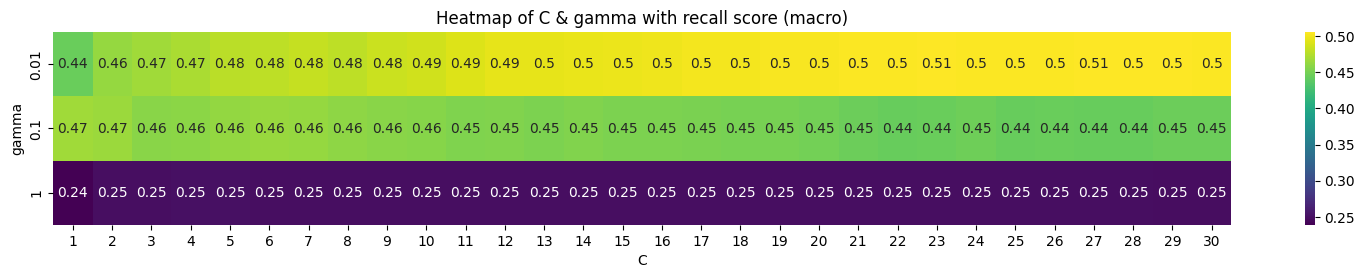

In [ ]:
scores_svc_grid = svc_grid_hyper.cv_results_['mean_test_recall_macro']
scores_svc_grid = scores_svc_grid.reshape(len(param_grid_svc_gamma_c['svc__C']), len(param_grid_svc_gamma_c['svc__gamma'])).T

plt.figure(figsize=(19, 2.5))
sns.heatmap(scores_svc_grid, annot=True, xticklabels=param_grid_svc_gamma_c['svc__C'], yticklabels=param_grid_svc_gamma_c['svc__gamma'], cmap='viridis')
plt.title('Heatmap of C & gamma with recall score (macro)')
plt.xlabel('C')
plt.ylabel('gamma')
plt.show()

We see that gamma between 0.1 and 1.0 gives us (relatively) good results.

In [ ]:
print(svc_grid_hyper.best_estimator_)

Pipeline(steps=[('scaler', PowerTransformer()),
                ('sampler', SMOTE(k_neighbors=np.int64(1), random_state=73)),
                ('svc',
                 SVC(C=np.int64(27), decision_function_shape='ovo',
                     gamma=0.01))])


Thus, we evaluate the SVC with best found preprocessing methods and hyperparameters on the actual test data.

In [ ]:
svc_grid_hyper.best_estimator_['svc'].set_params(C = 29)
svc_best = svc_grid_hyper.best_estimator_
svc_best.fit(x_train, y_train)

Pipeline(steps=[('scaler', PowerTransformer()),
                ('sampler', SMOTE(k_neighbors=np.int64(1), random_state=73)),
                ('svc', SVC(C=29, decision_function_shape='ovo', gamma=0.01))])

In [ ]:
y_pred_svc_test = svc_best.predict(x_test)
y_pred_svc_train = svc_best.predict(x_train)

print('evaluation results on TRAIN data')
print('recall_macro: ', recall_score(y_train, y_pred_svc_train, average='macro'))
print('f1_macro: ', f1_score(y_train, y_pred_svc_train, average='macro'))
print('Cohens Kappa: ', cohen_kappa_score(y_train, y_pred_svc_train))
print()
print('evaluation results on TEST data')
print('recall_macro: ', recall_score(y_test, y_pred_svc_test, average='macro'))
print('f1_macro: ', f1_score(y_test, y_pred_svc_test, average='macro'))
print('Cohens Kappa: ', cohen_kappa_score(y_test, y_pred_svc_test))

evaluation results on TRAIN data
recall_macro:  0.695973116409777
f1_macro:  0.5964840594958833
Cohens Kappa:  0.5414123865351219

evaluation results on TEST data
recall_macro:  0.497604478421141
f1_macro:  0.44130396873190963
Cohens Kappa:  0.38749968165264115


In comparison to data with duplicates, SVC gives us very strong overfitting.

Learning Curve SVC

Finally, we will see how different amount of training data affects evaluation results.

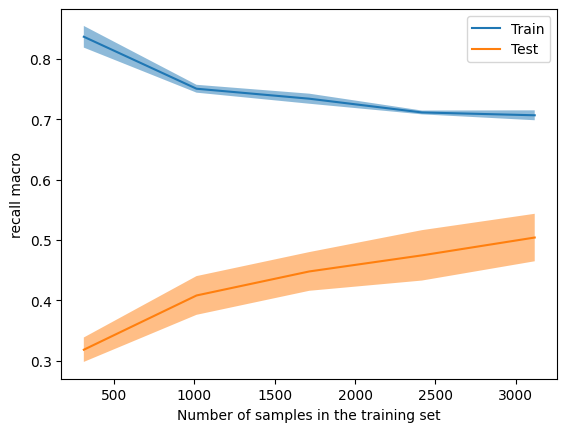

In [ ]:
learning_curve_svc = LearningCurveDisplay.from_estimator(svc_best, x_train, y_train, cv=skf, scoring='recall_macro', n_jobs=-1,
                                              random_state=73, score_name='recall macro', score_type='both', std_display_style='fill_between')

We can observe that there is not enough training data for this model.

Confusion matrix

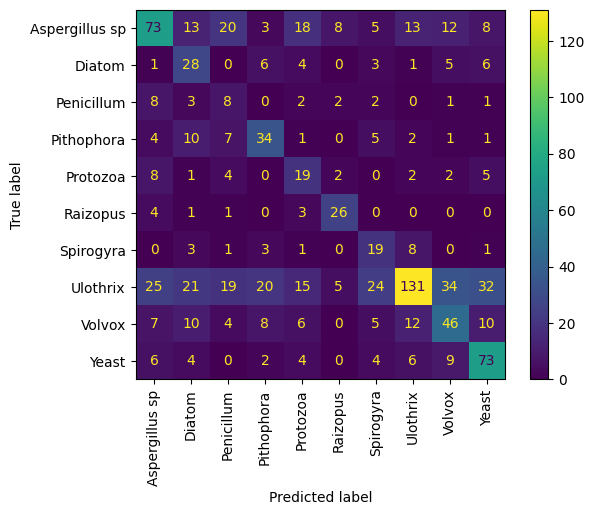

In [ ]:
cm_svc = confusion_matrix(y_test, y_pred_svc_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_best.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

### MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
scalers_mlp = [StandardScaler(),
               RobustScaler(),
               PowerTransformer(method='yeo-johnson'),
               QuantileTransformer(output_distribution='uniform'),
               QuantileTransformer(output_distribution='normal')
               ]

list_of_scalers_mlp = [
    'No scaling',
    'StandardScaler',
    'RobustScaler',
    'PowerTransformer',
    'QuantileTransformer (uniform)',
    'QuantileTransformer (normal)'
    ]

x_train_scaled_mlp = [x_train, ]
x_test_scaled_mlp = [x_test, ]

for scaler in scalers_mlp:
    x_train_scaled_mlp.append(pd.DataFrame(scaler.fit_transform(x_train)))
    x_test_scaled_mlp.append(pd.DataFrame(scaler.transform(x_test)))

In [ ]:
mlp_quick_scores_no_dupl = pd.DataFrame(data=data_scalers, index=np.arange(len(list_of_scalers_mlp)))

for count, x_train_scale in enumerate(x_train_scaled_mlp):

    mlp_base = MLPClassifier(max_iter=10_000)
    mlp_base.fit(x_train_scale, y_train)

    scores = cross_validate(mlp_base, x_train_scale, y_train, cv=skf, scoring=scoring, return_train_score=True, n_jobs=-1)

    mlp_quick_scores_no_dupl.loc[count] = [
        list_of_scalers_mlp[count],
        scores['train_recall_macro'].mean(),
        scores['test_recall_macro'].mean(),
        scores['train_f1_macro'].mean(),
        scores['test_f1_macro'].mean(),
        scores['train_cohen_kappa'].mean(),
        scores['test_cohen_kappa'].mean()
    ]

In [ ]:
display(mlp_quick_scores_no_dupl)

Scaler macro recall train macro recall validation  \
0                     No scaling           0.434366                0.336455   
1                 StandardScaler           0.668466                0.415859   
2                   RobustScaler           0.672759                0.434307   
3               PowerTransformer           0.671825                0.432753   
4  QuantileTransformer (uniform)           0.470274                0.385051   
5   QuantileTransformer (normal)           0.667217                0.414288   

  macro f1 train macro f1 validation Cohens Kappa train  \
0       0.463369            0.346882           0.464143   
1        0.69809            0.424319           0.689883   
2        0.70105             0.44743           0.693449   
3       0.697901            0.446012           0.685771   
4       0.490358            0.395377           0.491458   
5       0.693344            0.423194           0.683691   

  Cohens Kappa validation  
0                 0.35853  
1                0.413311  
2                0.435884  
3                0.424768  
4                0.396236  
5                 0.41222

We add RobustScaler() to pipeline.  
We already got decent results (for a base model).  
Thus, we proceed to tweak other steps in pipeline, starting with resampling.  

But first, we need to find optimal k_neighbors for SMOTE specifically for mlp.

In [ ]:
smote_pipe_mlp = ImbPipeline([
    ('smote', SMOTE(random_state=73)),
    ('scaler', RobustScaler()),
    ('mlp', MLPClassifier(max_iter=10_000))
])

param_grid_mlp = {'smote__k_neighbors': np.arange(1, 21, 1)}
smote_grid_mlp = GridSearchCV(smote_pipe_mlp, param_grid=param_grid_mlp, scoring=scoring, refit='recall_macro', cv=skf, n_jobs=-1)

smote_grid_mlp.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=73)),
                                       ('scaler', RobustScaler()),
                                       ('mlp', MLPClassifier(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'smote__k_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             refit='recall_macro',
             scoring={'cohen_kappa': make_scorer(cohen_kappa, response_method='predict'),
                      'f1_macro': 'f1_macro', 'recall_macro': 'recall_macro'})

In [ ]:
print('best parameters: ', smote_grid_mlp.best_params_)
print('best recall_macro: ', smote_grid_mlp.best_score_)

best parameters:  {'smote__k_neighbors': np.int64(6)}
best recall_macro:  0.4721073686533749


In [ ]:
best_smote_mlp = SMOTE(k_neighbors=smote_grid_mlp.best_params_['smote__k_neighbors'])

In [ ]:
initial_mlp = ImbPipeline([('scaler', RobustScaler()),
                           ('mlp', MLPClassifier(max_iter=10_000))])

undersampled_mlp = ImbPipeline([('scaler', RobustScaler()),
                                ('sampler', RandomUnderSampler()),
                                ('mlp', MLPClassifier(max_iter=10_000))])

smoted_mlp = ImbPipeline([('scaler', RobustScaler()),
                          ('sampler', best_smote_mlp),
                          ('mlp', MLPClassifier(max_iter=10_000))])

mlp_data = {
    'resampler': None,
    'macro recall train': None,
    'macro recall validation': None,
    'macro f1 train': None,
    'macro f1 validation': None,
    'Cohens Kappa train': None,
    'Cohens Kappa validation': None,
}

mlp_pipes = [initial_mlp, undersampled_mlp, smoted_mlp]

mlp_resample_scores = pd.DataFrame(data=mlp_data, index=np.arange(len(mlp_pipes)))
resamplers = ['No resampling', 'RandomUnderSampler', 'SMOTE']

for index, pipe in enumerate(mlp_pipes):

    pipe.fit(x_train, y_train)
    scores = cross_validate(pipe, x_train, y_train, cv=skf, scoring=scoring, return_train_score=True, n_jobs=-1)

    mlp_resample_scores.loc[index] = [
        list_of_scalers[index],
        scores['train_recall_macro'].mean(),
        scores['test_recall_macro'].mean(),
        scores['train_f1_macro'].mean(),
        scores['test_f1_macro'].mean(),
        scores['train_cohen_kappa'].mean(),
        scores['test_cohen_kappa'].mean()
        ]

In [ ]:
display(mlp_resample_scores)

resampler macro recall train macro recall validation macro f1 train  \
0        No scaling           0.674432                0.428164       0.704969   
1      RobustScaler            0.67421                0.445326       0.534002   
2  PowerTransformer           0.843969                0.467264       0.780826   

  macro f1 validation Cohens Kappa train Cohens Kappa validation  
0            0.438731           0.692909                0.428121  
1            0.367498           0.458259                0.297312  
2            0.438593           0.721565                0.402938

With all optimal preprocessing steps found, we proceed with fine-tuning.  
First, we need to make an overfitting model. Then apply several techniques to reduce overfitting.

For now, we set alpha=0.

In [ ]:
mlp_pipe_final = ImbPipeline([('scaler', RobustScaler()),
                              ('sampler', best_smote_svc),
                              ('mlp', MLPClassifier(hidden_layer_sizes=(100, 60, 45), solver='adam',
                                                    learning_rate_init=0.001, tol=0.00001, alpha=0, n_iter_no_change=20, max_iter=100_000, verbose=1))])

mlp_pipe_final.fit(x_train, y_train)

Iteration 1, loss = 2.11640939
Iteration 2, loss = 1.74578577
Iteration 3, loss = 1.55975342
Iteration 4, loss = 1.42518972
Iteration 5, loss = 1.31272098
Iteration 6, loss = 1.23188536
Iteration 7, loss = 1.16407639
Iteration 8, loss = 1.10891818
Iteration 9, loss = 1.06346254
Iteration 10, loss = 1.01957903
Iteration 11, loss = 0.98240647
Iteration 12, loss = 0.95975958
Iteration 13, loss = 0.92647195
Iteration 14, loss = 0.89163012
Iteration 15, loss = 0.86650994
Iteration 16, loss = 0.83987973
Iteration 17, loss = 0.82184144
Iteration 18, loss = 0.80010588
Iteration 19, loss = 0.78439879
Iteration 20, loss = 0.76339771
Iteration 21, loss = 0.73941256
Iteration 22, loss = 0.71857004
Iteration 23, loss = 0.70653725
Iteration 24, loss = 0.69031027
Iteration 25, loss = 0.67075373
Iteration 26, loss = 0.66470479
Iteration 27, loss = 0.64236895
Iteration 28, loss = 0.62840614
Iteration 29, loss = 0.61373936
Iteration 30, loss = 0.60677097
Iteration 31, loss = 0.58691817
Iteration 32, los

Pipeline(steps=[('scaler', RobustScaler()),
                ('sampler', SMOTE(k_neighbors=np.int64(1), random_state=73)),
                ('mlp',
                 MLPClassifier(alpha=0, hidden_layer_sizes=(100, 60, 45),
                               max_iter=100000, n_iter_no_change=20, tol=1e-05,
                               verbose=1))])

In [ ]:
mlp_train_predictions = mlp_pipe_final.predict(x_train)
mlp_val_predictions = mlp_pipe_final.predict(x_test)

print("Training   recall:", recall_score(y_train, mlp_train_predictions, average='macro'))
print("Validation recall:", recall_score(y_test, mlp_val_predictions, average='macro'))

Training   recall: 0.9913241113369612
Validation recall: 0.46381017275081626


In [ ]:
rbscaler = RobustScaler()
x_train_robust = rbscaler.fit_transform(x_train)
x_val_robust = rbscaler.transform(x_test)

In [ ]:
train_losses = []
val_losses = []
train_acc = []
val_acc = []

mlp_partial_fit = MLPClassifier(hidden_layer_sizes=(100, 60, 45), solver='adam',
                                learning_rate_init=0.001, tol=0.00001, alpha=0, n_iter_no_change=20,
                                max_iter=100_000, verbose=1, warm_start=True)

for i in range(250):
  mlp_partial_fit.partial_fit(x_train_robust, y_train, classes=np.unique(y_train))

  train_proba = mlp_partial_fit.predict_proba(x_train_robust)
  train_losses.append(log_loss(y_train, train_proba))

  val_proba = mlp_partial_fit.predict_proba(x_val_robust)
  val_losses.append(log_loss(y_test, val_proba))

  train_acc.append(recall_score(y_train, mlp_partial_fit.predict(x_train_robust), average='macro'))
  val_acc.append(recall_score(y_test, mlp_partial_fit.predict(x_val_robust), average='macro'))

Iteration 1, loss = 2.05484172
Iteration 1, loss = 1.88222346
Iteration 1, loss = 1.77413081
Iteration 1, loss = 1.68338877
Iteration 1, loss = 1.61882794
Iteration 1, loss = 1.56598873
Iteration 1, loss = 1.52259797
Iteration 1, loss = 1.48541778
Iteration 1, loss = 1.47075857
Iteration 1, loss = 1.44007026
Iteration 1, loss = 1.41927376
Iteration 1, loss = 1.39570458
Iteration 1, loss = 1.38193391
Iteration 1, loss = 1.36550485
Iteration 1, loss = 1.34916742
Iteration 1, loss = 1.32972057
Iteration 1, loss = 1.31463081
Iteration 1, loss = 1.30402678
Iteration 1, loss = 1.28914470
Iteration 1, loss = 1.28183883
Iteration 1, loss = 1.27786383
Iteration 1, loss = 1.26847952
Iteration 1, loss = 1.25285866
Iteration 1, loss = 1.24210016
Iteration 1, loss = 1.23407688
Iteration 1, loss = 1.22154817
Iteration 1, loss = 1.21600271
Iteration 1, loss = 1.20548199
Iteration 1, loss = 1.19209409
Iteration 1, loss = 1.19300958
Iteration 1, loss = 1.18397659
Iteration 1, loss = 1.18652219
Iteratio

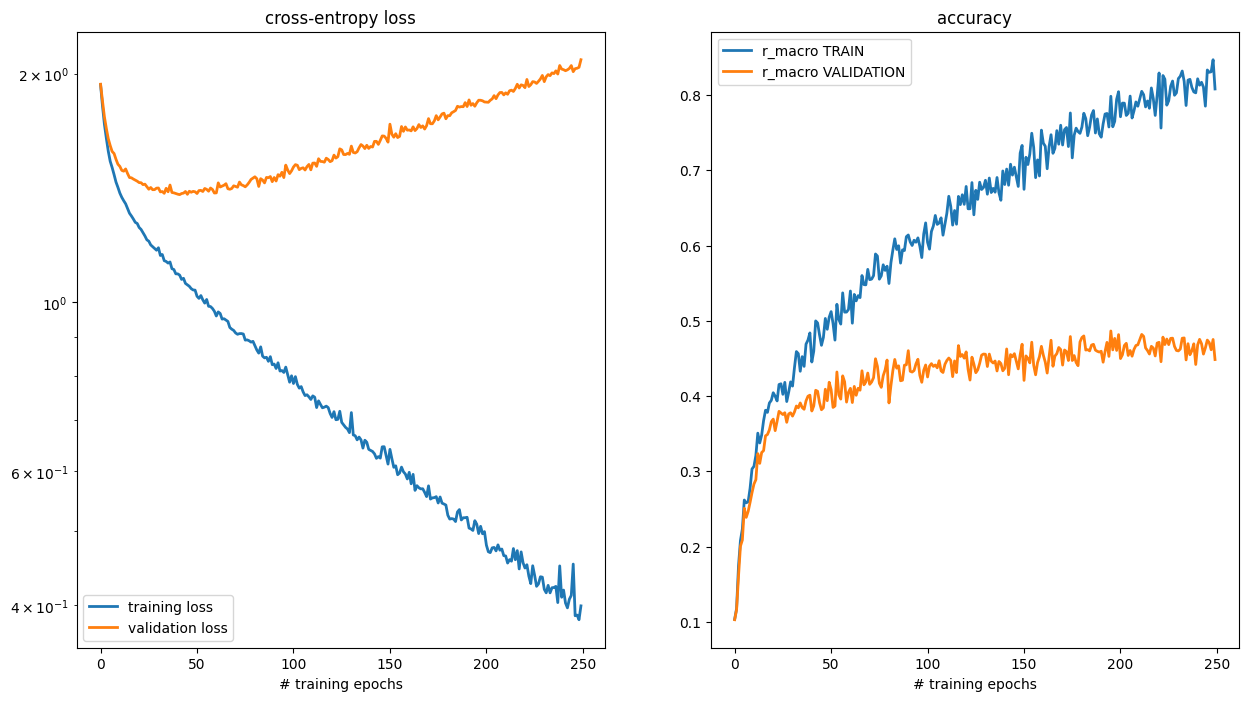

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 8))
axes[0].set_title("cross-entropy loss")
axes[0].plot(train_losses, label="training loss", lw=2)
axes[0].plot(val_losses, label="validation loss", lw=2)
axes[0].legend()
axes[0].set_yscale('log')

axes[1].set_title("accuracy")
axes[1].plot(train_acc, label="r_macro TRAIN", lw=2)
axes[1].plot(val_acc, label="r_macro VALIDATION", lw=2)
axes[1].legend()

axes[0].set_xlabel("# training epochs")
axes[1].set_xlabel("# training epochs")

plt.show()

Now we try the mode with bigger hidden layers to see if it can reduce overfitting.

In [ ]:
mlp_pipe_final_no_overfitting = ImbPipeline([('scaler', RobustScaler()),
                              ('sampler', best_smote_svc),
                              ('mlp', MLPClassifier(hidden_layer_sizes=(100, 70, 60), solver='adam',learning_rate_init=0.001, tol=0.00001, alpha=0,
                                                    n_iter_no_change=20, max_iter=100_000, verbose=1, warm_start=True))])
                               
mlp_pipe_final_no_overfitting.fit(x_train, y_train)

Iteration 1, loss = 2.04977871
Iteration 2, loss = 1.71515832
Iteration 3, loss = 1.51444123
Iteration 4, loss = 1.37175618
Iteration 5, loss = 1.27448254
Iteration 6, loss = 1.18342779
Iteration 7, loss = 1.11291011
Iteration 8, loss = 1.05360556
Iteration 9, loss = 1.00326289
Iteration 10, loss = 0.96296107
Iteration 11, loss = 0.92446337
Iteration 12, loss = 0.88537506
Iteration 13, loss = 0.85269991
Iteration 14, loss = 0.82157862
Iteration 15, loss = 0.79714583
Iteration 16, loss = 0.77202038
Iteration 17, loss = 0.75202460
Iteration 18, loss = 0.71621687
Iteration 19, loss = 0.70103035
Iteration 20, loss = 0.67798041
Iteration 21, loss = 0.66422986
Iteration 22, loss = 0.64299824
Iteration 23, loss = 0.62431526
Iteration 24, loss = 0.61016912
Iteration 25, loss = 0.59134795
Iteration 26, loss = 0.58159753
Iteration 27, loss = 0.56592051
Iteration 28, loss = 0.59056334
Iteration 29, loss = 0.54177921
Iteration 30, loss = 0.52987568
Iteration 31, loss = 0.51921651
Iteration 32, los

Pipeline(steps=[('scaler', RobustScaler()),
                ('sampler', SMOTE(k_neighbors=np.int64(1), random_state=73)),
                ('mlp',
                 MLPClassifier(alpha=0, hidden_layer_sizes=(100, 70, 60),
                               max_iter=100000, n_iter_no_change=20, tol=1e-05,
                               verbose=1, warm_start=True))])

In [ ]:
mlp_train_predictions_no_overfitting = mlp_pipe_final_no_overfitting.predict(x_train)
mlp_test_predictions_no_overfitting = mlp_pipe_final_no_overfitting.predict(x_test)

print("Training    accuracy:", recall_score(y_train, mlp_train_predictions_no_overfitting, average='macro'))
print('Test        accuracy:', recall_score(y_test, mlp_test_predictions_no_overfitting, average='macro'))

Training    accuracy: 0.9970640488481324
Test        accuracy: 0.47306317564721506


Wee see that bigger model does not reduce overfitting.

Learning Curve for MLPClasssifier

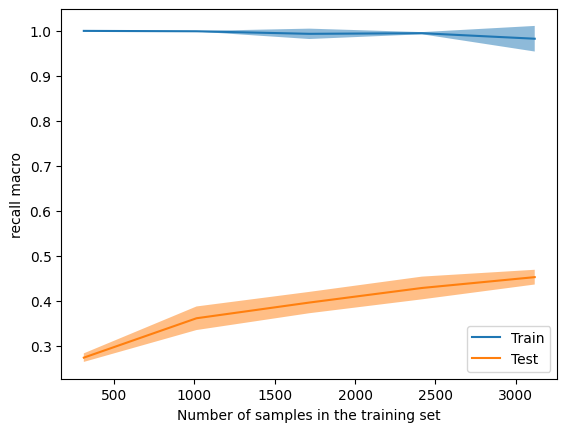

In [ ]:
learning_curve_mlp = LearningCurveDisplay.from_estimator(mlp_pipe_final, x_train, y_train, cv=skf, scoring='recall_macro', n_jobs=-1,
                                              random_state=73, score_name='recall macro', score_type='both', std_display_style='fill_between')